# **Declaração do Problema** | **Problem Statement**


---

#### **Contexto do Negócio**

O Youtube é uma plataforma excelente para compartilhar conteúdo e criar uma comunidade interessada no que você posta. Além disso, a plataforma oferece a oportunidade de monetização.

A monetização está positivamente associada com o número de visualizações dos videos. Enquanto curtidas e comentários aumentam a visibilidade e engajamento, respectivamente. Dessa forma, mais visualizações aumenta o dinheiro recebido do Youtube, enquanto ikes e comentários impulsionam ainda mais visualizações.


Uma nova criadora de conteúdo no Youtube tem um canal focado em conteúdo de musculação e saúde. Ela quer entender como ela pode fazer seu canal crescer e futuramente gerar uma receita vindas do youtube que complementem sua renda.


Sabendo que o Youtube é uma plataforma muito dinâmica, onde a publicação de vídeos de milhares de criadores de conteúdo acontece o tempo todo, buscar inspiração de conteúdo nos canais certo faz toda a diferença quando se quer crescimento do canal.

É improvavel que um canal pequeno ou iniciante consiga crescer sem publicar vídeos com os tópicos que mais estão recebendo atenção no momento. Dessa forma, é extremamente importante identificar criadores de conteúdo que estão bem estabelecidos na plataforma mas ainda sim em crescimento.

---

#### **Objetivos**
Com o intuito de otimizar o tempo de criação de vídeos com o intuíto de crescimento do canal iremos descobrir:
1. Se o crescimento do canal está associado com maior frequência de postagem.
2. Se o horário de postagem influência na performance dos vídeos
3. Se vídeos mais falados (com mais palavras ditas) performam melhor do que vídeos com pouca fala (geralmente shorts)
4. Se existem tópicos atuais que se destacam do geral


Como cientista de dados responsável por este projeto, minha função é analisar os dados fornecidos do Youtube e gerar insights factiveis para crescimento do canal do cliente no Youtube. Assim, o criador de conteúdo terá uma lista de sugestões com potencial para fazer com que ele obtenha crescimento do canal e aumento da monetização, constituindo assim uma renda complementar.

---

#### **Dicionário dos dados**
Os conjuntos de dados inclui informações de quantidade vídeos postados e deletados, visualizações diárias e totais, abrangendo também métricas de likes e comentários. Além de data. Os principais atributos são:  

1. **Informações do primeiro arquivo**  
   - **Day (Dia):** Dia da semana.
   - **Date (Data):** Data.
   - **Daily_Views (Visualizações diárias):** Número de visualizações diárias do canal.  
   - **Total_Views (Visualizações totais):** Número de visualizações totais do canal.
   - **Daily_Videos (Vídeos diários):** Número de vídeos diários publicados.  
   - **Total_Videos (Total de vídeos):** Número total de vídeos do canal.  
   - **Youtuber:** Identificação do criador de conteúdo.
   
  

2. **Informações dos arquivos contendo métricas técnicas**  
   - **id:** Identificador único de cada vídeo.  
   - **Title (Título):** Título do vídeo.  
   - **PublishedAt (Publicado em):** Data de publicação do vídeo.
   - **Views (Visualizações):** Quantidade de vezes que o vídeo foi visualizado.
   - **Likes (Curtidas):** Número de curtidas do vídeo.
   - **Dislikes (Não-curtidas):**Número de não-curtidas do vídeo.
   - **Comments (Comentários):** Quantidade de comentários do vídeo.
     


#### **Business Context**  
YouTube is an excellent platform for sharing content and building a community interested in what you post. In addition, the platform offers monetization opportunities.

Monetization is positively associated with the number of video views, while likes and comments increase visibility and engagement, respectively. In this way, more views increase the money earned from YouTube, while likes and comments further boost visibility.

A new content creator on YouTube has a channel focused on weight training and health. She wants to understand how she can grow her channel and eventually generate income from YouTube to supplement her earnings.

Knowing that YouTube is a very dynamic platform—where videos from thousands of creators are posted constantly—drawing inspiration from the right channels makes all the difference when aiming for channel growth.

It is unlikely that a small or beginner channel can grow without publishing videos on topics that are currently receiving the most attention. Therefore, it is extremely important to identify content creators who are well-established on the platform but still experiencing growth.

---

#### **Objective**
With the goal of optimizing video creation time for channel growth, we will investigate:

1.   Whether channel growth is associated with a higher posting frequency.
2.   Whether posting time influences video performance.
3.   Whether videos with more spoken content (more words spoken) perform better than videos with little speech (usually Shorts).
4.   Whether there are current topics that stand out from the rest.


As the data scientist responsible for this project, my role is to analyze the YouTube data provided and generate actionable insights for growing the client’s channel. This way, the content creator will have a list of suggestions with the potential to help them achieve channel growth and increased monetization, thereby creating an additional source of income.

---

#### **Data Dictionary**
The datasets include information on the number of videos posted and deleted, daily and total views, as well as metrics such as likes and comments — in addition to dates. The main attributes are:  

1. **First file information**  
   - **Day:** Day of the week.
   - **Date:** Date.
   - **Daily_Views:** Number of daily views of the channel.  
   - **Total_Views:** Number of total views of the channel.
   - **Daily_Videos:** Number of videos published daily.  
   - **Total_Videos:** Total number of videos published.  
   - **Youtuber:** Name of the content creator.
   
  
2. **Information of files containing technical metrics**  
   - **id:** Unique identity of each video.  
   - **Title:** Video title.  
   - **PublishedAt:** Video's publication date.
   - **Views:** Number of views received.
   - **Likes:** Number of likes received.
   - **Dislikes:** Number of dislikes received.
   - **Comments:** Number of comments.

## **Importando as bibliotecas necessárias** | **Importing necessary libraries**

In [1]:
# Bibliotecas para ler e manipular dados
# Libraries to read and manipulate data
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime
import time

# Bibliotecas para visualização de dados
# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para clusterização e análise dos clusters
# Libraries for clustering and their analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Biblioteca para manipulação de dado em formato de texto
# Library to manipulate text data
from sklearn.feature_extraction.text import TfidfVectorizer

# Biblioteca para padroniação de dados
# Library for data standardization
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive  # Connecting Google Colab with Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### 🔍 Primeiros passos | First steps


Estruturando dados e análise exploratória.
Structuring data and exploratory analysis.

### Lendo e Estruturando os dados | Reading and structuring data

In [3]:
# Carregando a primeira tabela CSV como uma dataframe da biblioteca pandas
# Loading the first csv table as a pandas dataframe
data = pd.read_excel('/content/drive/MyDrive/python_notebooks/tables_influencers_youtube/youtube_data.xlsx', sheet_name='Plan1')

# Criar colunas para videos diários adicionados e deletados e preenche-las com zero
# Create new columns for added and deleted videos and fill them with zero
data['Added_daily_videos'] = 0
data['Deleted_daily_videos'] = 0

# Criar função para converter valores de 'Daily_videos'
# Function to convert 'Daily_Videos' values

# Se daily_videos for zero or NA retorne zero, caso contrário retorne o valor em daily_videos
# If daily_videos is zero or NA return zero, else return the value in daily_videos
def split_video_changes(daily_videos):
    if pd.isna(daily_videos) or daily_videos == 0:
        return 0, 0
    elif isinstance(daily_videos, (int, float)):
        if daily_videos > 0:
            return daily_videos, 0
        else:
            return 0, abs(daily_videos)
    elif isinstance(daily_videos, str):
        # Clean the string (remove +, spaces, etc.)
        clean_val = daily_videos.replace('+', '').strip()
        try:
            numeric_val = float(clean_val)
            if numeric_val > 0:
                return numeric_val, 0
            else:
                return 0, abs(numeric_val)
        except ValueError:
            return 0, 0
    else:
        return 0, 0

# Aplicando a função para criar coluna de videos adicionado e deletado utilizando com base nos valores de Daily_Videos
# Applying the function to create columns of added and deleted videos baed on Daily_Videos values
data[['Added_daily_videos', 'Deleted_daily_videos']] = data['Daily_Videos'].apply(
    lambda x: pd.Series(split_video_changes(x))
)

# Convertendo os valores das novas colunas para valores inteiros
# Converting values of the new columns to integers
data['Added_daily_videos'] = data['Added_daily_videos'].astype(int)
data['Deleted_daily_videos'] = data['Deleted_daily_videos'].astype(int)

In [4]:
# Carregando todas as tabelas CSV
# Loading all csv table
csv_files = glob.glob('/content/drive/MyDrive/python_notebooks/tables_influencers_youtube/youtube_*.csv')

# Dicionário para renomear os nomes dos youtubers encontrado no nome dos arquivos csv
# Dictionary to rename youtuber names found in the csv files
name_mapping = {
    'angela_borges': 'Angela Borges',
    'paulo_muzz': 'Paulo Muzy',
    'paulo_muzy': 'Paulo Muzy',  # in case of typo
    'rodrigo_goes': 'Rodrigo Góes',
    'vivi_winkler': 'Vivi Winkler',
    'tay_training': 'Tay Training',
    'leandro_twin': 'Leandro Twin'
}

# Lista vazia para armazenar todos os dataframes
# List to store all dataframes
dfs = []

for file in csv_files:
    # Extrair o nome do youtuber do nome do arquivo
    # Extract youtuber name from filename
    filename = os.path.basename(file)
    # Remover o prefixo 'youtube_' e o sufixo '.csv'
    # Remove 'youtube_' prefix and '.csv' suffix
    name_key = filename.replace('youtube_', '').replace('.csv', '')

    # Obtendo os nomes dos youtubers através do dicionário criado
    # Getting youtuber name from the dictionary created
    youtuber_name = name_mapping.get(name_key, name_key.replace('_', ' ').title())

    # Lendo os arquivos csv
    # Reading CSV files
    df = pd.read_csv(file)

    # Se houver NAs na coluna 'Dislikes' preencha com zero
    # If there are NaN values in 'Dislikes' column fill with 0
    df['Dislikes'] = df['Dislikes'].fillna(0)

    # Adicionando a coluna de Youtuber
    # Adding Youtuber column
    df['Youtuber'] = youtuber_name

    # Juntar as dataframes em lista
    # Appending dataframes to list
    dfs.append(df)

# Juntando as dataframes e determinando o tipo de dados das colunas
# Merging all dataframes and determining column's data type
#data2 = pd.concat(dfs, ignore_index=True)

data2 = pd.concat(dfs, ignore_index=True).astype({
    'Views': 'int64',
    'Likes': 'int64',
    'Dislikes': 'int64',
    'Comments': 'int64',
    'Id': 'str',
    'Title': 'str',
    'Youtuber': 'str'
})


In [5]:
# Criar coluna de data e hora a partir da coluna PublishedAt and depois exclui-la
# Create column of date and hour based on PublishedAt  and then delete it
data2['Date'] = pd.to_datetime(data2['PublishedAt']).dt.date
data2['Hour'] = pd.to_datetime(data2['PublishedAt']).dt.time
data2 = data2.drop('PublishedAt', axis=1)

In [6]:
# Checando por valores nulos em cada coluna de ambas dataframes
# Checking for missing values in each column of both dataframes
print(data.isna().sum())
print(data2.isna().sum())

Day                     0
Date                    0
Daily_Views             0
Total_Views             0
Daily_Videos            0
Total_Videos            0
Youtuber                0
Added_daily_videos      0
Deleted_daily_videos    0
dtype: int64
Id          0
Title       0
Views       0
Likes       0
Dislikes    0
Comments    0
Youtuber    0
Date        0
Hour        0
dtype: int64


In [7]:
# Checando a estrutura de ambas dataframes
# Checking the structure of both dataframes
print(data.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Day                   179 non-null    object
 1   Date                  179 non-null    object
 2   Daily_Views           179 non-null    object
 3   Total_Views           179 non-null    object
 4   Daily_Videos          179 non-null    int64 
 5   Total_Videos          179 non-null    int64 
 6   Youtuber              179 non-null    object
 7   Added_daily_videos    179 non-null    int64 
 8   Deleted_daily_videos  179 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        372 non-null    object
 1   Title     372 non-null    object
 2   Views     372 non-null    int

In [8]:
# Checando por linhas duplicadas em cada coluna
# Checking for duplicated rows in each column
print (data.duplicated().sum())
print (data2.duplicated().sum())

0
0


In [9]:
# Visualizando as 5 primeiras linhas da dataframe
# Visualizing the first 5 rows of the dataframe
data.head()

,Day,Date,Daily_Views,Total_Views,Daily_Videos,Total_Videos,Youtuber,Added_daily_videos,Deleted_daily_videos
0,Wed,2025-10-22,"+8,461",18589967,0,1044,Angela Borges,0,0
1,Thu,2025-10-23,"+8,609",18598576,0,1044,Angela Borges,0,0
2,Fri,2025-10-24,"+6,348",18604924,1,1045,Angela Borges,1,0
3,Sat,2025-10-25,"+10,461",18615385,0,1045,Angela Borges,0,0
4,Sun,2025-10-26,"+5,057",18620442,0,1045,Angela Borges,0,0


In [10]:
# Visualizando as 5 primeiras linhas da dataframe
# Visualizing the first 5 rows of the dataframe
data2.head()

,Id,Title,Views,Likes,Dislikes,Comments,Youtuber,Date,Hour
0,JuBpL7Fdgls,Suco de laranja atrapalha a hipertrofia #shorts,14291,1197,0,24,Leandro Twin,2025-10-22,13:00:00
1,tr8TQBtoy-4,Como Emagrecer Sem Sofrimento,9294,1075,0,34,Leandro Twin,2025-10-22,13:30:00
2,Ly2TWj9wYCA,Quanto tempo depois de comer vou treinar? #shorts,15139,1145,0,26,Leandro Twin,2025-10-23,13:00:00
3,BNqVP_fIJCw,Recomposição corporal: 11 dúvidas de vocês,4528,533,0,10,Leandro Twin,2025-10-24,16:35:00
4,PNH5r4_4jCo,Treino de glúteos para intermediários,3676,462,0,19,Leandro Twin,2025-10-24,19:00:00


In [11]:
# Obtendo o período dos dados
# Obtainig the period of the data

start = time.perf_counter()
print(data['Date'].min(), data['Date'].max())

2025-10-22 2025-11-20


📝 **Observações:**

*   data contém dados gerais de: visualizações diárias, visualizações totais (todo o período até determinada data), quantidade de videos, videos adicionados e deletados, e quando foram publicados

*   Em data2, cada linha é referente a um vídeo específico. Há informações de quantidade de comentários, likes, dislikes, visualizações, além de data e hora de publicação

*   Em ambas dataframes existe uma coluna identificando o  youtuber

*   Não há valores nulos ou repetidos

*   372 vídeos diferentes serão analisados. Eles abrangem um período de 22 de Outubro de 2025 até 20 de Novembro de 2025


📝 **Observations:**

*   data has general data of: daily views, total views (all the period to a determined date), number of videos, added videos, deleted videos and when they were published

*   Each row refers to a specific video in data2. There are information concerning number of comments, likes, dislikes, views, besides date and hour of publication  

*   In both dataframes there is a column with the youtuber identification

*   There are no null and repeated values

*   372 unique videos will be analised. They cover the period between October 22th 2025 until November 20th 2025


### 🔍 **Criação de novas variáveis e dados:** | **Feature engineering:**


**Criação de novas variáveis e dados:**

*   A coluna Daily_Views contém sinal de + na frente dos números, ele será removido

*   Será criada a métrica de engajamento 'Engagement_score' que considera o número de comentários, likes e visualizações do vídeo

*   Será criada uma coluna informando o número de dias que o vídeo esteve disponível considerando o período temporal analisado

*   Será criada coluna contendo a média de visualizações diárias do canal (independente do video)

*   Views_Ratio será criada para informar a performance relativa de um vídeo em relação aos outros

*   Pct_Of_Channel_Growth diz o quanto do crescimento do canal veio de determinado vídeo

*   Pct_Of_Individual_Growth normaliza os valores considerando o tamanho do canal (neste caso, o número de videos durante o período) e diz o quanto cada vídeo foi importante para o crescimento de seu respectivo criador

*   Performance_Score é a métrica mais importantes, ela considera todas as métricas criadas, além de visualizações e likes, havendo um peso distinto para cada uma, com o intuito de rankear os videos por performance considerando todos os youtubers mas também considerando somente os videos de cada youtuber


**Feature engineering:**

*   Daily_Views column has + signal in front of the numbers, it will be removed

*   There will be created an engagement metric called 'Engagement_score' which considers the number of comments, likes and views of the videos


*   There will be created a column containing information regarding the number of days the video was available considering the whole temporal period analised


*  There will be created a column containing the average daily views of the channel (regardless of the video)   


*   Views_Ratio is created to inform the relative performance of a video in relation to others


*   Pct_Of_Channel_Growth provides how much of the channel's growth came from a certain video


*   Pct_Of_Individual_Growth normalizes values considering the channel size (in this case, the number of videos during the period)
and provides each video's importance for their respective creator's channel growth


*   Performance_Score is the most important metric, it considers all the other created metrics, besides views and likes, there being a distinct weight to each one, with the goal of ranking videos by performance considering all youtubers but also videos from each youtuber


In [12]:
# Remoção do sinal de + dos valores de visualizações diárias
# Removal of the plu sign from the daily view's values
data['Daily_Views'] = data['Daily_Views'].str.replace('+', '')

In [13]:
# Criação da métrica de engajamento em porcentagem
# Engagement metric creation in percentage
data2['Engagement_score']= data2['Comments'] + data2['Likes'] / data2['Views'] * 100

In [14]:
# Convertendo Date para formato de data
# Converting Date to datetime format
data2['Date'] = pd.to_datetime(data2['Date'])

# Guardando a data final
# Storing the last date
end_date = pd.to_datetime('2025-11-20')

# Cálculo de dias disponíveis de cada vídeo
# Calculation of days available for each video
data2['Days_Available'] = (end_date - data2['Date']).dt.days + 1

# Cálculo de visualizações médias por dia
# Calculation of daily median visualization
data2['Avg_Views_Per_Day'] = data2['Views'] / data2['Days_Available']

In [15]:
# Criação de métrica do quanto de visualização veio de cada vídeo considerando todos vídeos de todos os youtubers
# Metric creation of how much of visualizations came from each video considering all videos from all youtubers
data2['Views_Ratio'] = (data2['Views'] / data2['Views'].sum()) * 100

In [16]:
# Métrica do quanto o crescimento total do canal veio de cada vídeo - Performance geral
# Metric of how much of the channel's total growth was driven by each specific video - General performance
total_period_views = data['Total_Views'].iloc[-1] - data['Total_Views'].iloc[0]
data2['Pct_Of_Channel_Growth'] = (data2['Views'] / total_period_views) * 100

In [17]:
# Cálculo da quantidade de visualizações que cada youtuber adquiriu durante o período
# Calculation of how many total views each youTuber gained during the period.
youtuber_growth = data.groupby('Youtuber').agg(
    individual_growth=('Total_Views', lambda x: x.iloc[-1] - x.iloc[0])
).reset_index()

# Adicionando dados de crescimento individual à data2
# Adding information of individual growth to data2
data2 = data2.merge(youtuber_growth, on='Youtuber', how='left')

# Métrica do quanto cada vídeo foi importante para o crescimento de seu respectivo criador
# Metric of the importance of each video for its respective creator
data2['Pct_Of_Individual_Growth'] = (data2['Views'] / data2['individual_growth']) * 100

In [18]:
# Métrica de pontuação final considerando diversas métricas
# Final score metric considering several other metrics
data2['Performance_Score'] = (
    data2['Avg_Views_Per_Day'] * 0.35 +      # Most important - sustained performance | A mais importante - sustentabilidade da performance
    data2['Pct_Of_Individual_Growth'] * 0.25 + # Impact on creator's channel | Impacto no canal do criador
    data2['Engagement_score'] * 0.20 +       # Audience interaction quality | Qualidade da interação da audiência
    data2['Views_Ratio'] * 0.15 +            # Relative performance among peers | Performance relativa entre os competidores
    data2['Likes']/data2['Views'] * 0.05     # Basic sentiment | Sentimento básico
)

In [19]:
# Substituição de qualquer valor nulo ou infinito por zero
# Replacing of any null or infinite value by zero

data2['Engagement_score'] = data2['Engagement_score'].replace([np.inf, -np.inf], np.nan).fillna(0)

data2['Performance_Score'] = data2['Performance_Score'].replace([np.inf, -np.inf], 0)


## **Análise de dados exploratória** | **Exploratory Data Analysis**


### 🔍 Análise de dados univariada | Univariate data analysis. Análise de dados univariada



⚠️**Análise da distribuição das variáveis numéricas:** Aqui vamos checar se há outliers (dados extremos) e o comportamento geral de cada variável numérica.

⚠️**Distribution analysis of numerical features:** Here we will check for outliers (extreme values) and the general behaviour of each numerical feature.

In [20]:
# Descriçao básica das variáveis
# Basic feature description
data2.describe()

,Views,Likes,Dislikes,Comments,Date,Engagement_score,Days_Available,Avg_Views_Per_Day,Views_Ratio,Pct_Of_Channel_Growth,individual_growth,Pct_Of_Individual_Growth,Performance_Score
count,372.000000,372.000000,372.0,372.000000,372,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,34179.978495,1869.594086,0.0,56.518817,2025-11-05 14:38:42.580644864,62.868776,15.389785,3703.767795,0.268817,0.005699,8.086843e+06,0.596759,1309.085171
min,0.000000,16.000000,0.0,0.000000,2025-10-21 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.836140e+05,0.000000,0.000000
25%,8205.250000,443.500000,0.0,14.000000,2025-10-29 00:00:00,19.757020,7.000000,469.580952,0.064532,0.001368,4.573925e+06,0.104636,171.006572
50%,13823.500000,784.000000,0.0,27.000000,2025-11-06 00:00:00,34.030817,15.000000,1165.079167,0.108718,0.002305,1.064836e+07,0.208175,419.655904
75%,26914.000000,1528.500000,0.0,48.000000,2025-11-14 00:00:00,53.353693,23.000000,3134.041667,0.211672,0.004488,1.064836e+07,0.567273,1104.491724
max,665656.000000,29967.000000,0.0,920.000000,2025-11-20 00:00:00,931.094599,31.000000,133131.200000,5.235222,0.110995,1.210838e+07,10.378027,46739.202416
std,74467.864556,3563.967280,0.0,105.724976,NaN,106.182273,8.992432,10109.170306,0.585672,0.012417,3.951901e+06,1.081793,3549.629487


In [21]:
# Contagem do número de vídeos de cada youtuber
# Count of number of videos of each youtuber
data2.groupby(['Youtuber'])[['Id']].count().T

Youtuber,Angela Borges,Leandro Twin,Paulo Muzy,Rodrigo Góes,Tay Training,Vivi Winkler
Id,24,60,35,13,32,208


In [29]:
# Média das variáveis para cada youtuber
# Feature's average for each youtuber
data2.groupby(['Youtuber'])[['Engagement_score','Days_Available','Avg_Views_Per_Day','Performance_Score','Pct_Of_Individual_Growth',	'Pct_Of_Channel_Growth']].mean().T

Youtuber,Angela Borges,Leandro Twin,Paulo Muzy,Rodrigo Góes,Tay Training,Vivi Winkler
Engagement_score,14.197256,7.002965e+01,3.612162e+01,4.102237e+02,1.323810e+02,3.851594e+01
individual_growth,183614.000000,4.573925e+06,1.250106e+06,6.414090e+06,1.210838e+07,1.064836e+07
Days_Available,10.208333,1.623333e+01,1.542857e+01,1.346154e+01,1.468750e+01,1.596635e+01
Avg_Views_Per_Day,414.725986,2.013771e+03,1.451290e+03,2.606718e+04,7.862798e+03,2.912230e+03
Performance_Score,148.396136,7.189646e+02,5.154788e+02,9.206711e+03,2.778725e+03,1.027077e+03
Pct_Of_Individual_Growth,1.583825,4.415016e-01,1.128579e+00,3.525396e+00,6.765002e-01,2.428559e-01
Pct_Of_Channel_Growth,0.000485,3.367249e-03,2.352516e-03,3.770482e-02,1.365866e-02,4.312064e-03


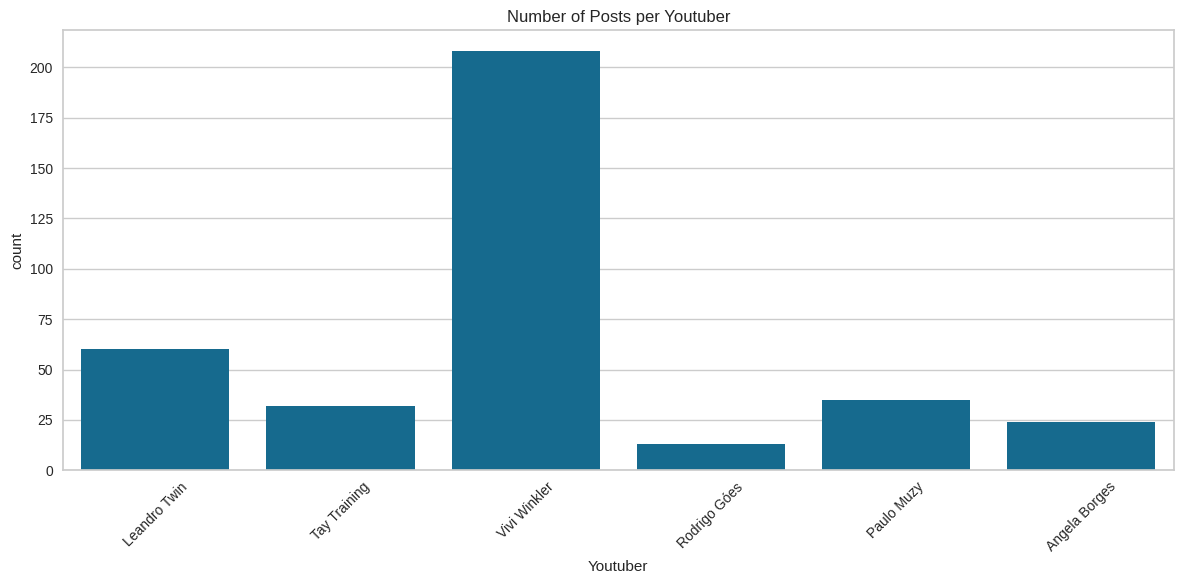

In [23]:
# Gráfico de barras da quantidade de vídeos de cada youtuber
# Barplot of youtuber's number of videos
plt.figure(figsize=(12, 6))
sns.countplot(data=data2, x='Youtuber')
plt.title('Number of Videos per Youtuber')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observações:** Temos seis youtubers diferentes. Ao todo são 372 videos, sendo que a youtuber com maior frequência de video é Vivi Winkler com 208 videos, seguido de Leandro Twin e Paulo Muzy. Já Rodrigo Goes tem o menor número de videos.

Rodrigo Góes, apesar de ter o menor número de videos (apenas 13) e também ter a segunda menor média de tempo disponível de seus videos, foi o youtuber que teve a maior taxa para todas as métricas criadas.

Vivi Winkler, apesar da quantidade de videos, teve uma das menores taxas de engajamento, mesmo tendo a segunda maior taxa média de visualizações diárias. Isso indica que grande parte dessas visualizações são de videos mais antigos e isso se reflete na menor taxa de Pct_Of_Individual_Growth que a youtuber obteve.

**Observations:** We have six unique youtubers. There are a total of 372 videos. The youtuber with highest video frequecy is Vivi Winkler with 208 videos, followed by Leandro Twin and Paulo Muzy. On the other hand, Rorigo Góes has the fewest videos.

Rodrigo Góes, despite having the fewest number of videos (only 13) and also having the second lowest average rate of videos availability in days, he was the youtuber with highest rate for all created metrics.

Vivi Winkler, despite the number of videos, had one of the lowest engagement rates, even though she had the second highest average daily views rate. This indicates that most of her views are for older videos, and this is reflected in the lowest Pct_Of_Individual_Growth rate.




**Distribuição das variáveis:**

**Feature values Distribution:**

In [24]:
# Selecionando apenas variáveis numéricas e considerando apenas o quartil 25 e 75
# Selecting only numerical features and considering only quantile 25th and 75th percentile
Q1= data2.select_dtypes(include=np.number).quantile(0.25)
Q3= data2.select_dtypes(include=np.number).quantile(0.75)

In [25]:
# Calculando a porcentagem de outliers para cada variável
# Calculating outlier percentage for each feature
IQR = Q3 - Q1

lower_whisker = (
 Q1 - 1.5* IQR
)

upper_whisker = (
 Q3 + 1.5* IQR
)

(
data2.select_dtypes(include=np.number)< lower_whisker | (data2.select_dtypes(include=np.number) > upper_whisker)).sum()/data2.select_dtypes(include=np.number).shape[0]*100

,0
Views,1.344086
Likes,0.000000
Dislikes,0.000000
Comments,2.956989
Engagement_score,1.344086
Days_Available,0.000000
Avg_Views_Per_Day,1.344086
Views_Ratio,95.430108
Pct_Of_Channel_Growth,100.000000
individual_growth,0.000000


In [26]:
# Guardando apenas colunas numéricas em novo objeto
# Storing numerical columns into a new variable
data_num= data2.select_dtypes(include=np.number)

Views
Skew : 5.63


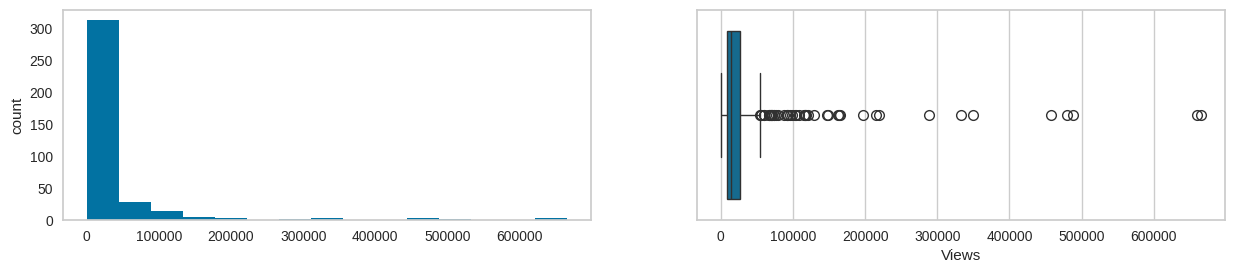

Likes
Skew : 4.62


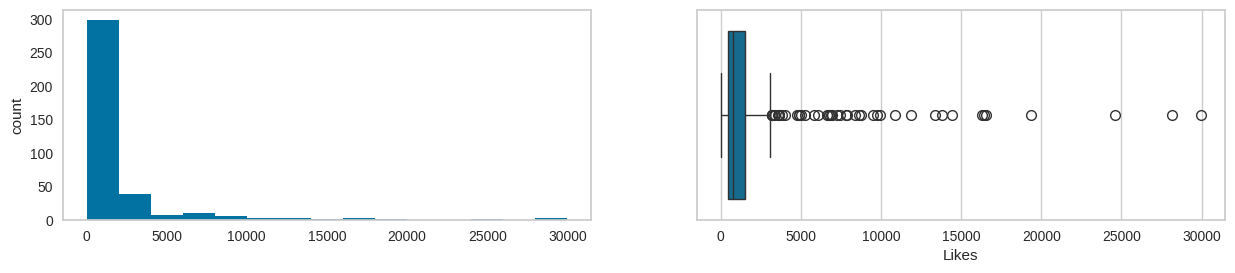

Dislikes
Skew : 0.0


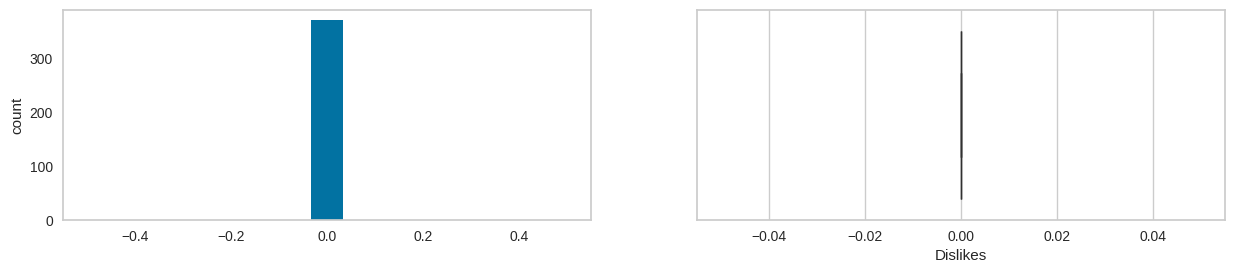

Comments
Skew : 4.81


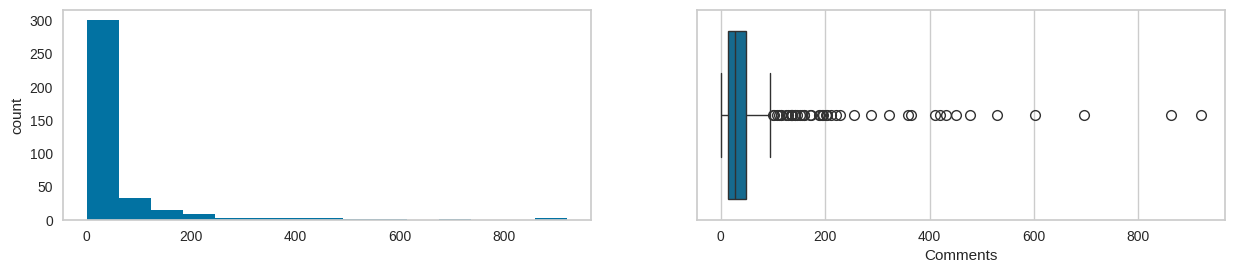

Engagement_score
Skew : 4.77


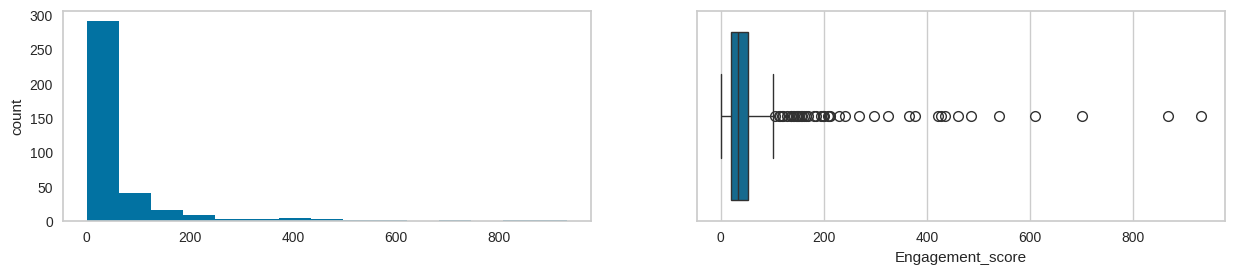

Days_Available
Skew : 0.0


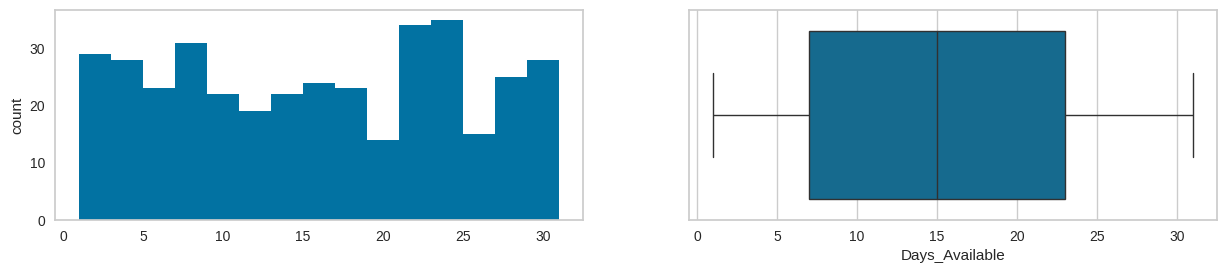

Avg_Views_Per_Day
Skew : 8.41


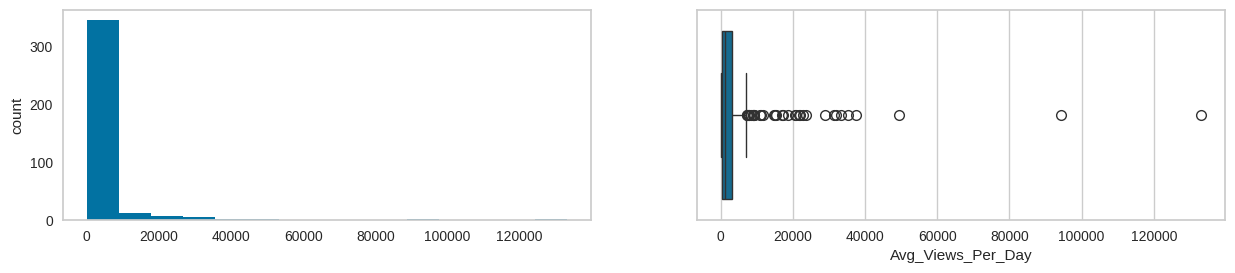

Views_Ratio
Skew : 5.63


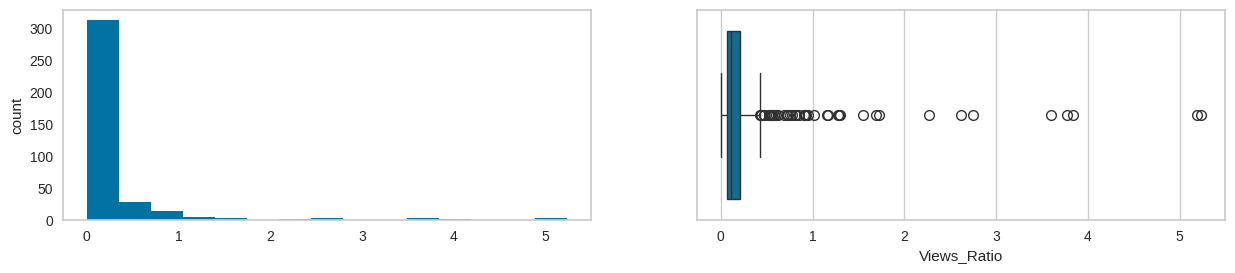

Pct_Of_Channel_Growth
Skew : 5.63


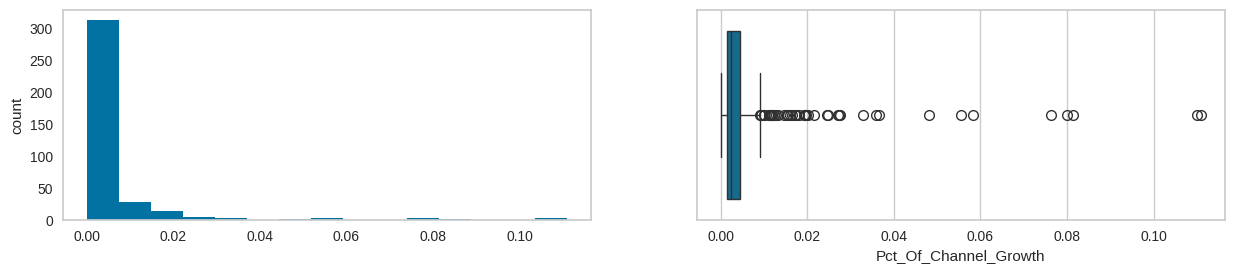

individual_growth
Skew : -0.88


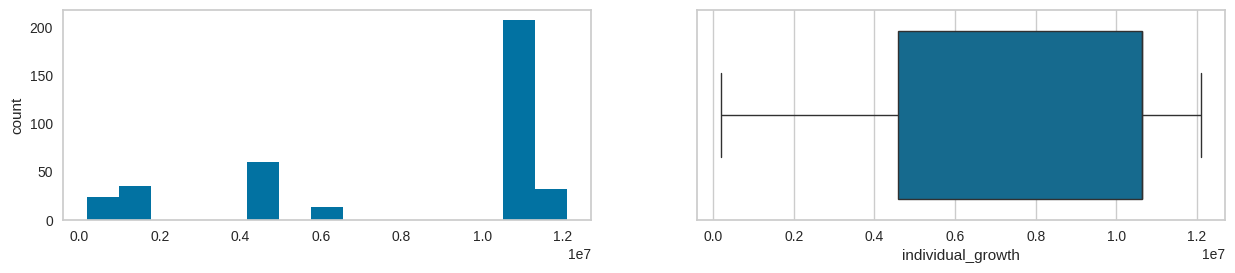

Pct_Of_Individual_Growth
Skew : 4.5


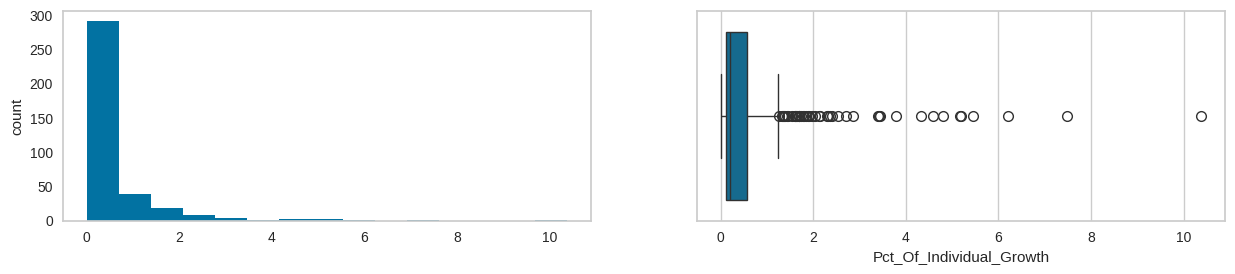

Performance_Score
Skew : 8.39


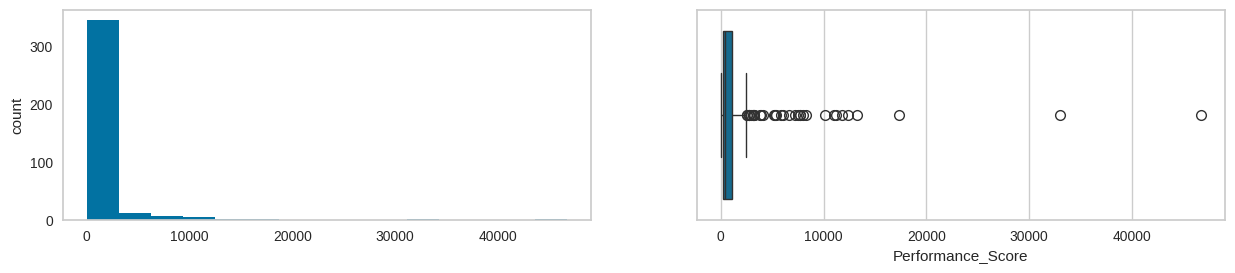

In [27]:
# Histograma and boxplot de cada variável numérica contendo seus respectivos valores de assimetria
# Histogram and boxplot for each numerical feature having their respective skewness values
for col in data_num.columns:
    print(col)
    print('Skew :',round(data_num[col].skew(),2))
    plt.figure(figsize=(15,6))
    plt.subplot(2,2,1)
    data_num[col].hist(bins=15, grid=False)
    plt.ylabel('count')
    plt.subplot(2,2,2)
    sns.boxplot(x=data_num[col])
    plt.show()

**Observações:** Aqui podemos perceber que exceto para crescimento individual e dias disponíveis, todas as outras variáveis apresentam diversos valores extremos (outliers), sendo que grande parte dos valores estao concentrados na porção mais inferior da distribuição.

**Observations:** Here we can notice that except for individual growth and days available, all other features have several extreme values (outliers), the majority of values are concentrated in the inferior portion of the distribution.

**Observações:** Agora veremos a distribuição de cada variável por youtuber.

**Observations:** Now we will see each feature distribution by youtuber,


YOUTUBER: Leandro Twin
Column: Views
Skew : 1.69


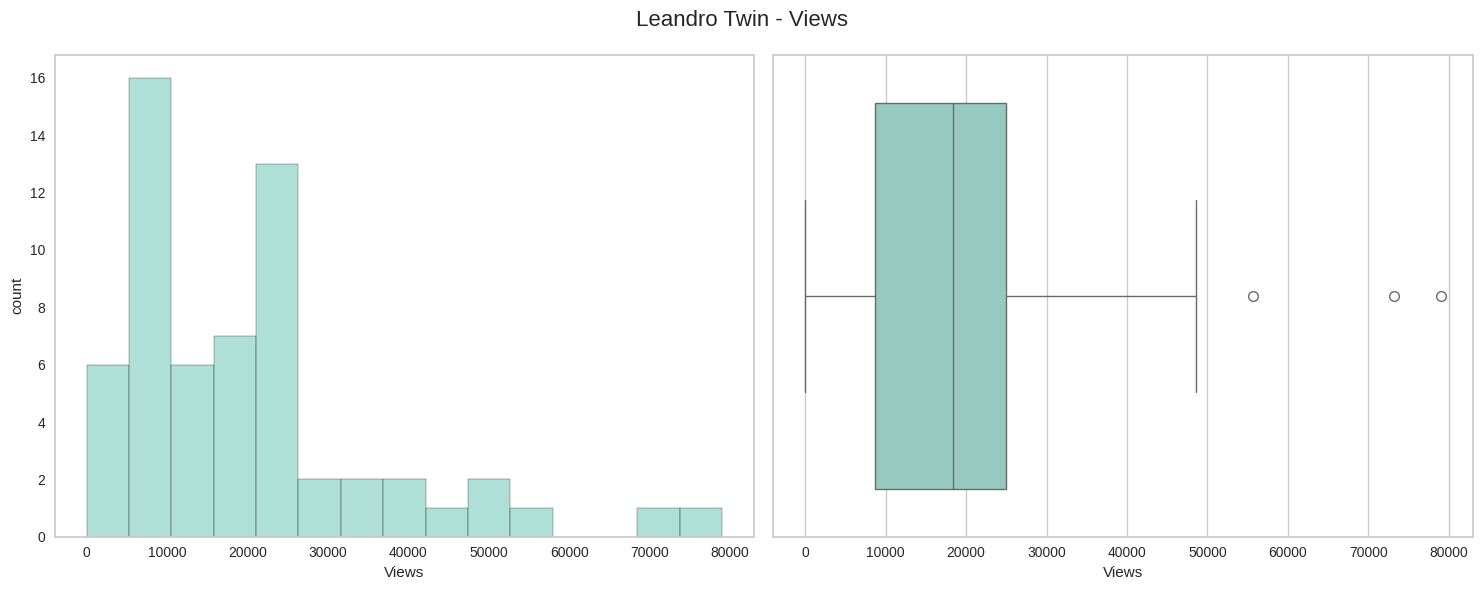

Column: Likes
Skew : 1.66


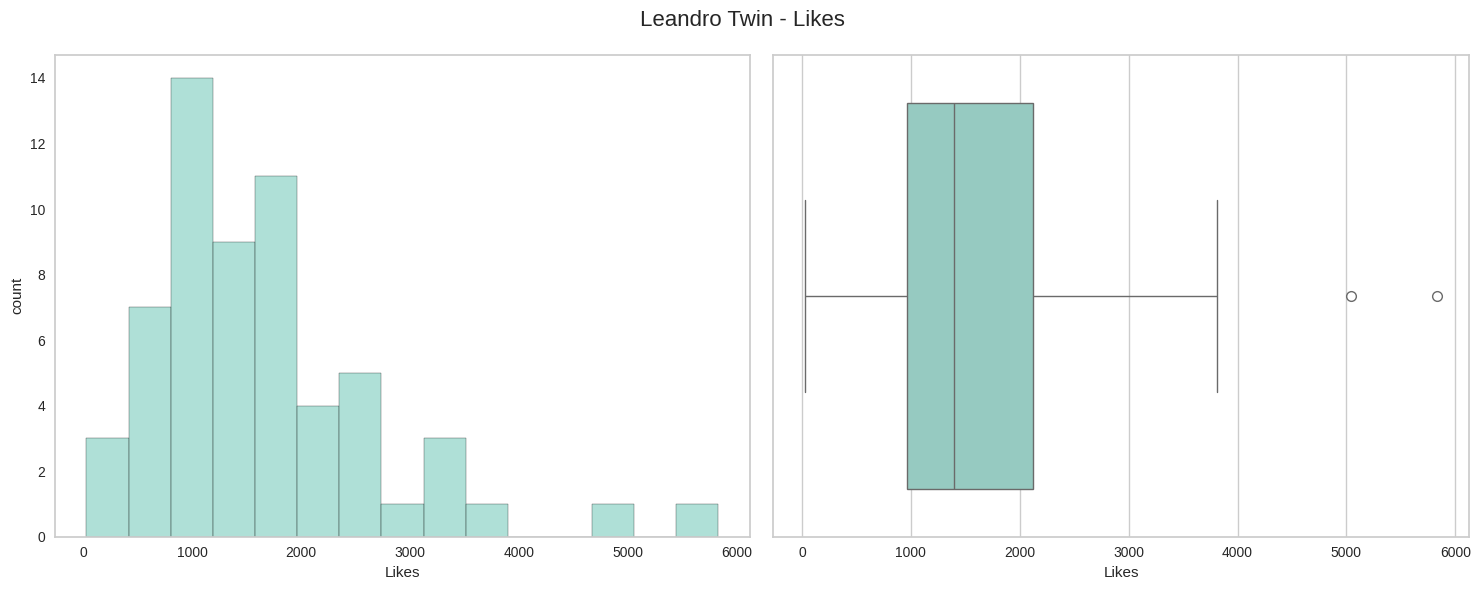

Column: Dislikes
Skew : 0.0


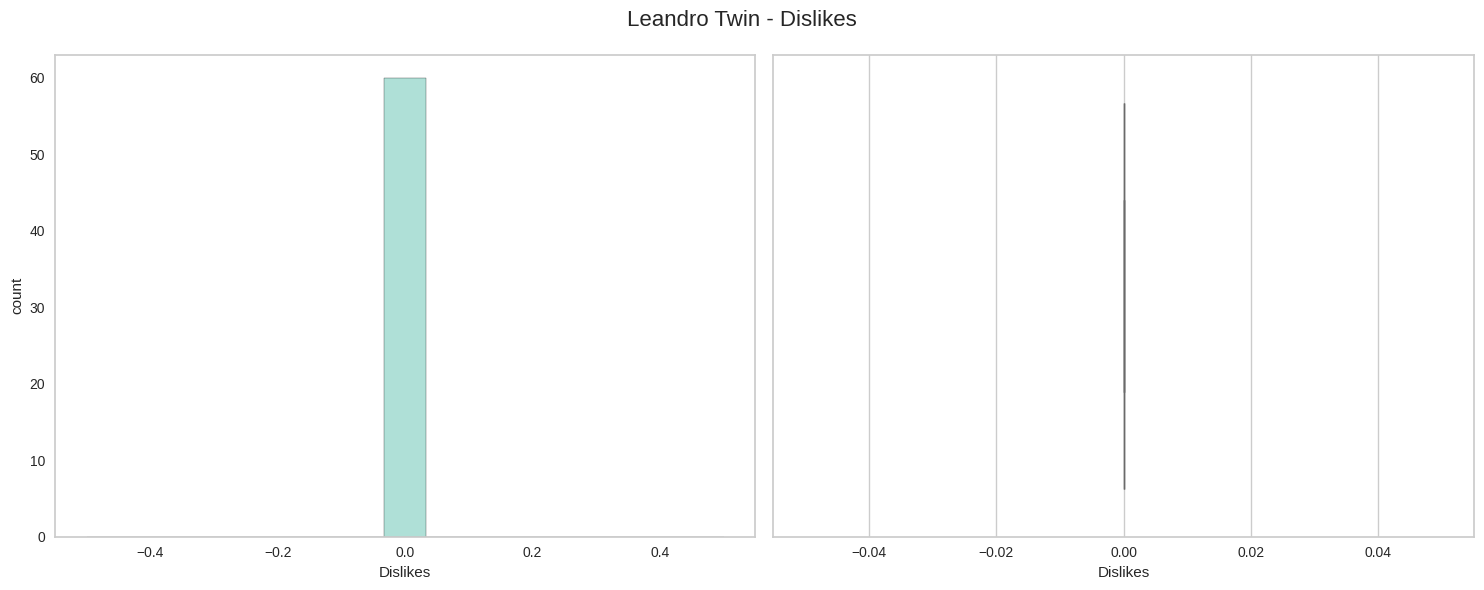

Column: Comments
Skew : 4.22


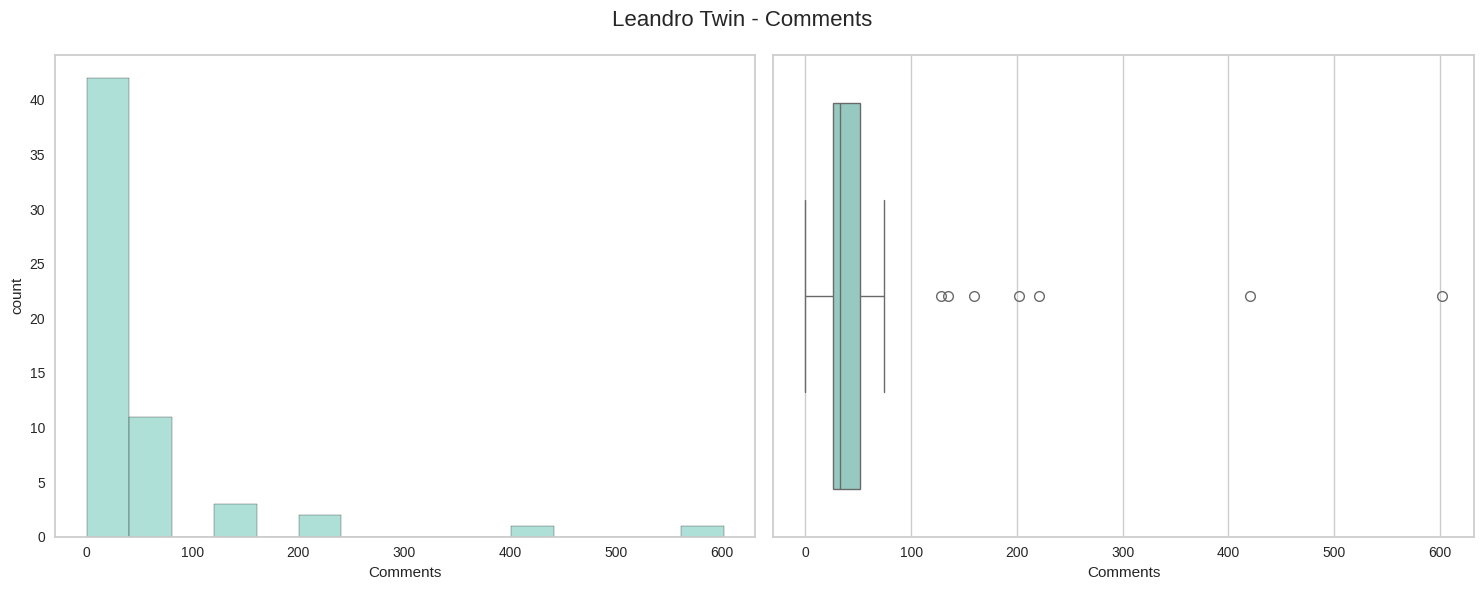

Column: Engagement_score
Skew : 4.21


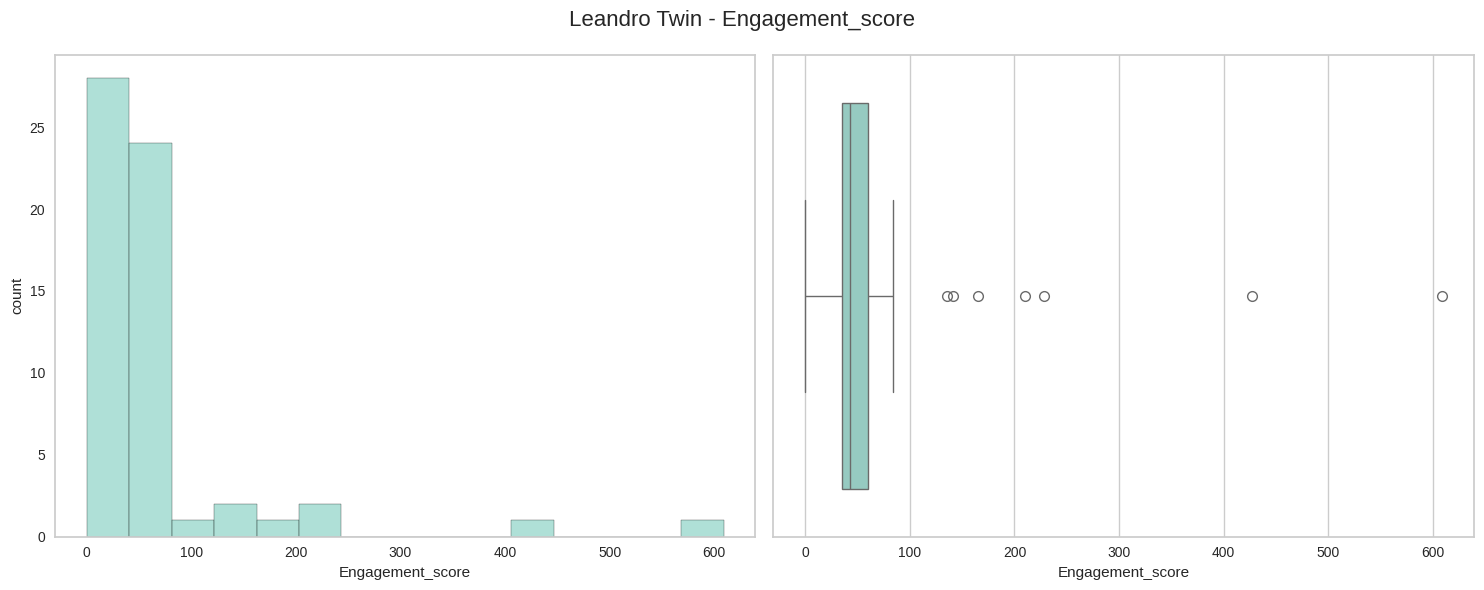

Column: Days_Available
Skew : -0.1


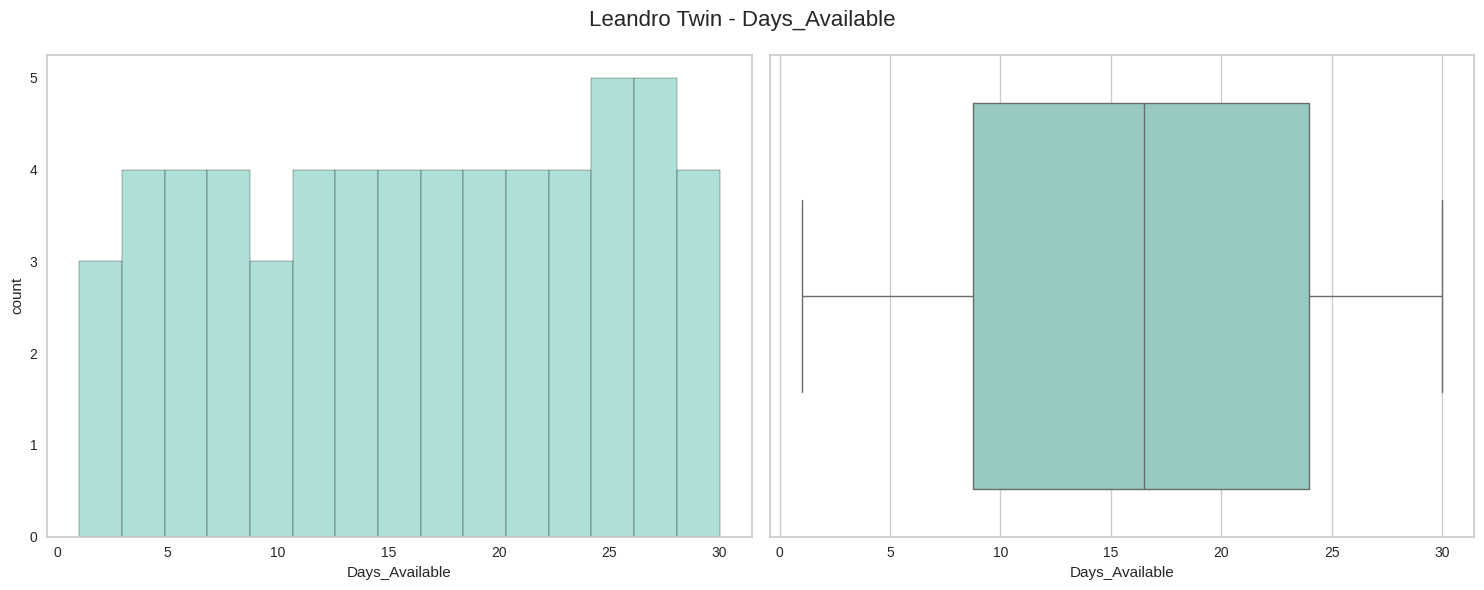

Column: Avg_Views_Per_Day
Skew : 1.98


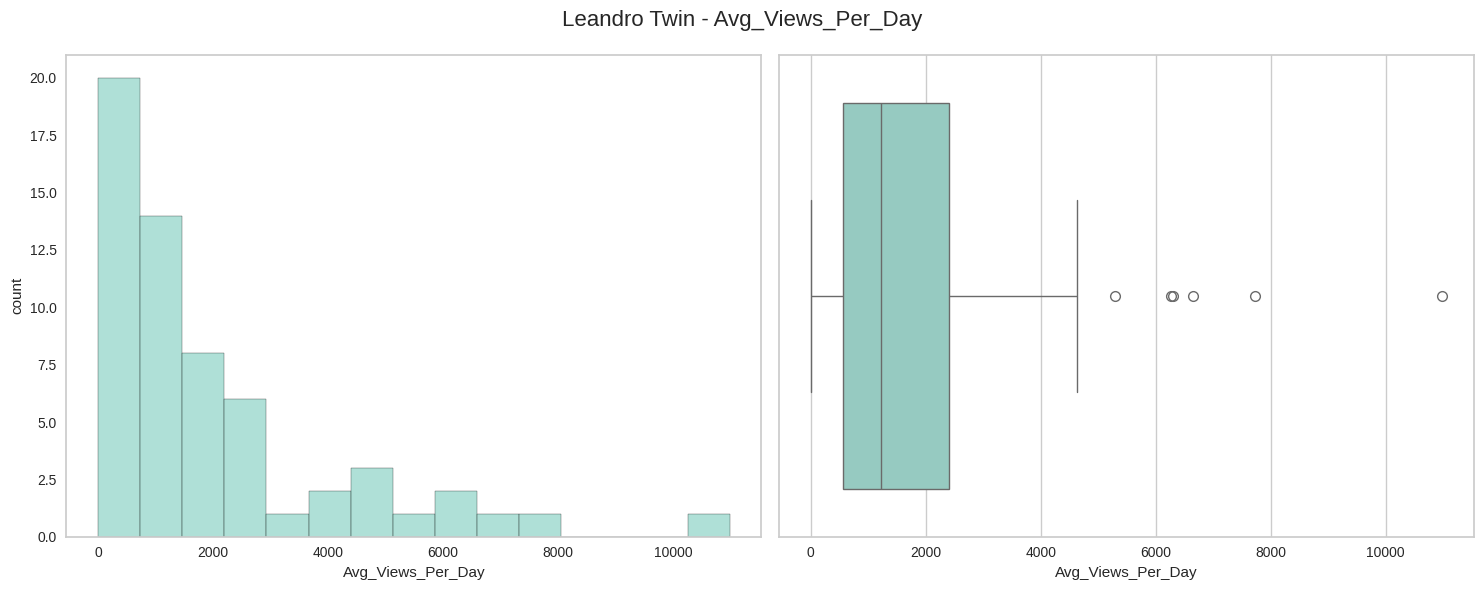

Column: Views_Ratio
Skew : 1.69


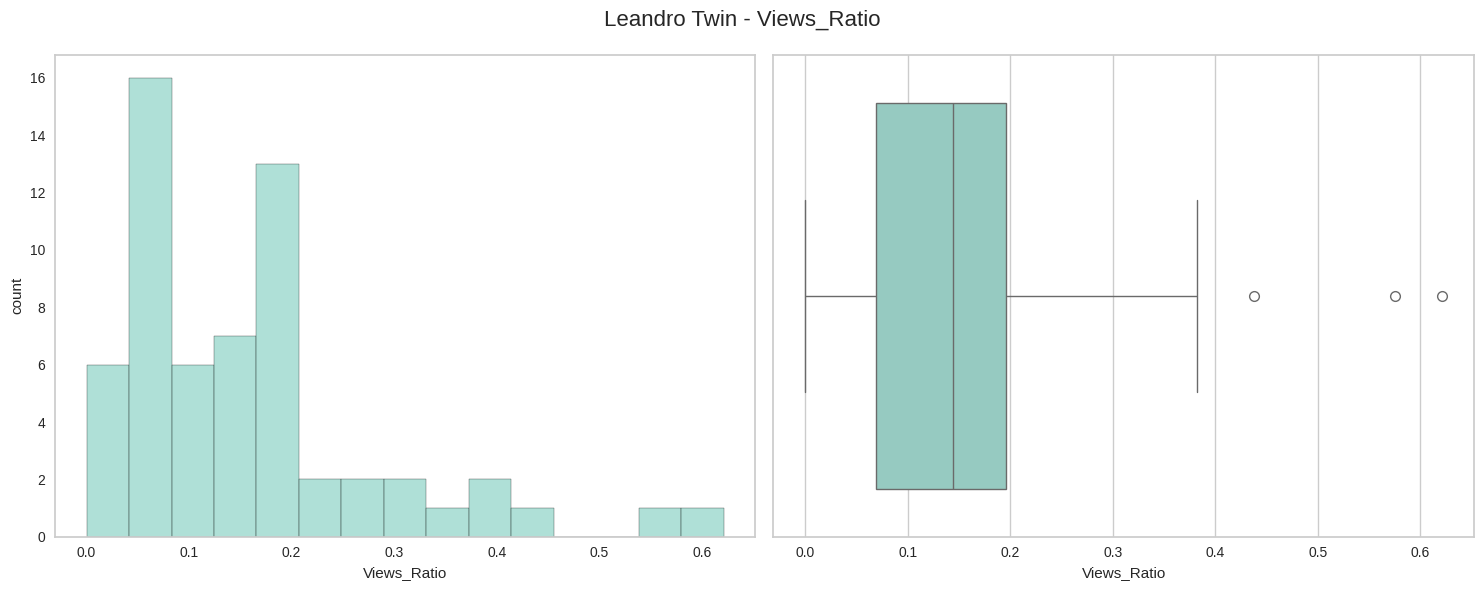

Column: Pct_Of_Channel_Growth
Skew : 1.69


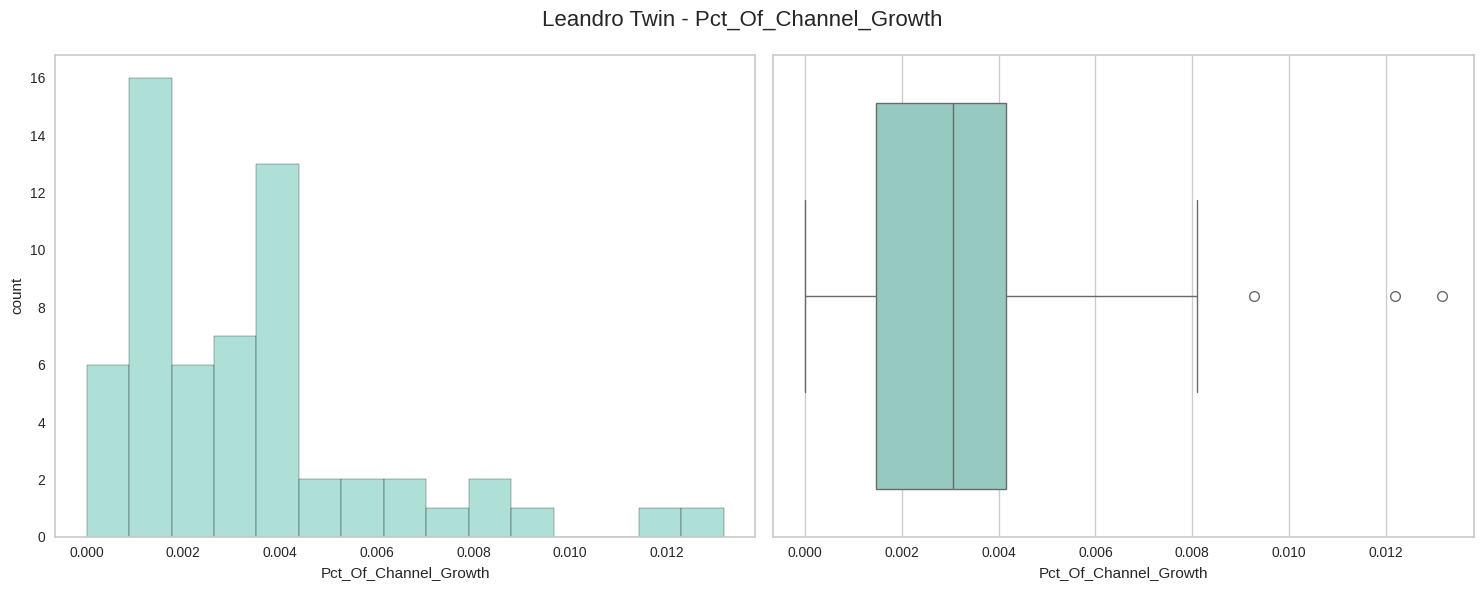

Column: individual_growth
Skew : 0.0


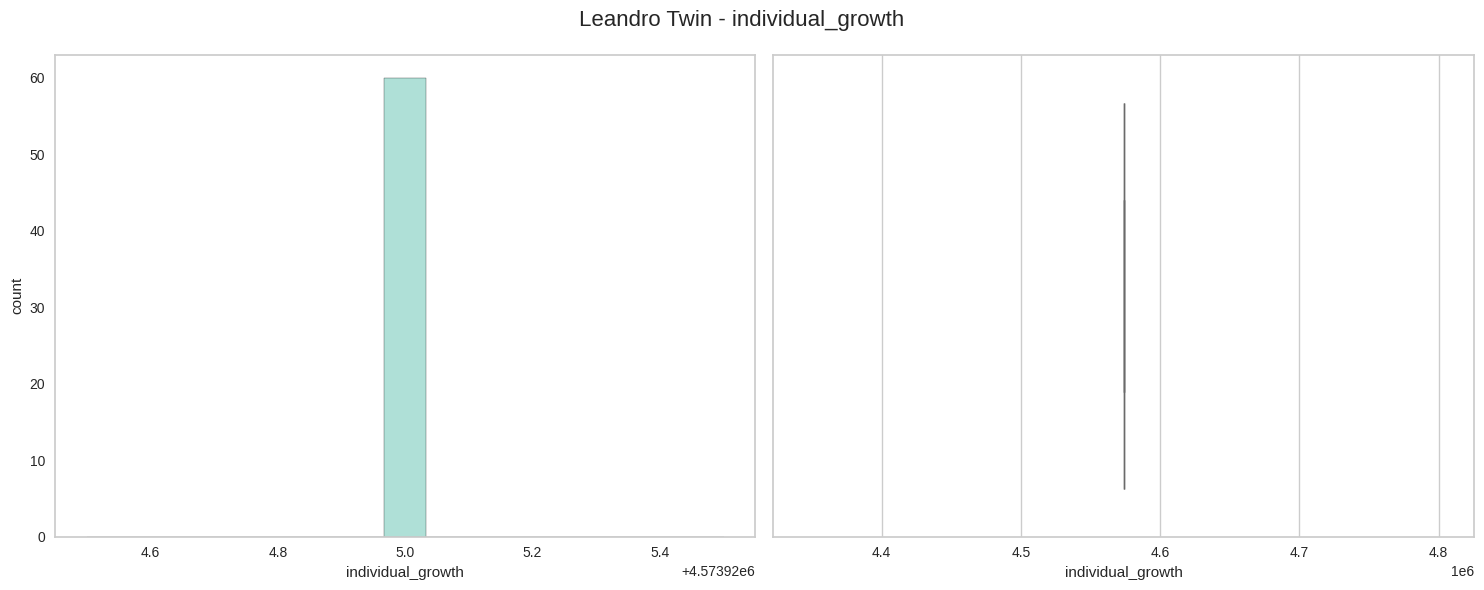

Column: Pct_Of_Individual_Growth
Skew : 1.69


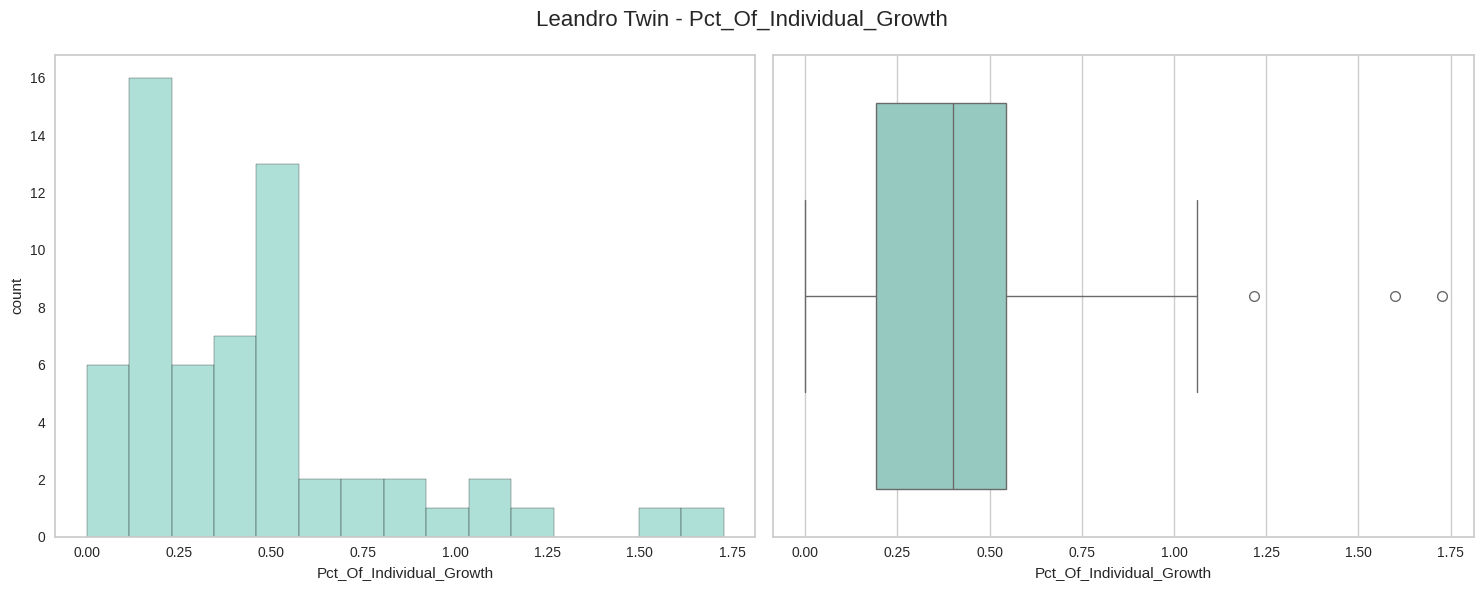

Column: Performance_Score
Skew : 1.96


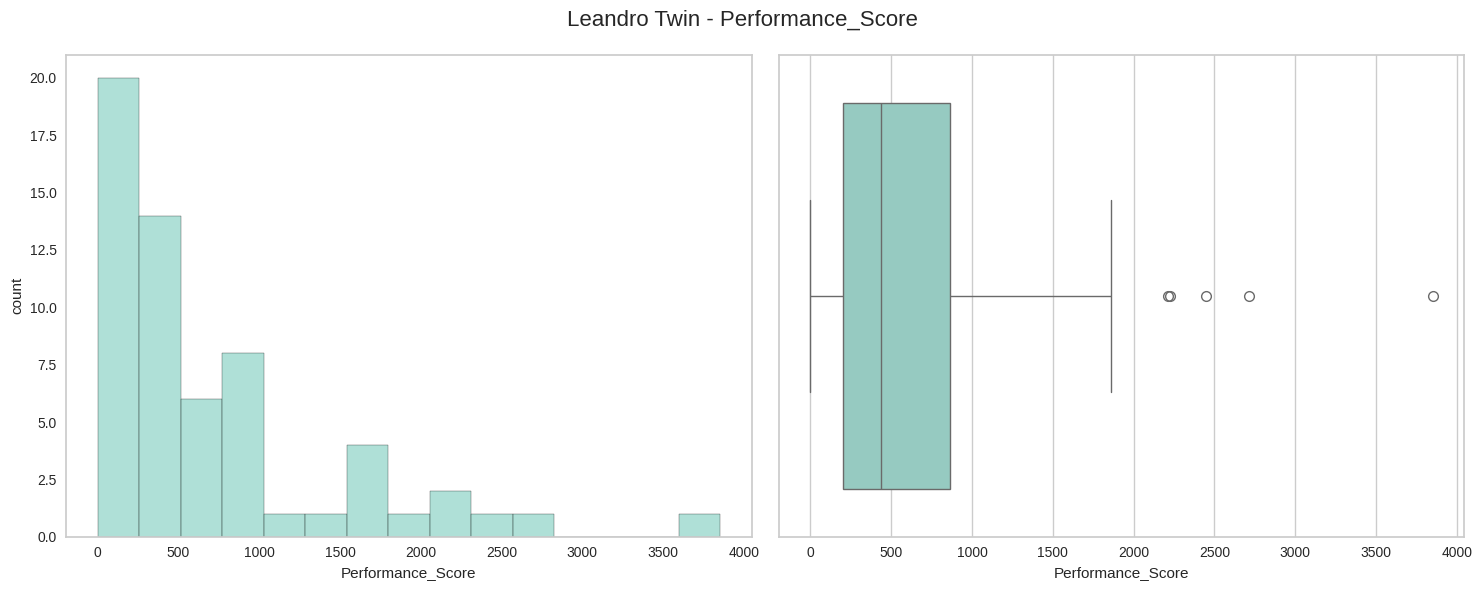


YOUTUBER: Tay Training
Column: Views
Skew : 2.61


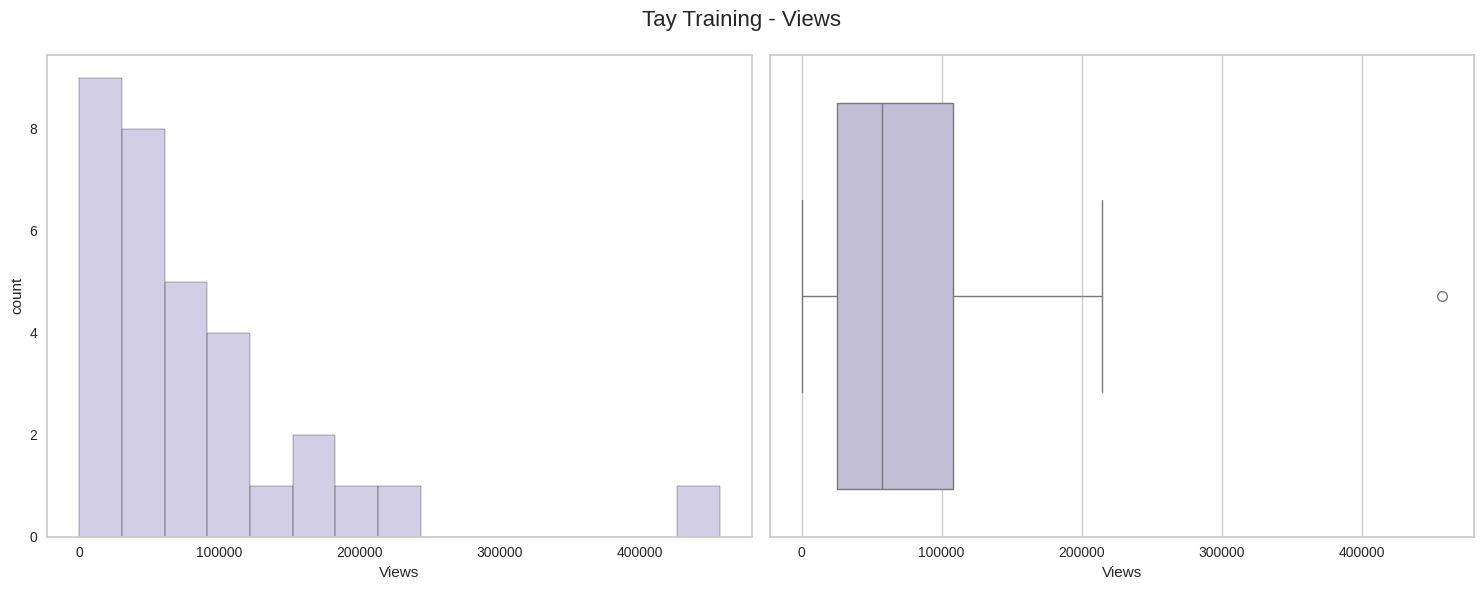

Column: Likes
Skew : 1.21


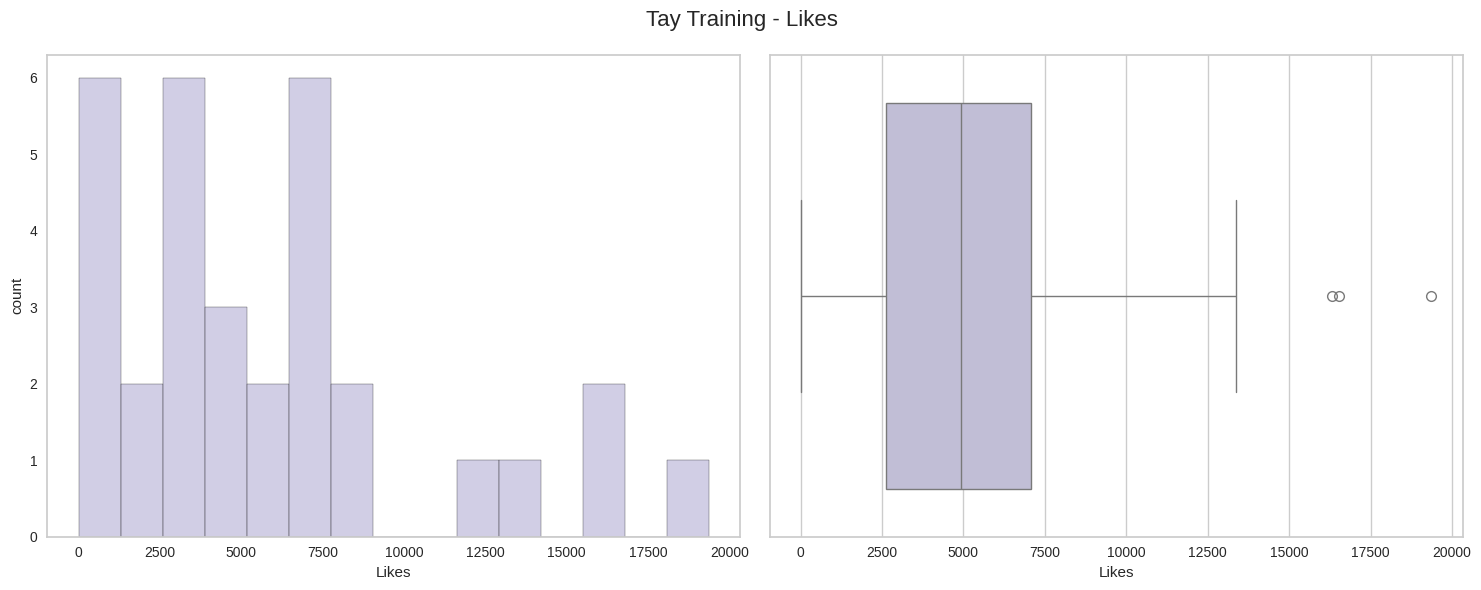

Column: Dislikes
Skew : 0.0


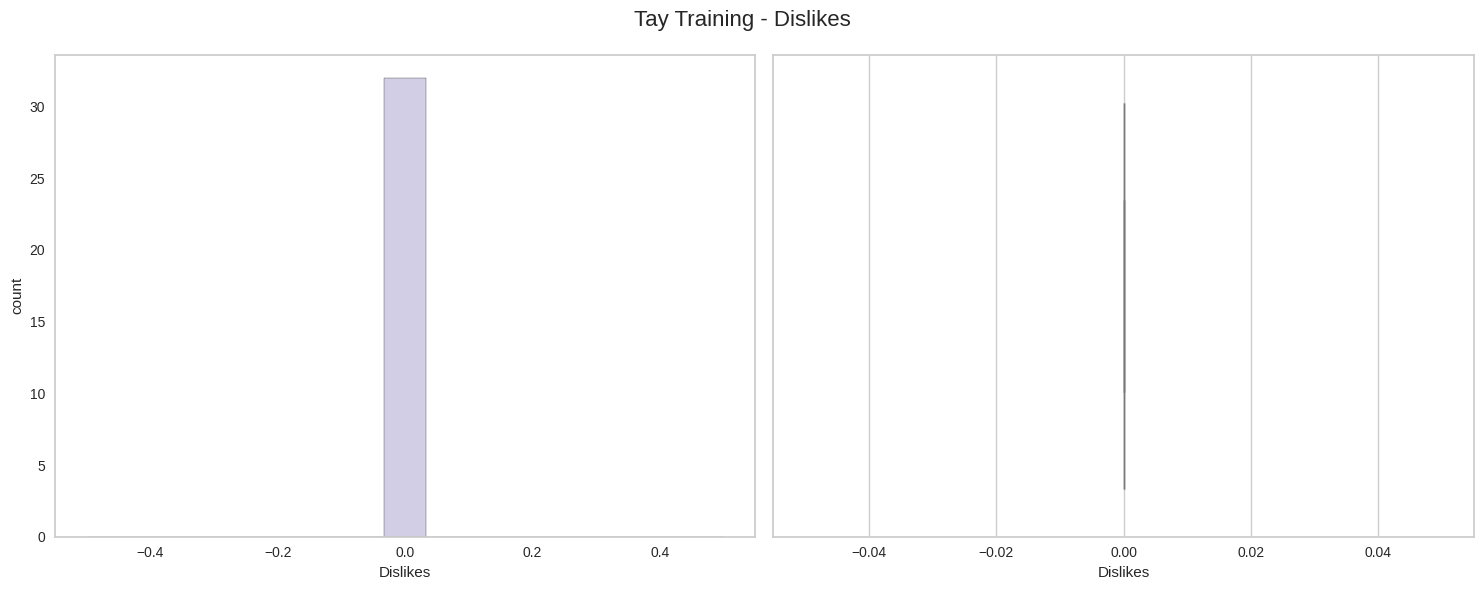

Column: Comments
Skew : 1.84


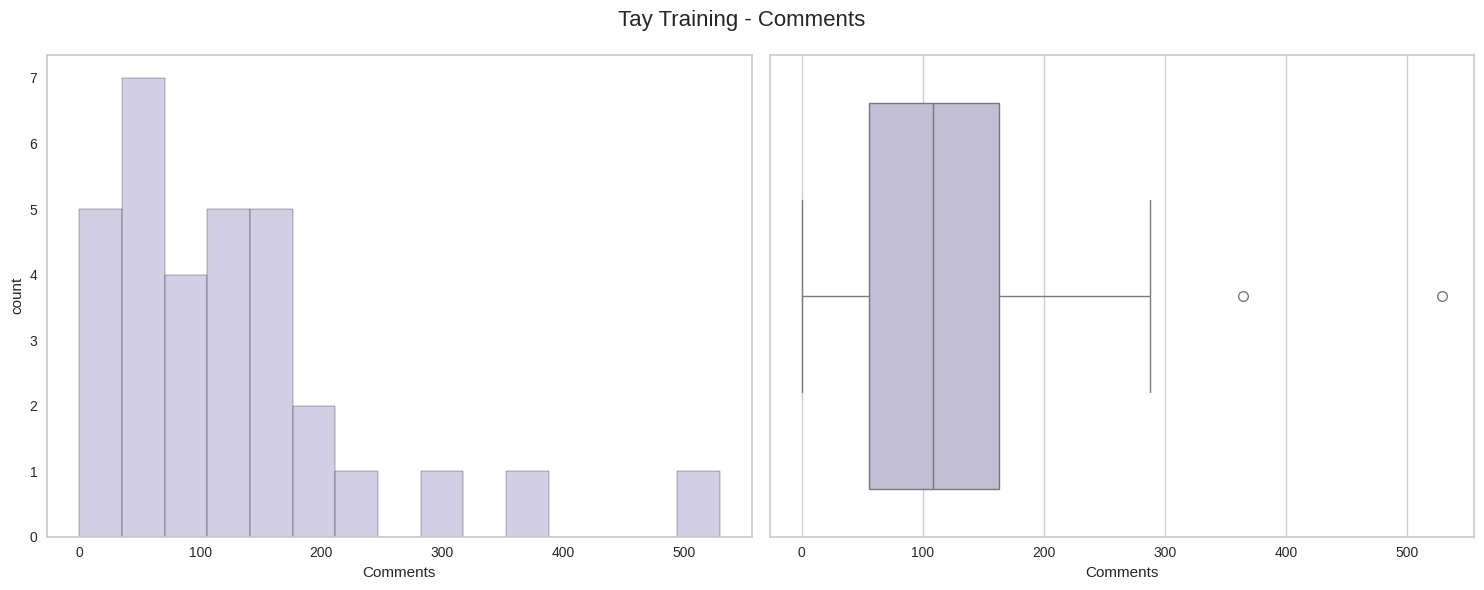

Column: Engagement_score
Skew : 1.77


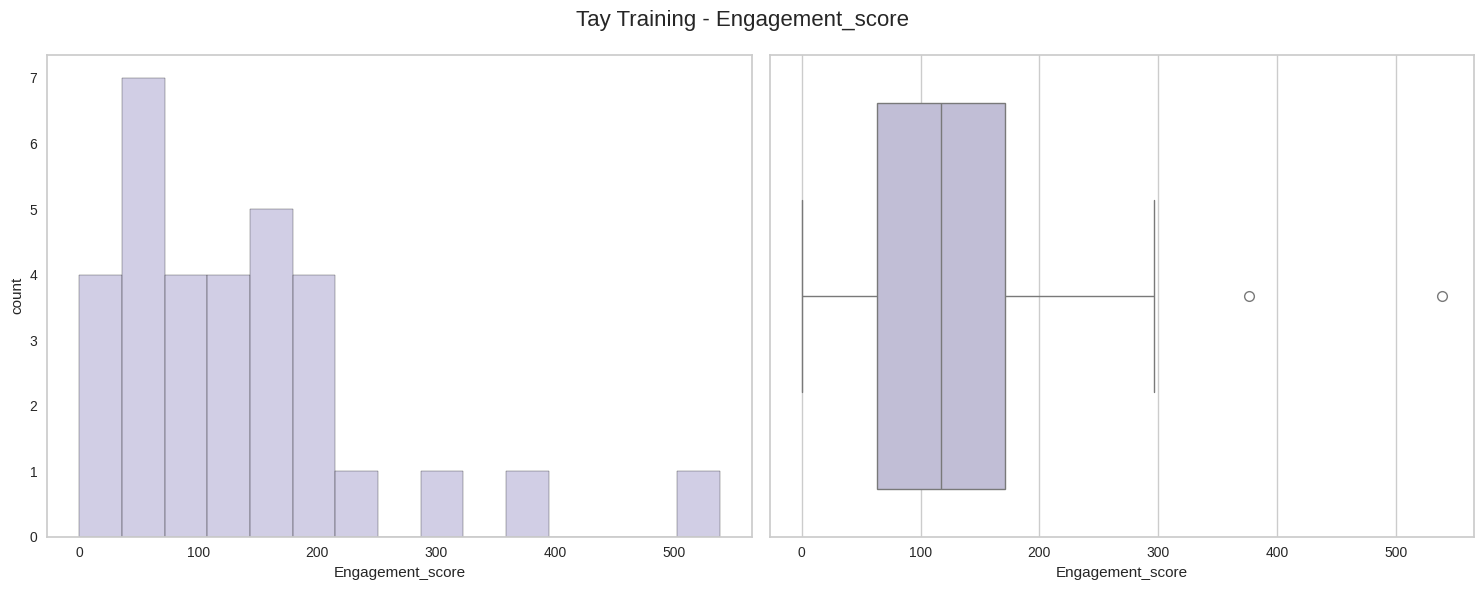

Column: Days_Available
Skew : 0.17


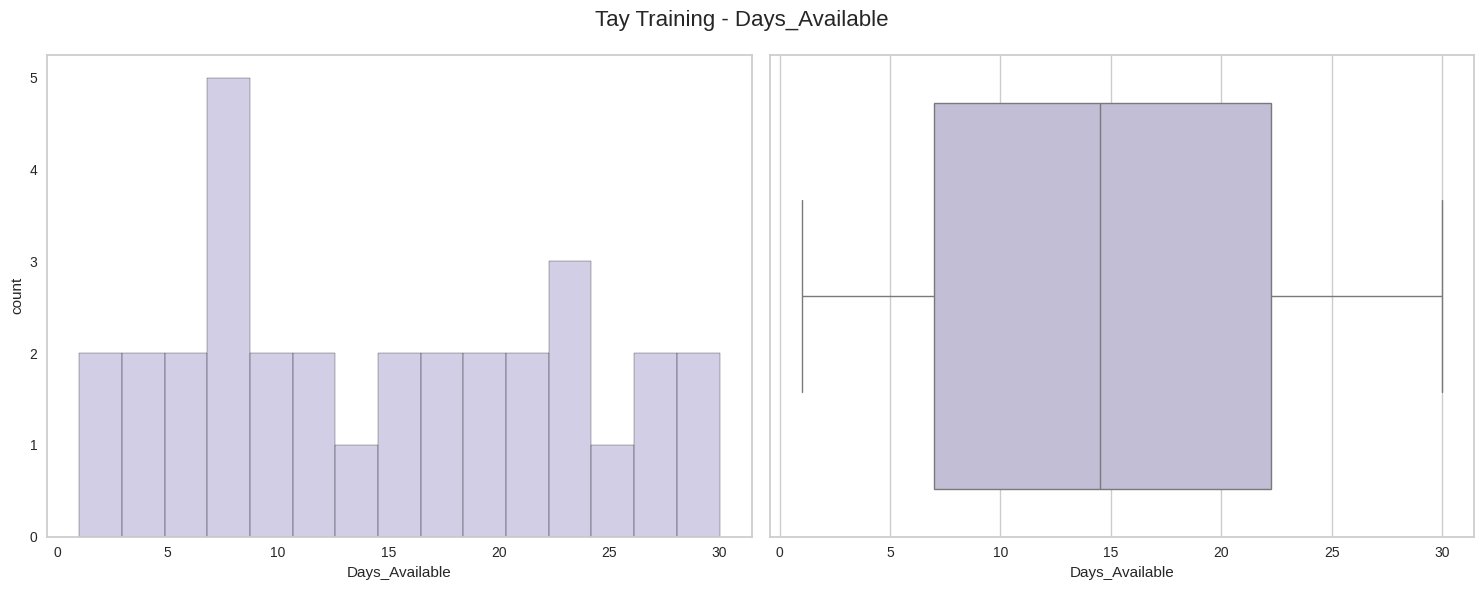

Column: Avg_Views_Per_Day
Skew : 2.54


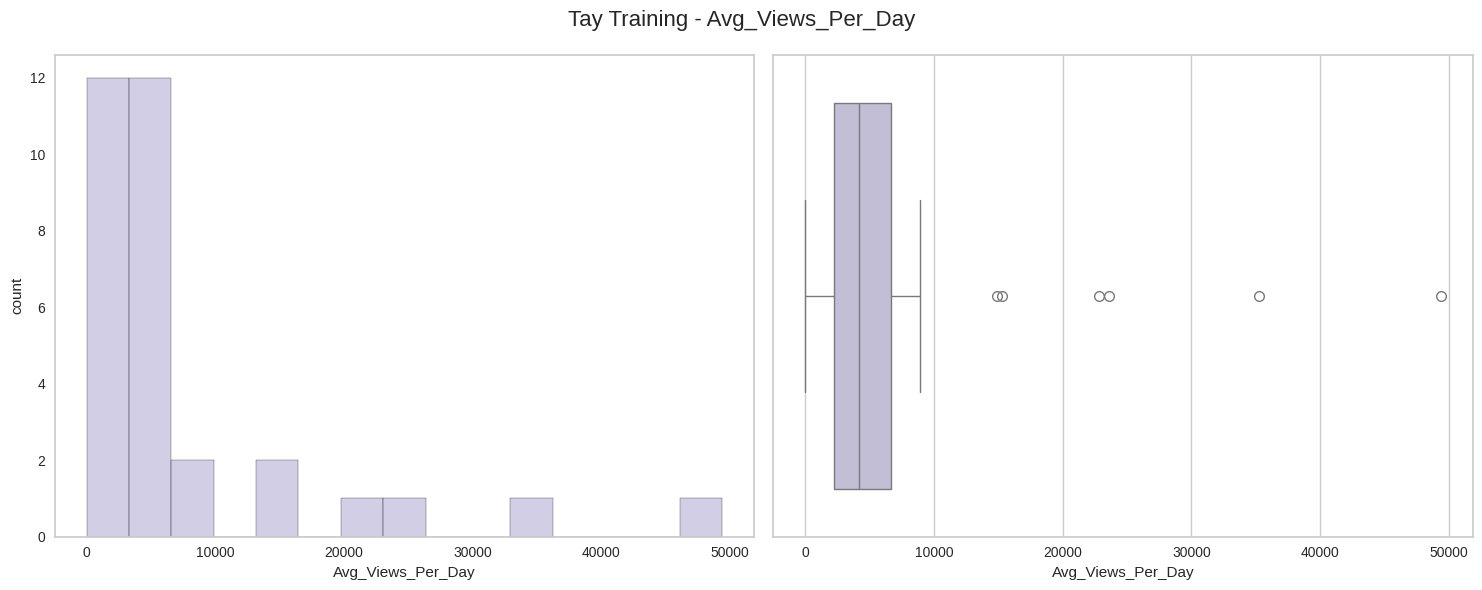

Column: Views_Ratio
Skew : 2.61


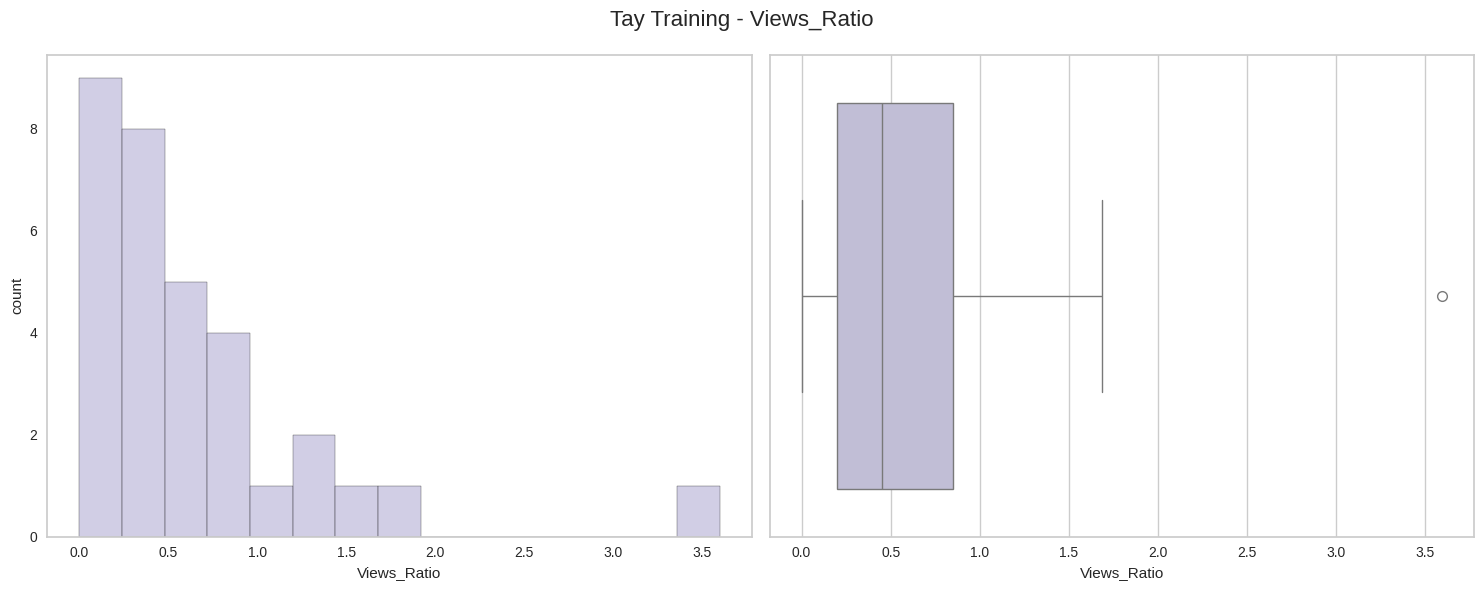

Column: Pct_Of_Channel_Growth
Skew : 2.61


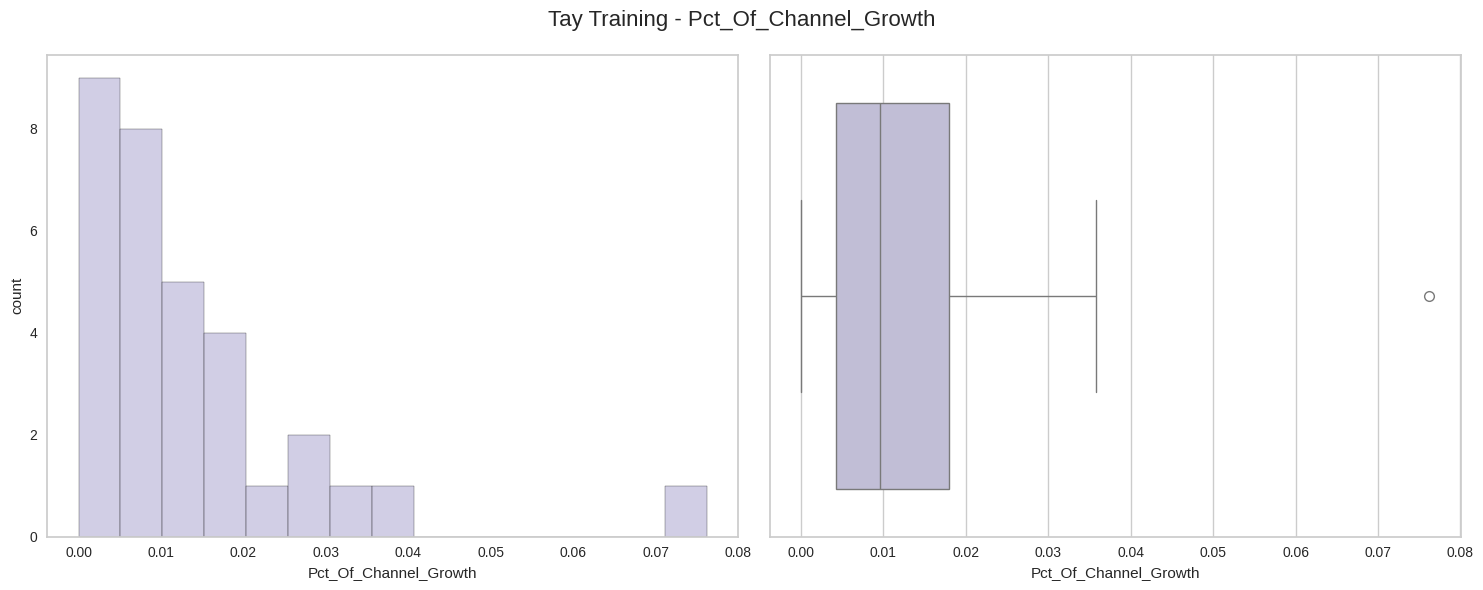

Column: individual_growth
Skew : 0.0


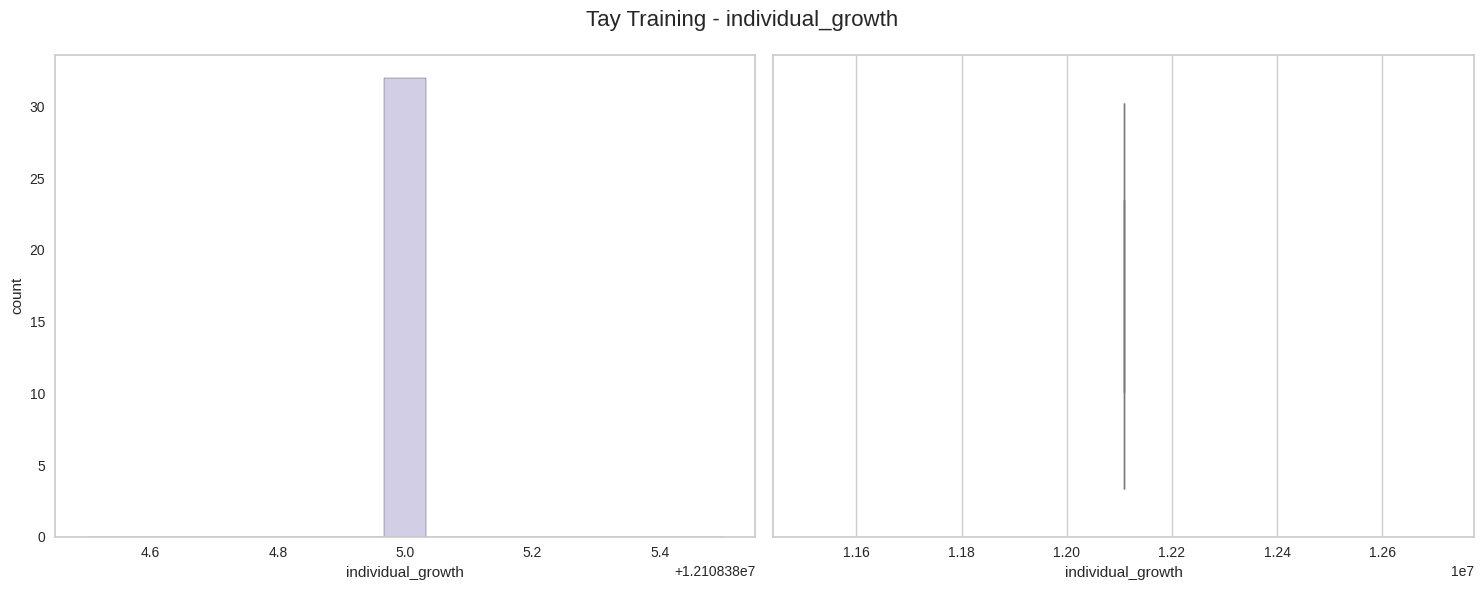

Column: Pct_Of_Individual_Growth
Skew : 2.61


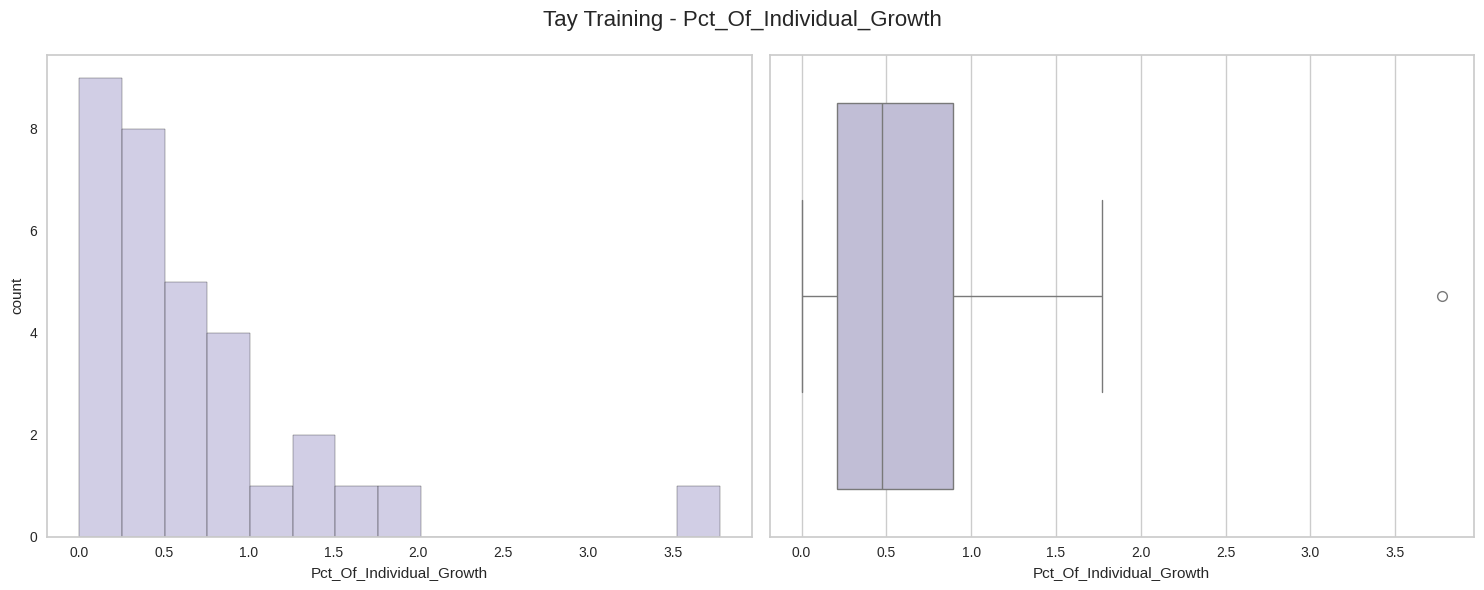

Column: Performance_Score
Skew : 2.53


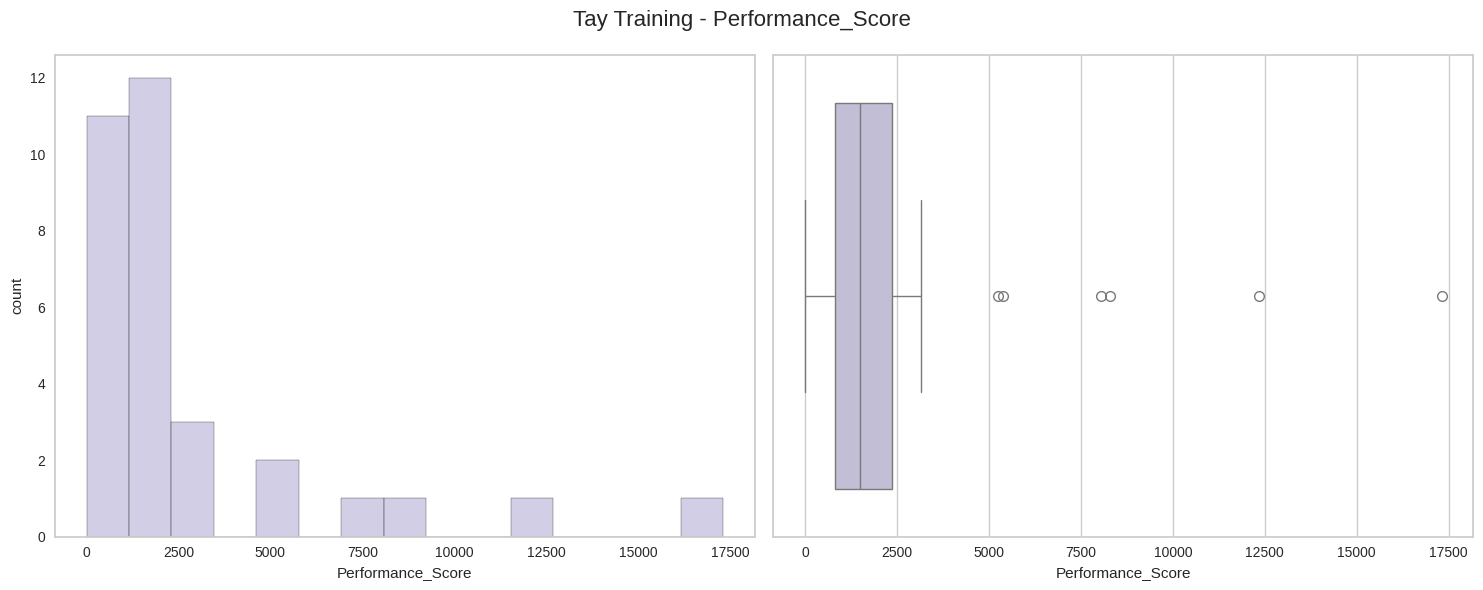


YOUTUBER: Vivi Winkler
Column: Views
Skew : 8.11


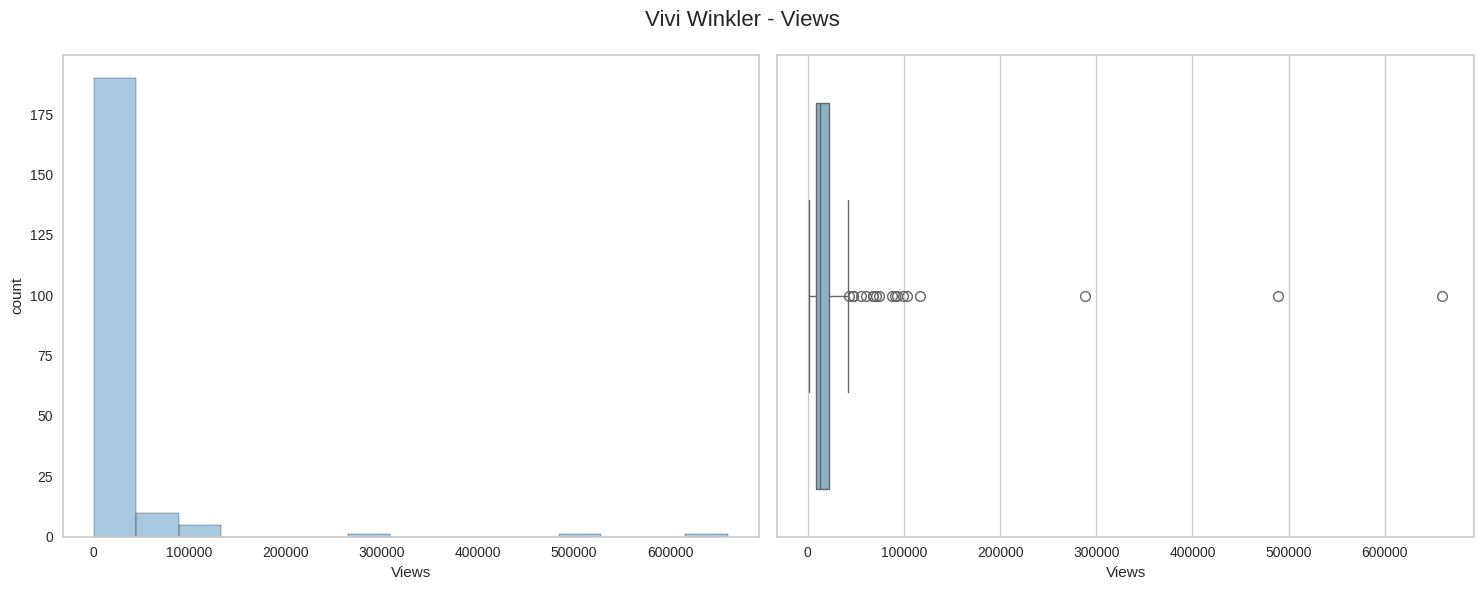

Column: Likes
Skew : 5.45


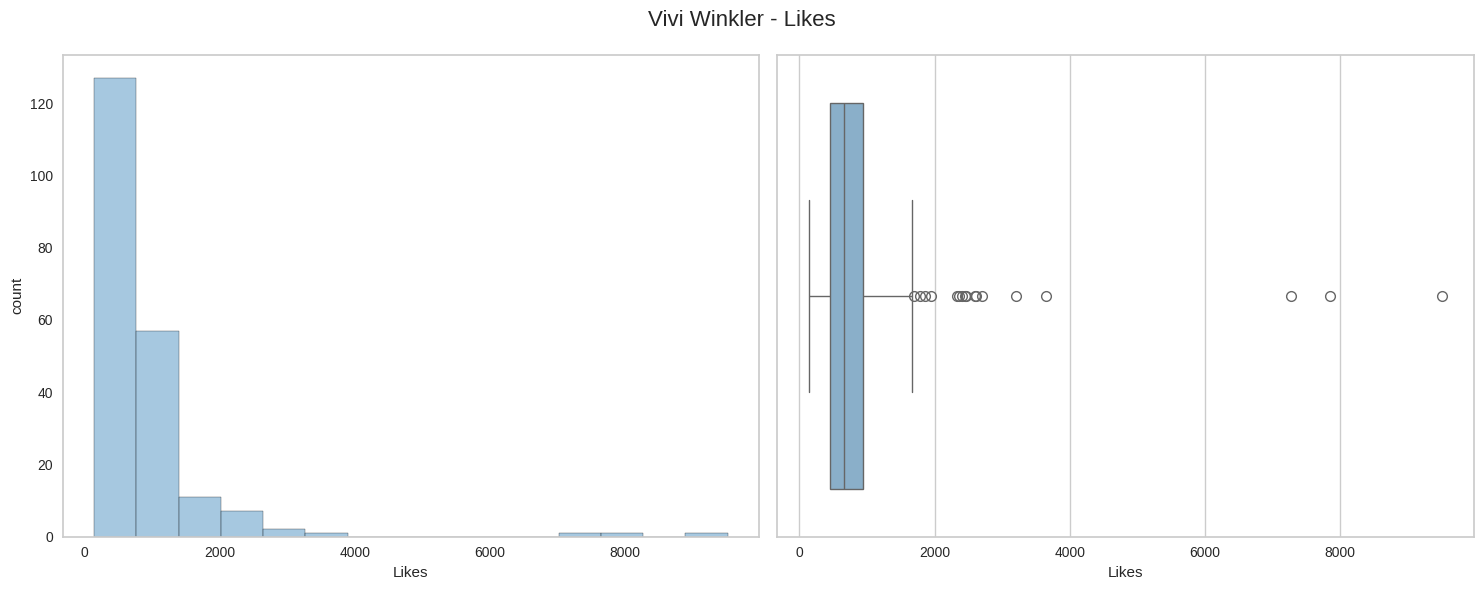

Column: Dislikes
Skew : 0.0


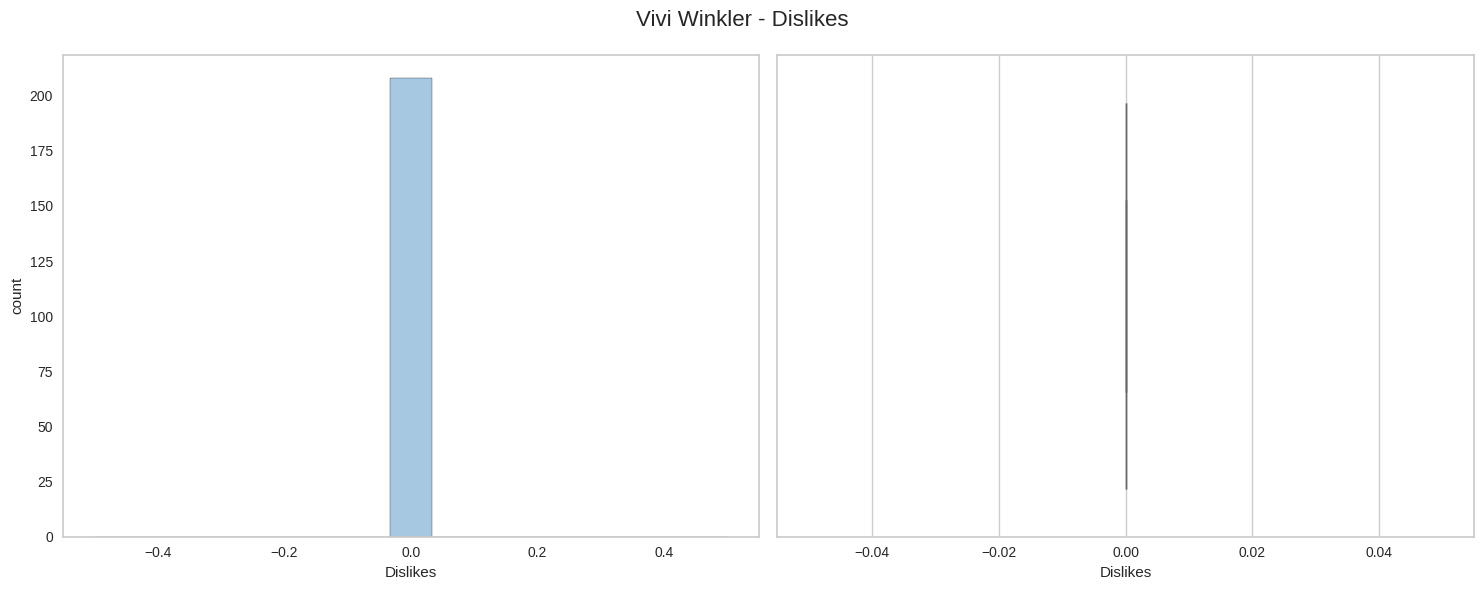

Column: Comments
Skew : 5.97


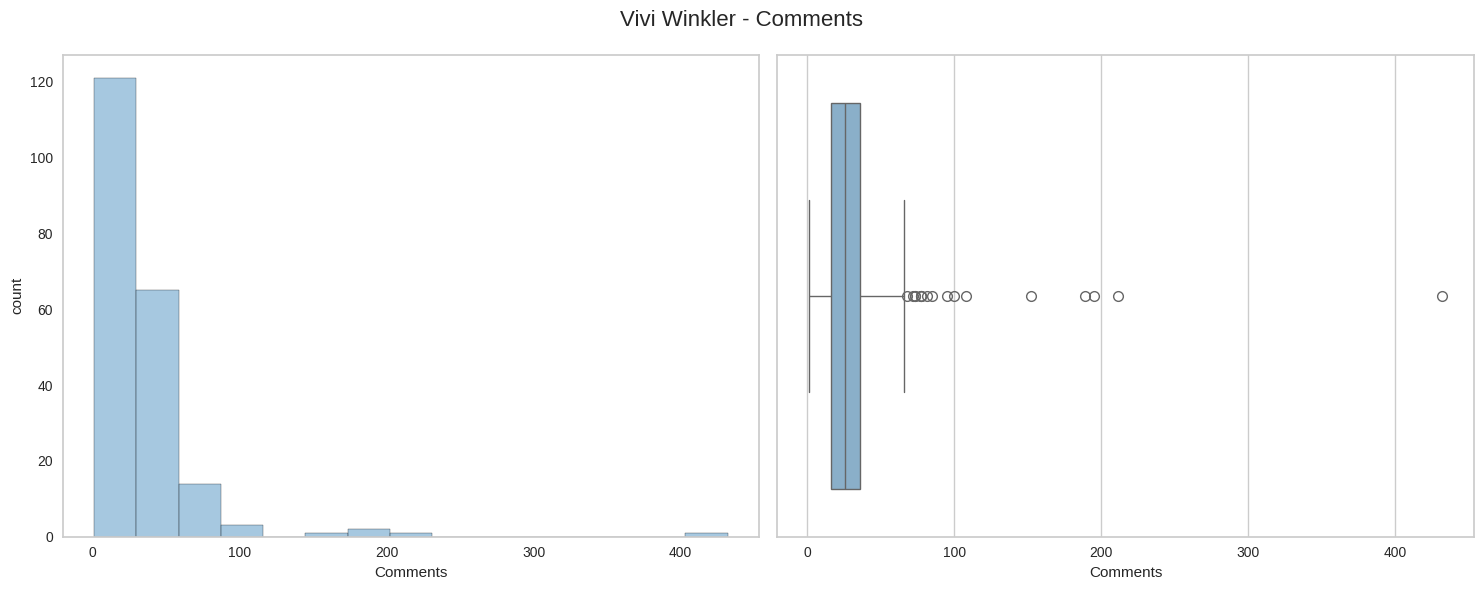

Column: Engagement_score
Skew : 5.89


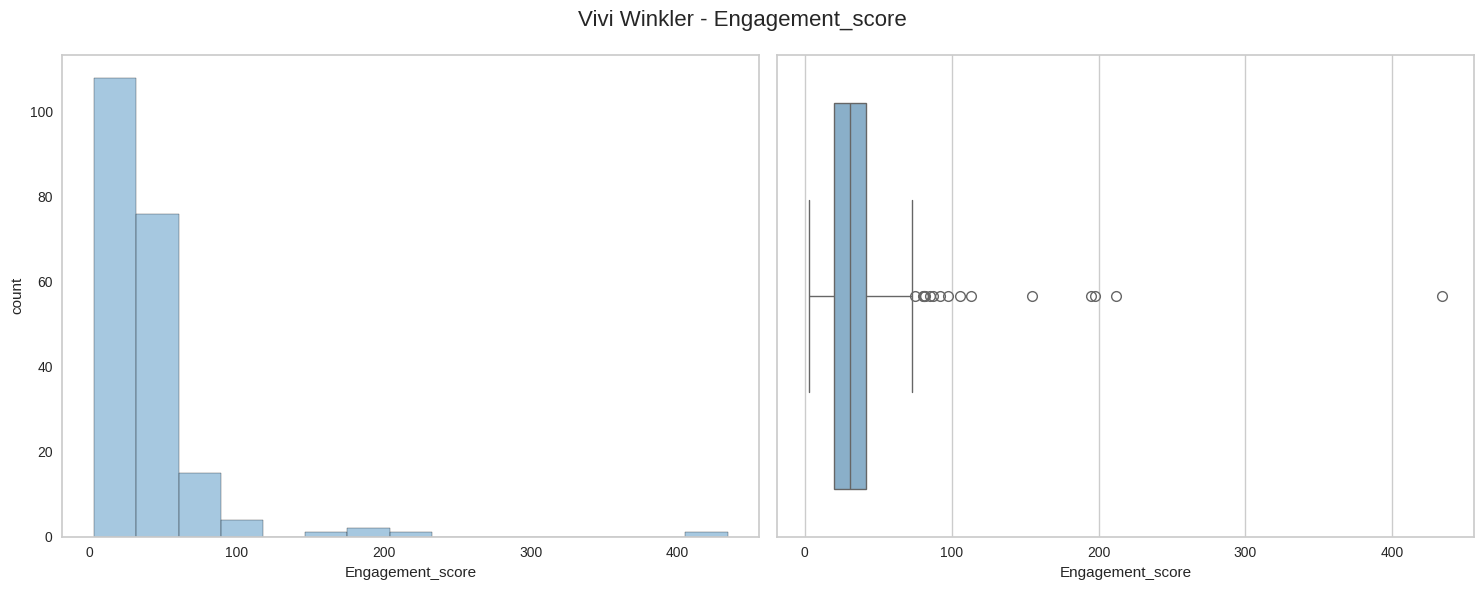

Column: Days_Available
Skew : -0.13


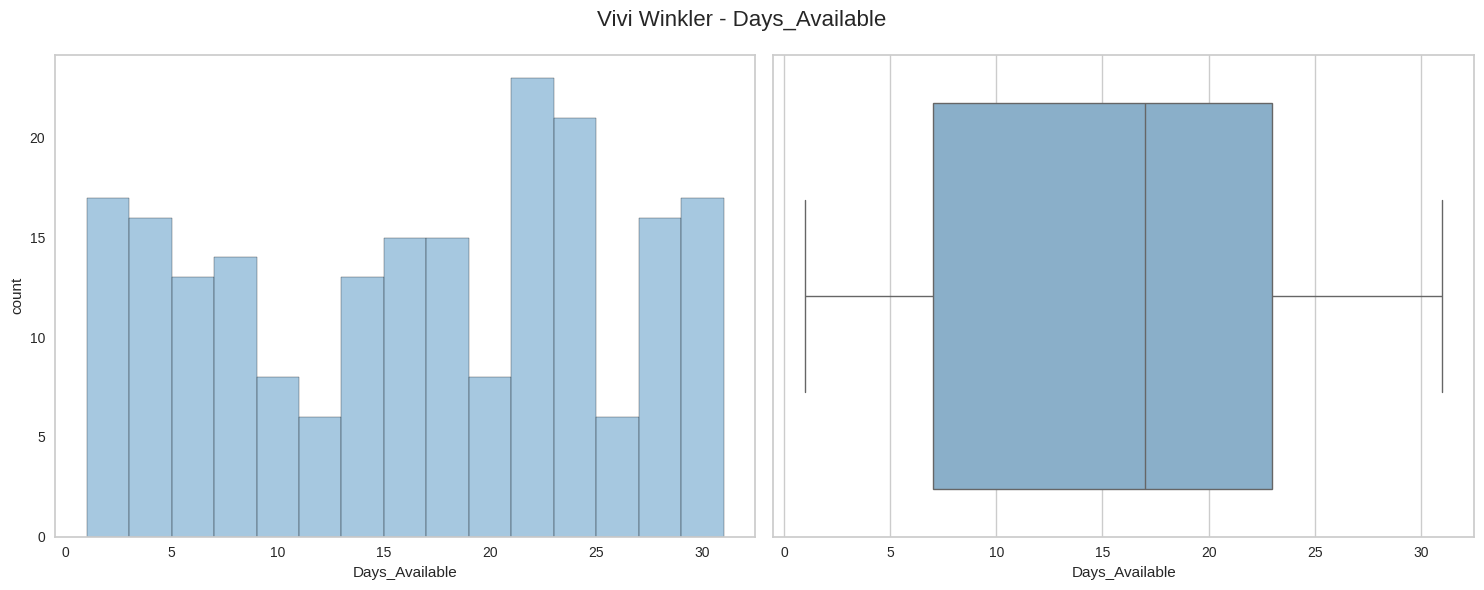

Column: Avg_Views_Per_Day
Skew : 8.93


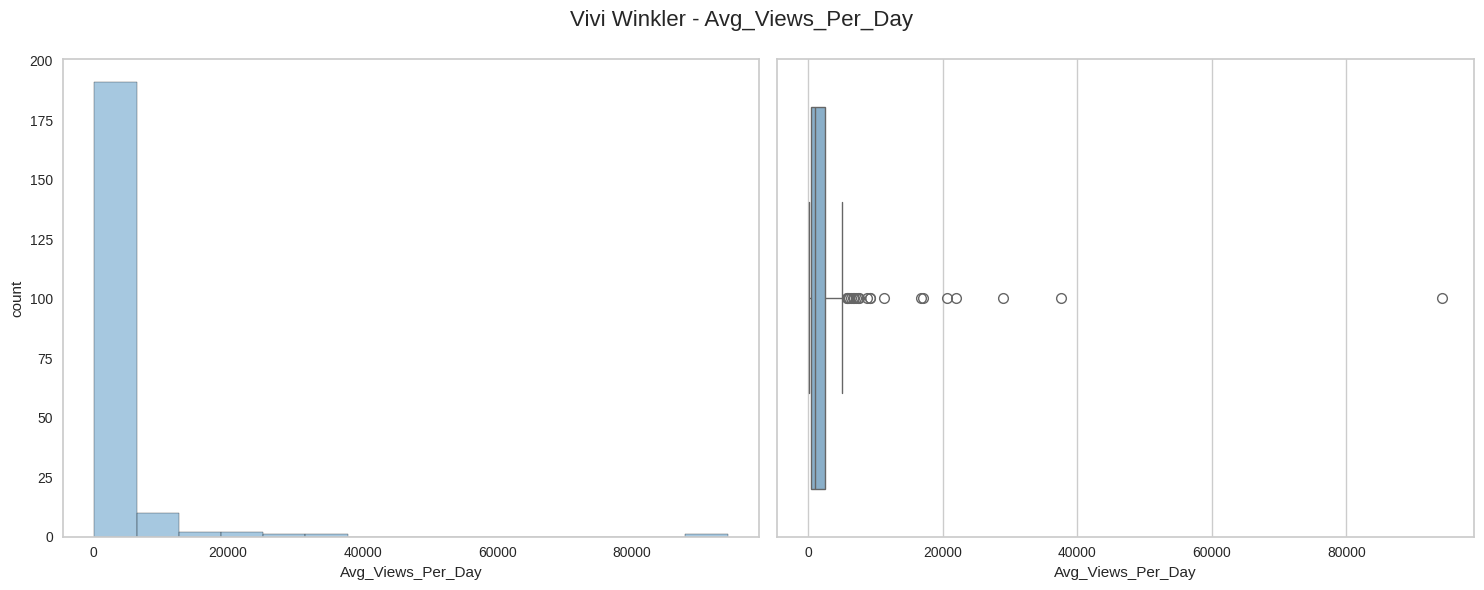

Column: Views_Ratio
Skew : 8.11


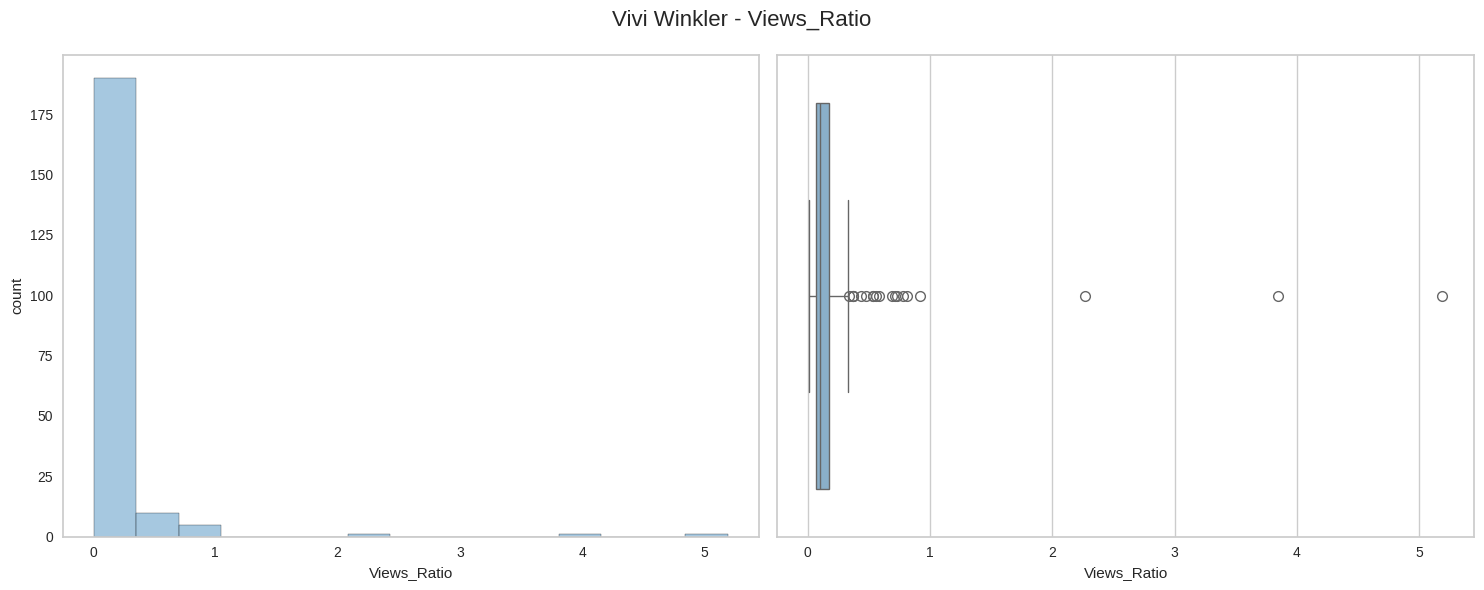

Column: Pct_Of_Channel_Growth
Skew : 8.11


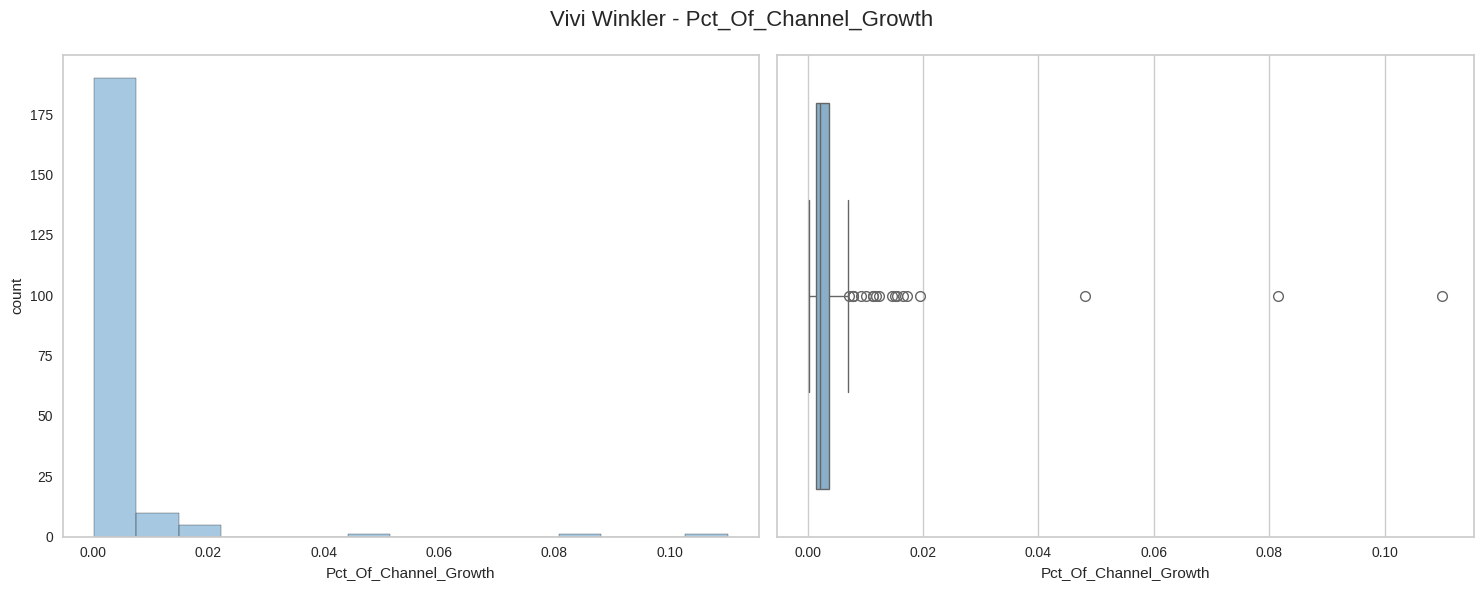

Column: individual_growth
Skew : 0.0


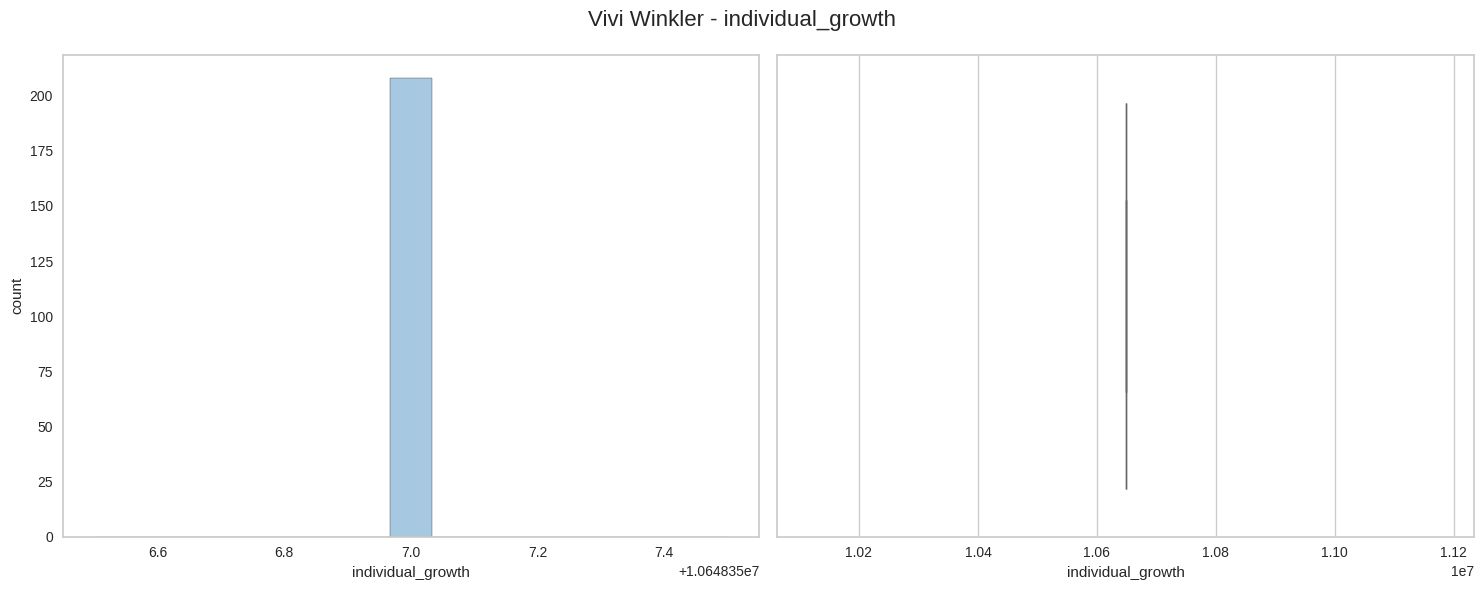

Column: Pct_Of_Individual_Growth
Skew : 8.11


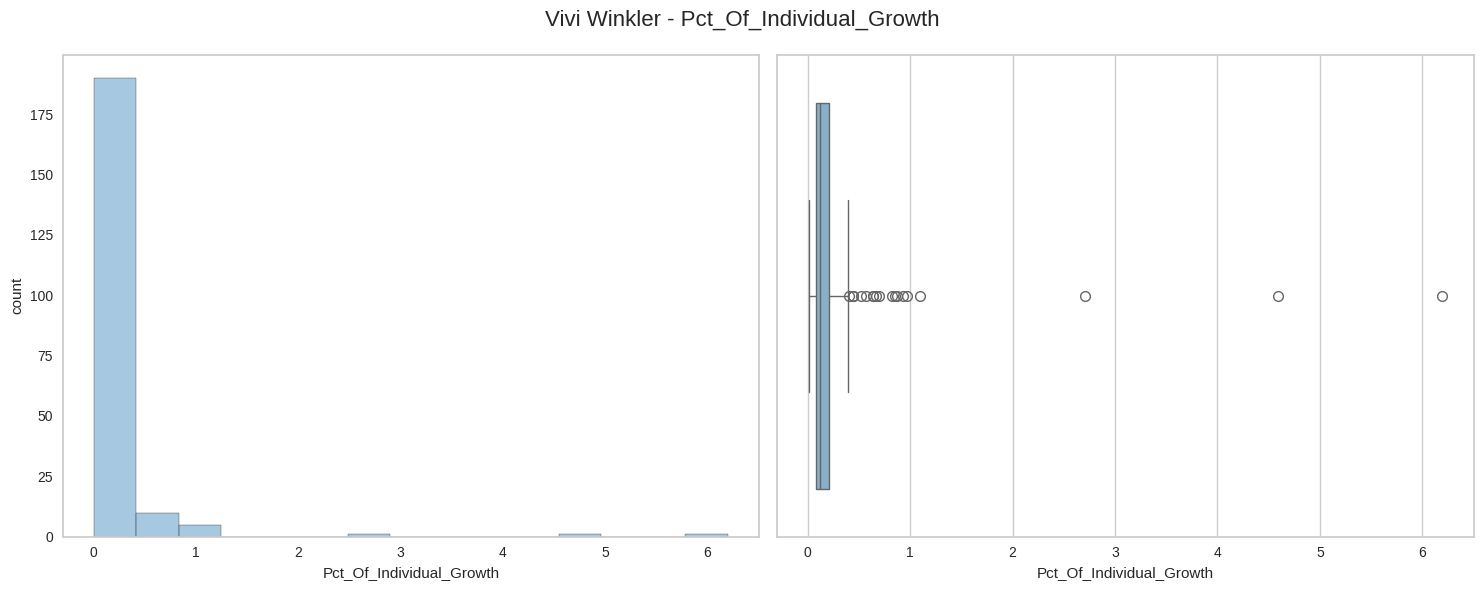

Column: Performance_Score
Skew : 8.92


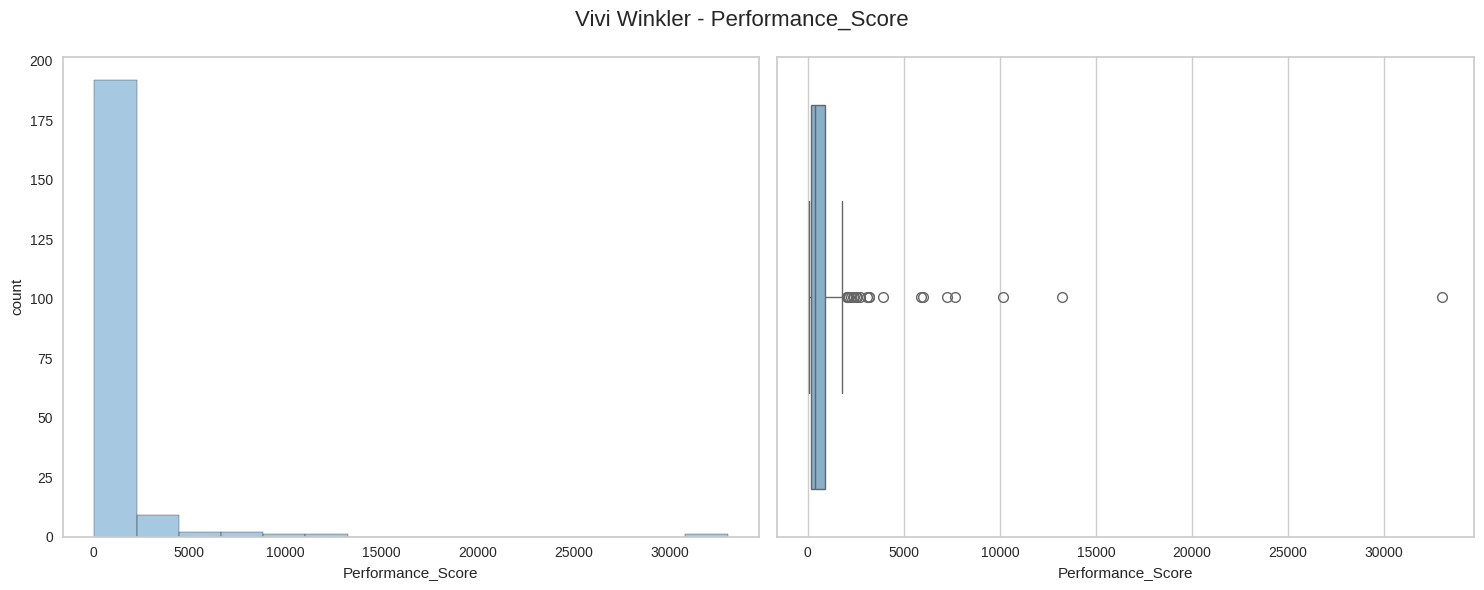


YOUTUBER: Rodrigo Góes
Column: Views
Skew : 1.36


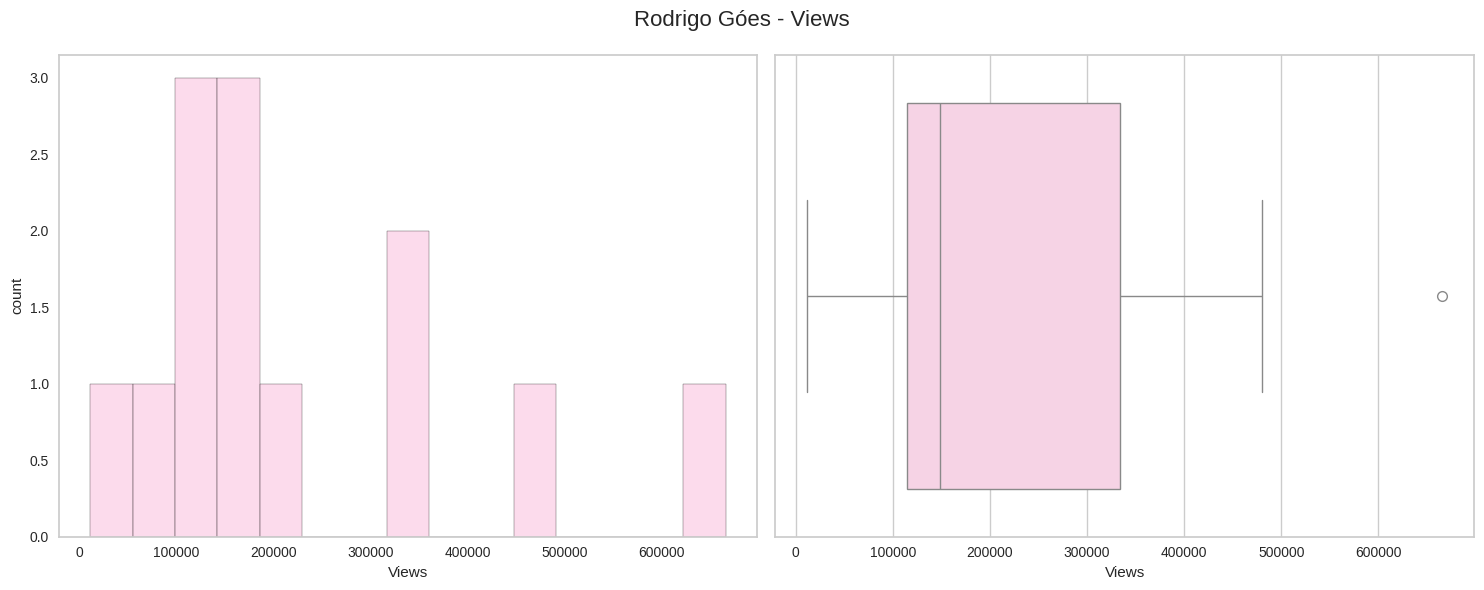

Column: Likes
Skew : 0.7


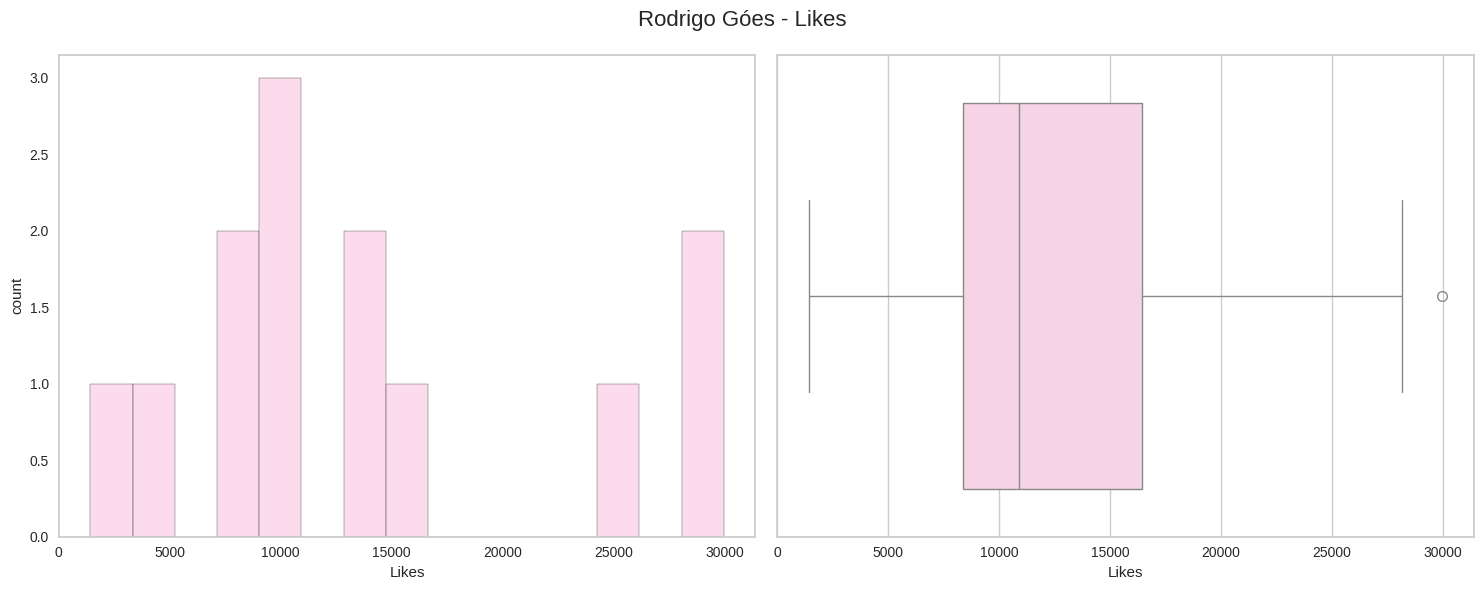

Column: Dislikes
Skew : 0.0


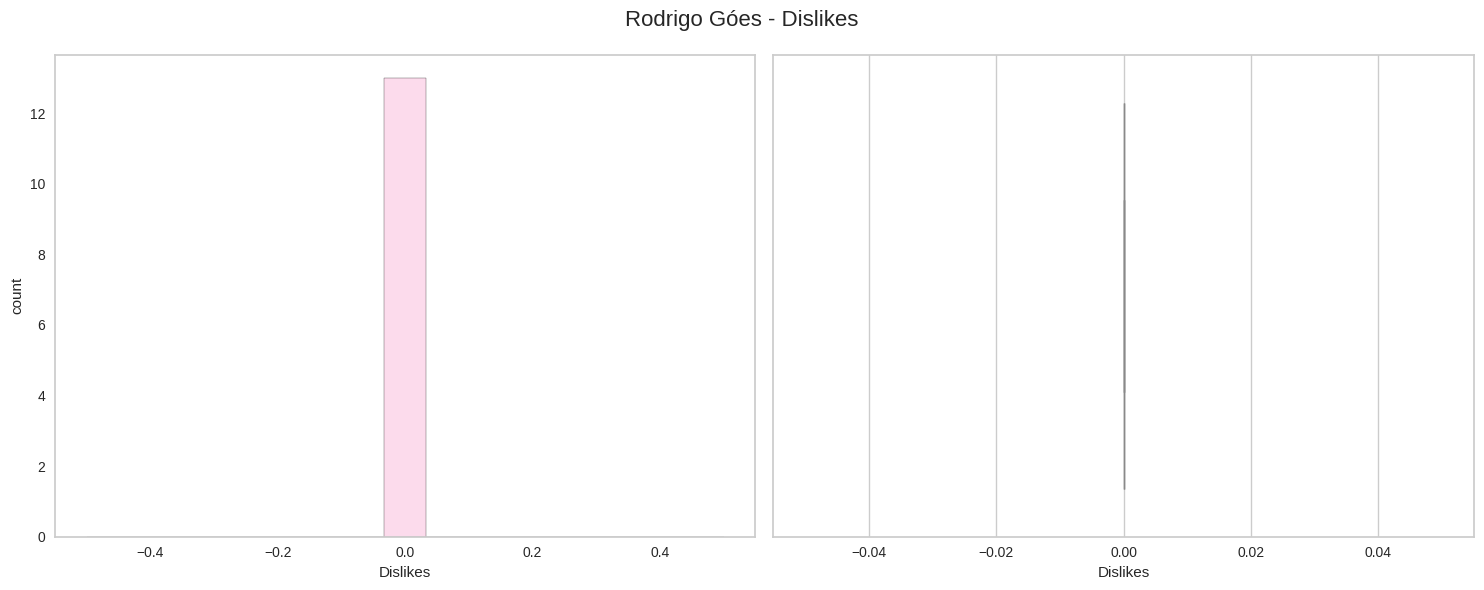

Column: Comments
Skew : 0.71


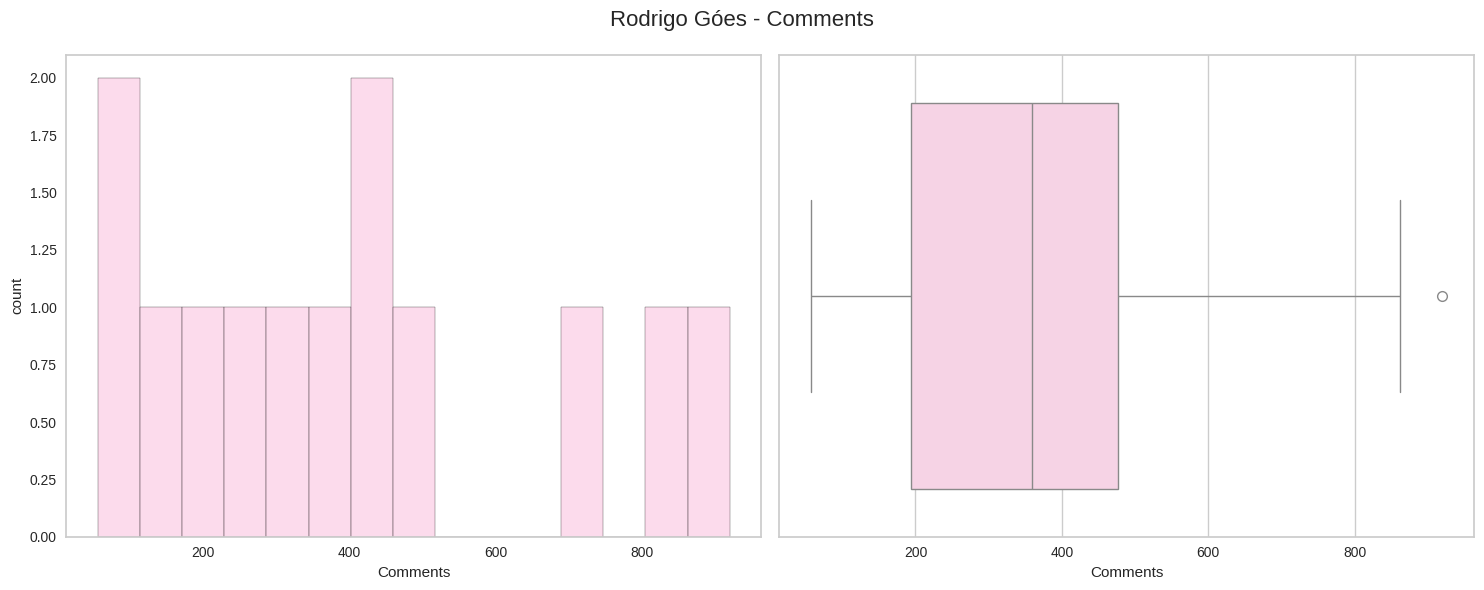

Column: Engagement_score
Skew : 0.72


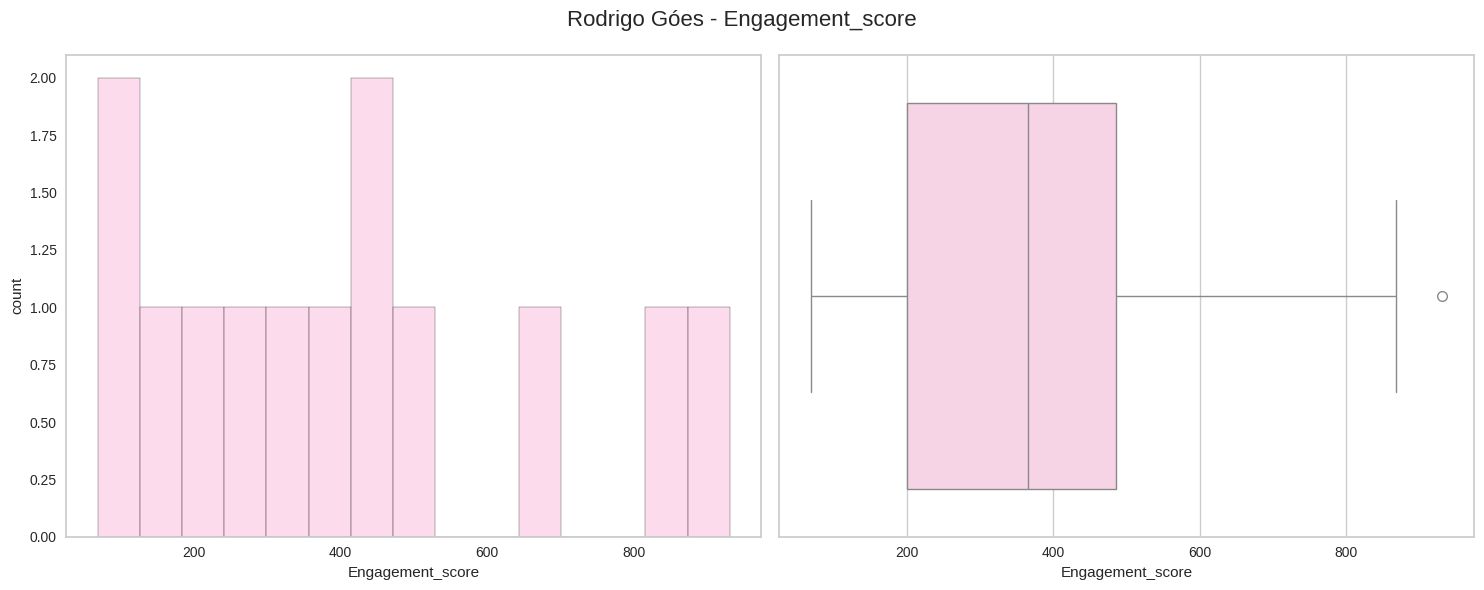

Column: Days_Available
Skew : 0.75


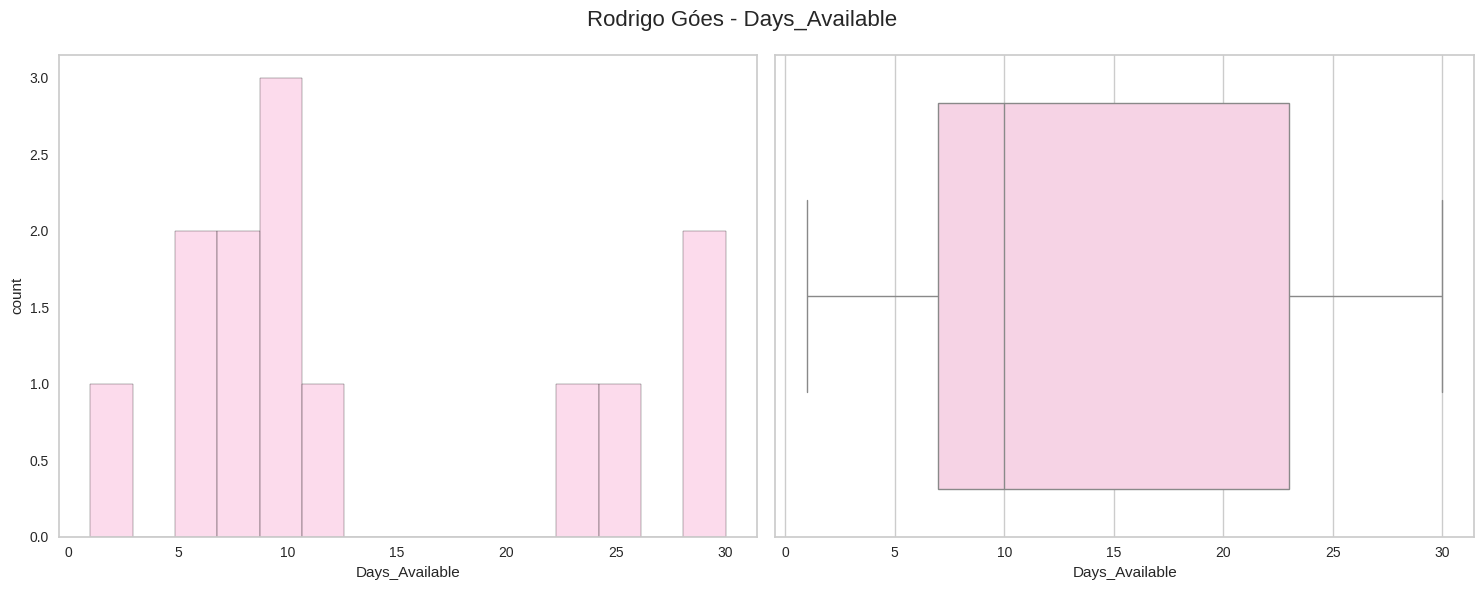

Column: Avg_Views_Per_Day
Skew : 3.02


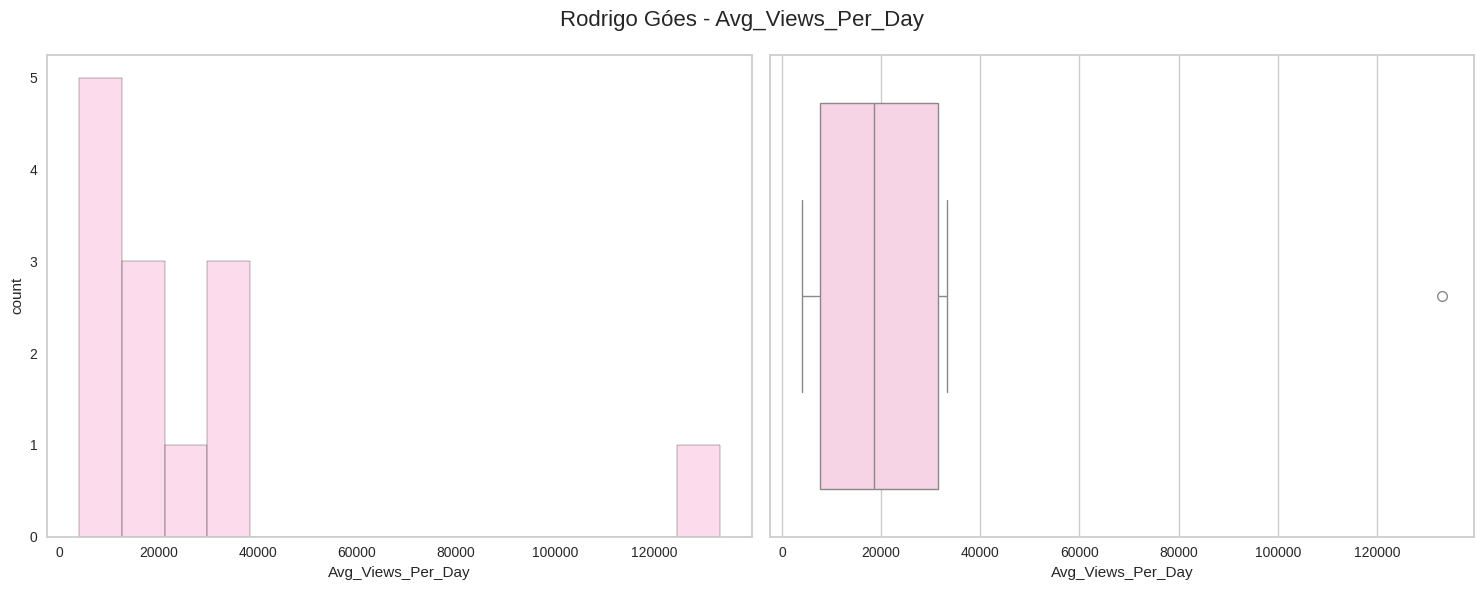

Column: Views_Ratio
Skew : 1.36


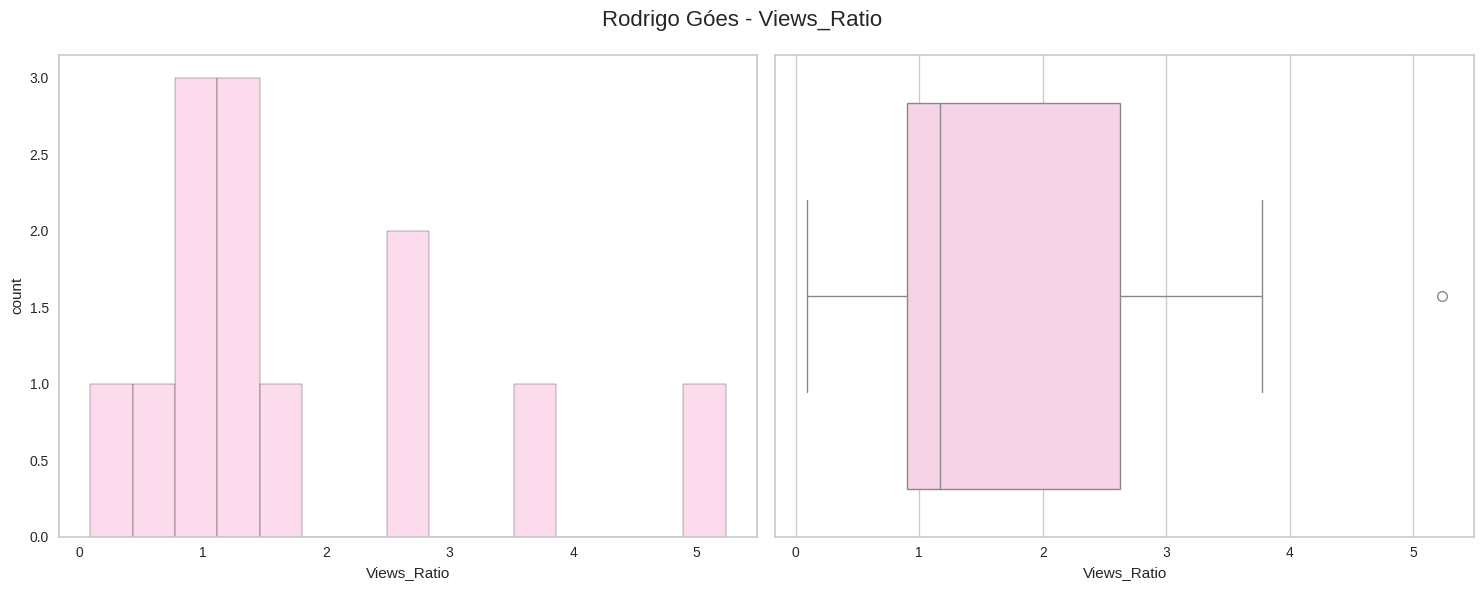

Column: Pct_Of_Channel_Growth
Skew : 1.36


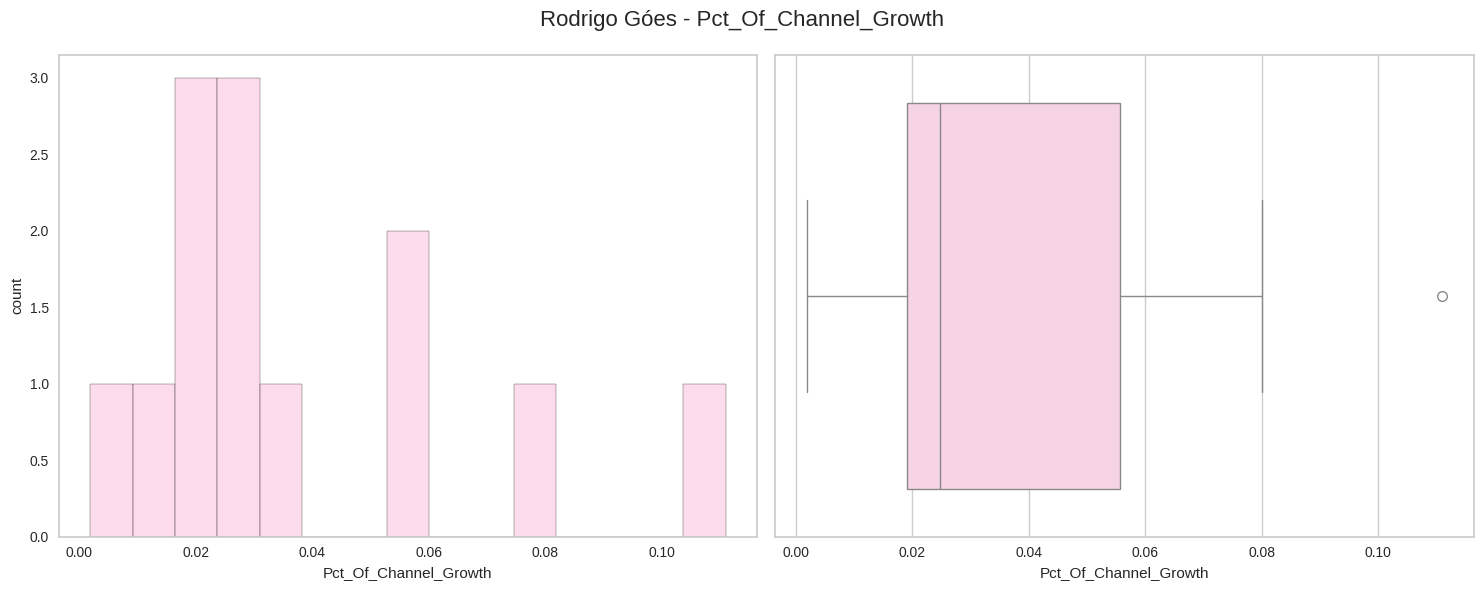

Column: individual_growth
Skew : 0.0


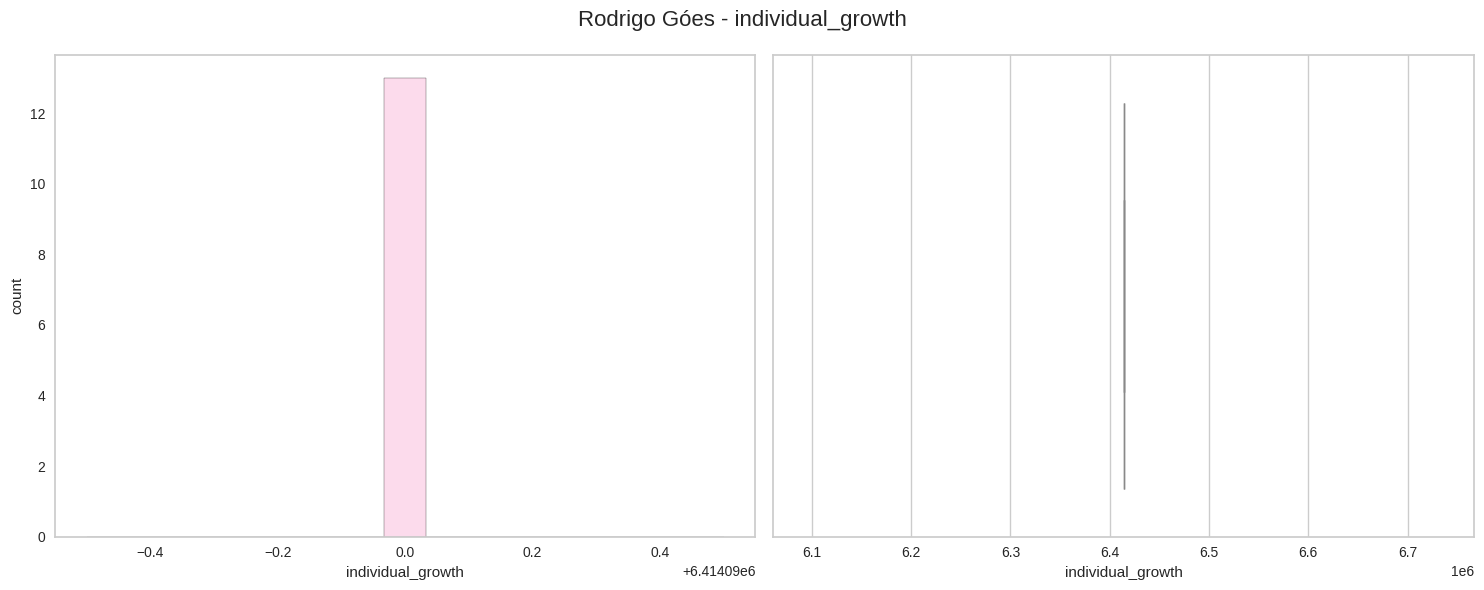

Column: Pct_Of_Individual_Growth
Skew : 1.36


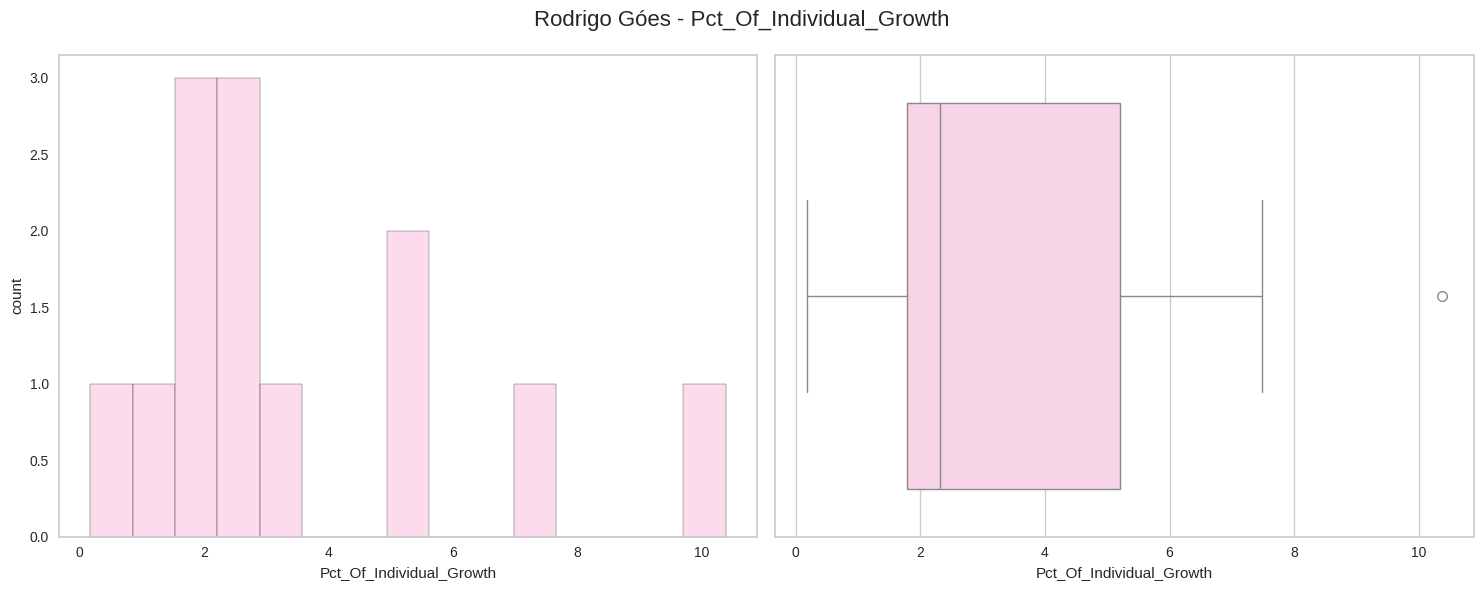

Column: Performance_Score
Skew : 3.02


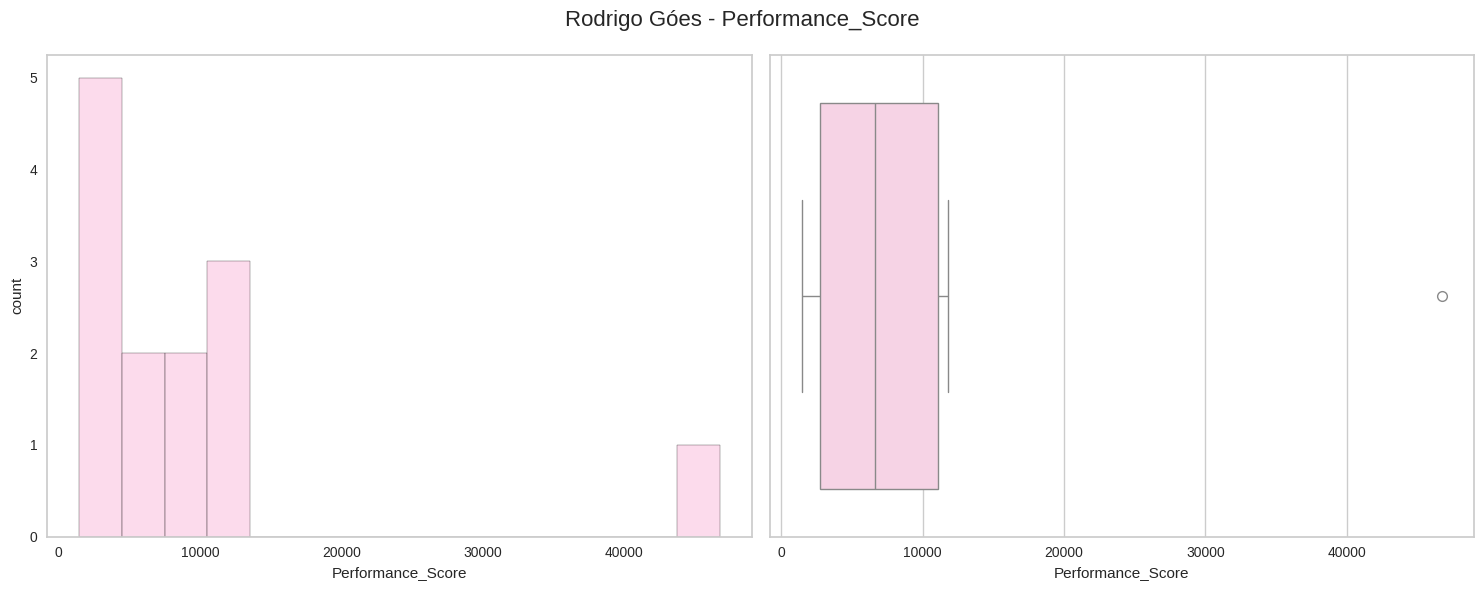


YOUTUBER: Paulo Muzy
Column: Views
Skew : 1.61


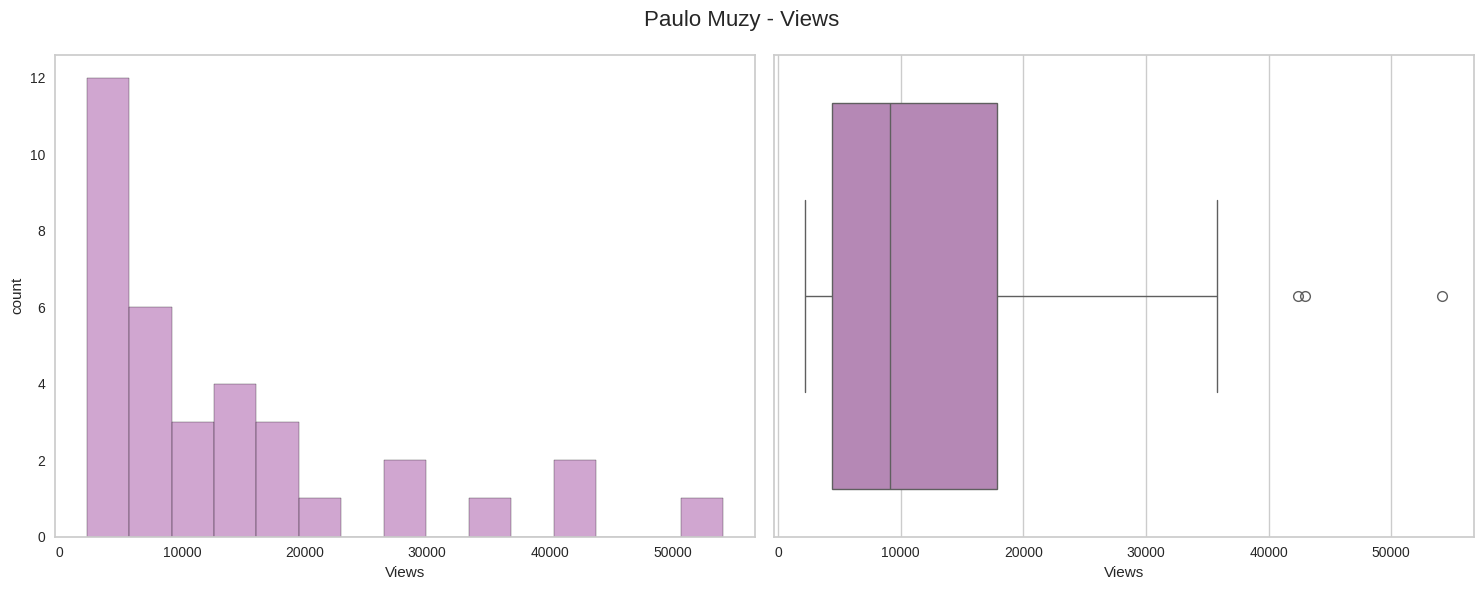

Column: Likes
Skew : 1.95


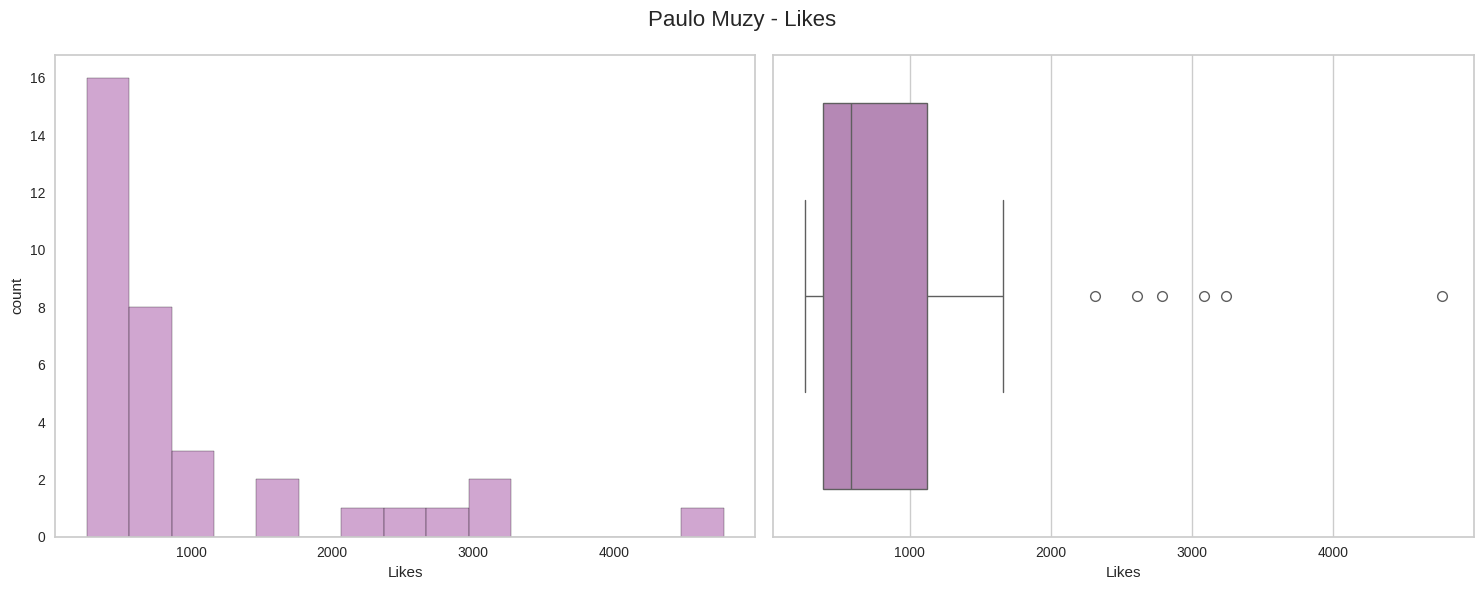

Column: Dislikes
Skew : 0.0


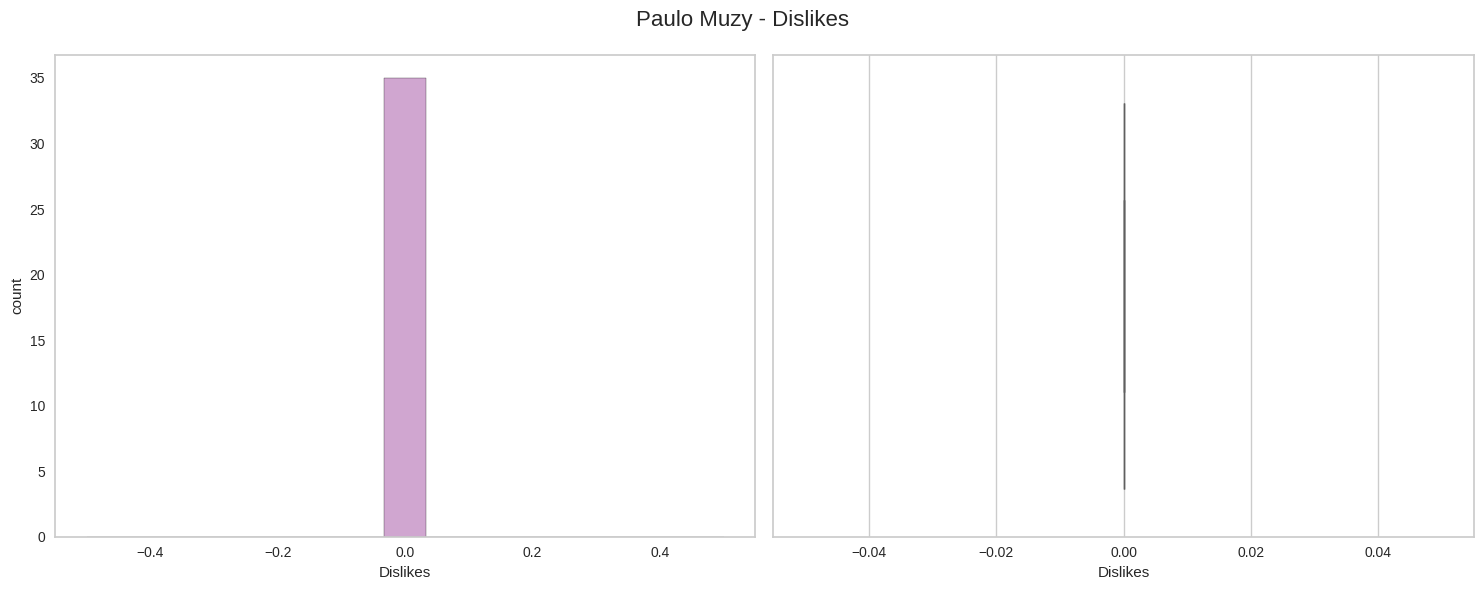

Column: Comments
Skew : 2.08


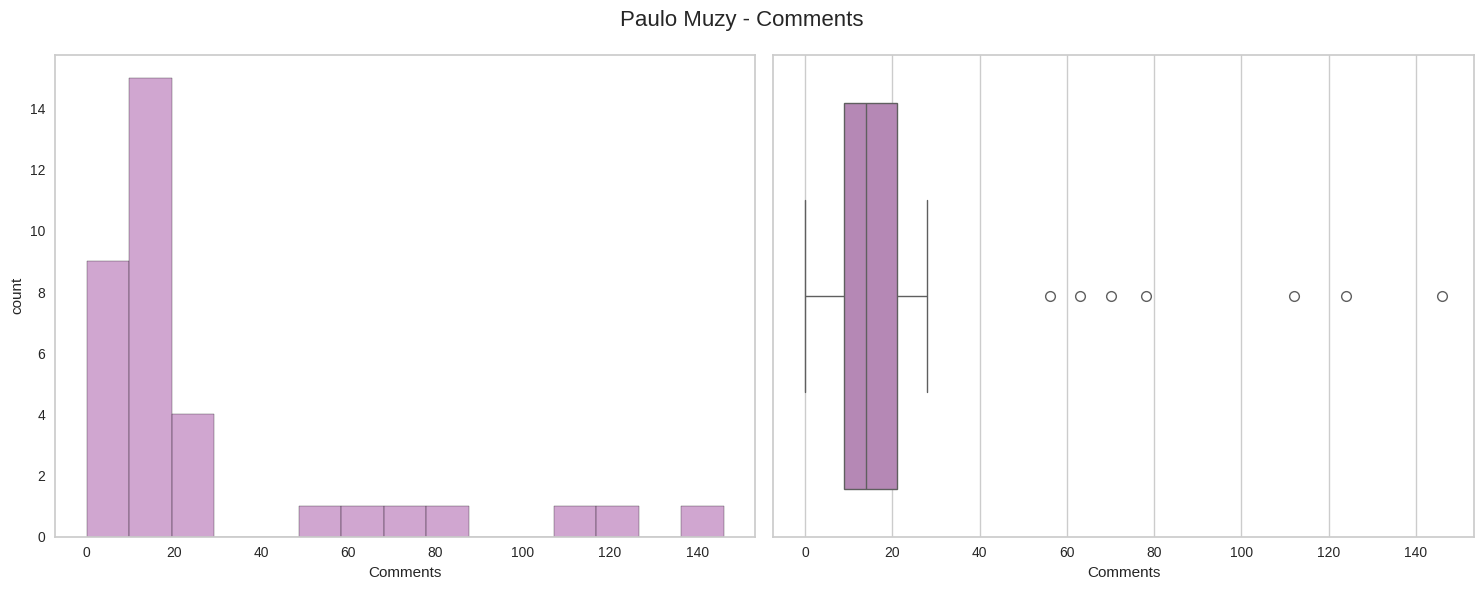

Column: Engagement_score
Skew : 2.06


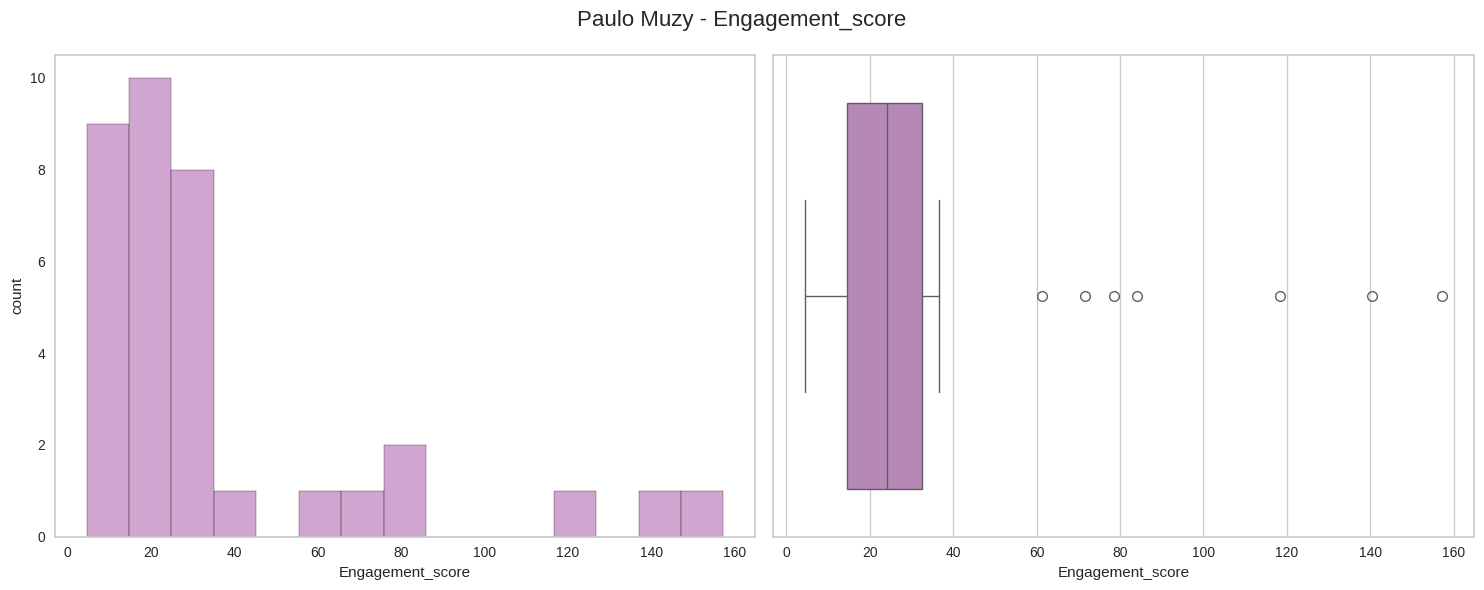

Column: Days_Available
Skew : -0.01


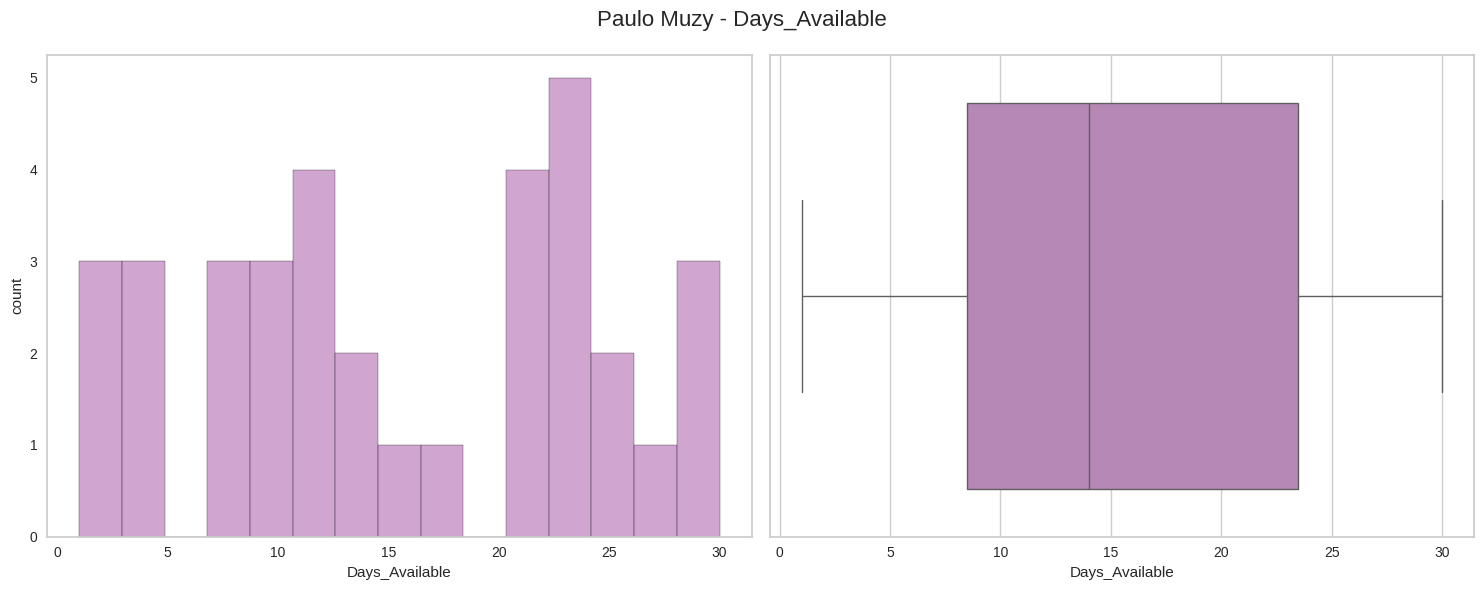

Column: Avg_Views_Per_Day
Skew : 2.55


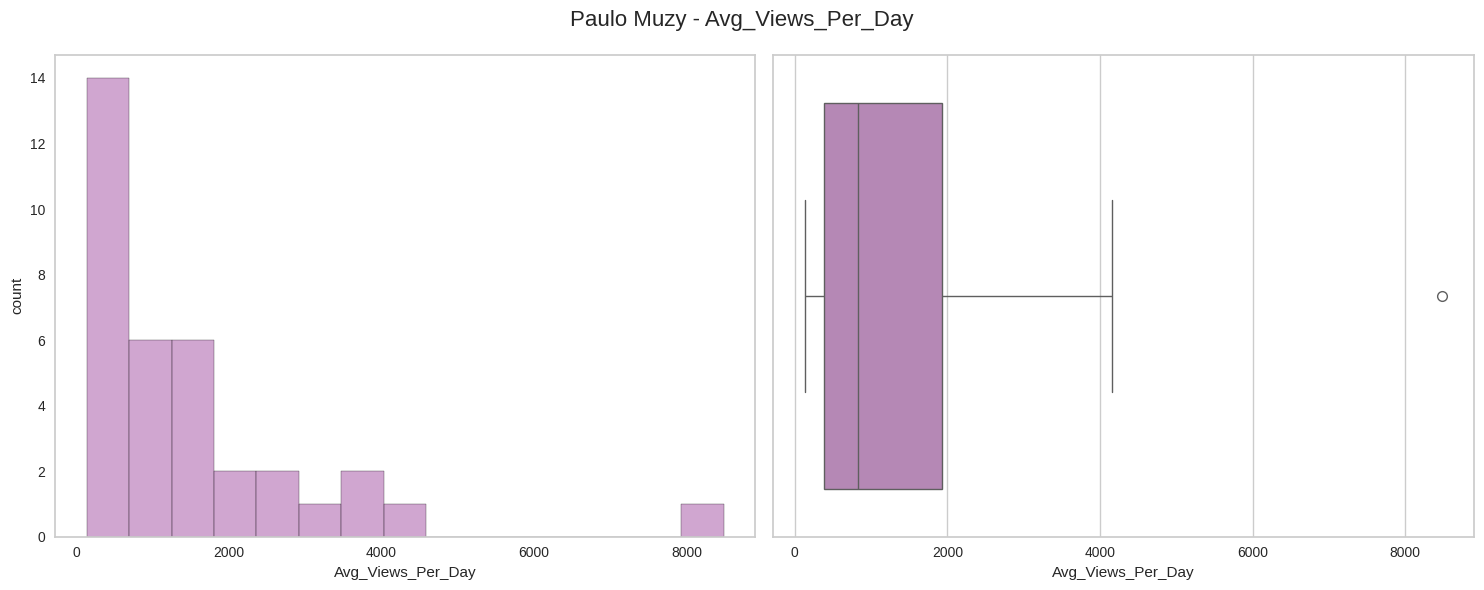

Column: Views_Ratio
Skew : 1.61


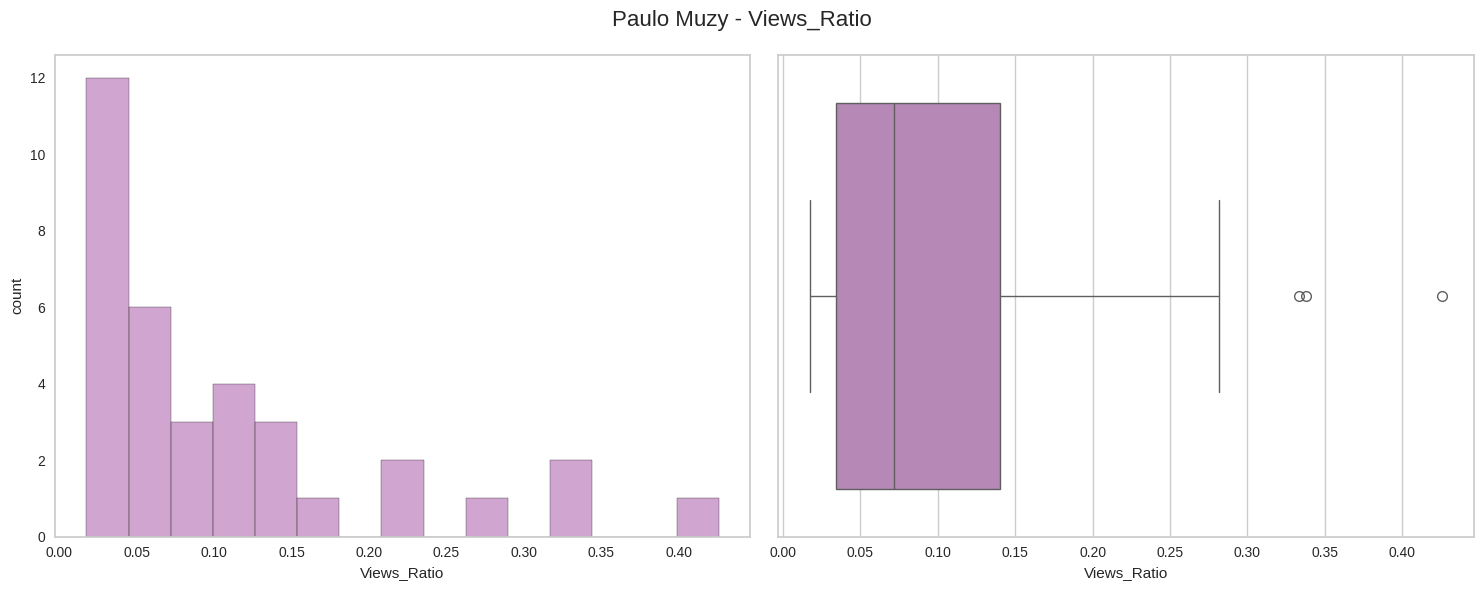

Column: Pct_Of_Channel_Growth
Skew : 1.61


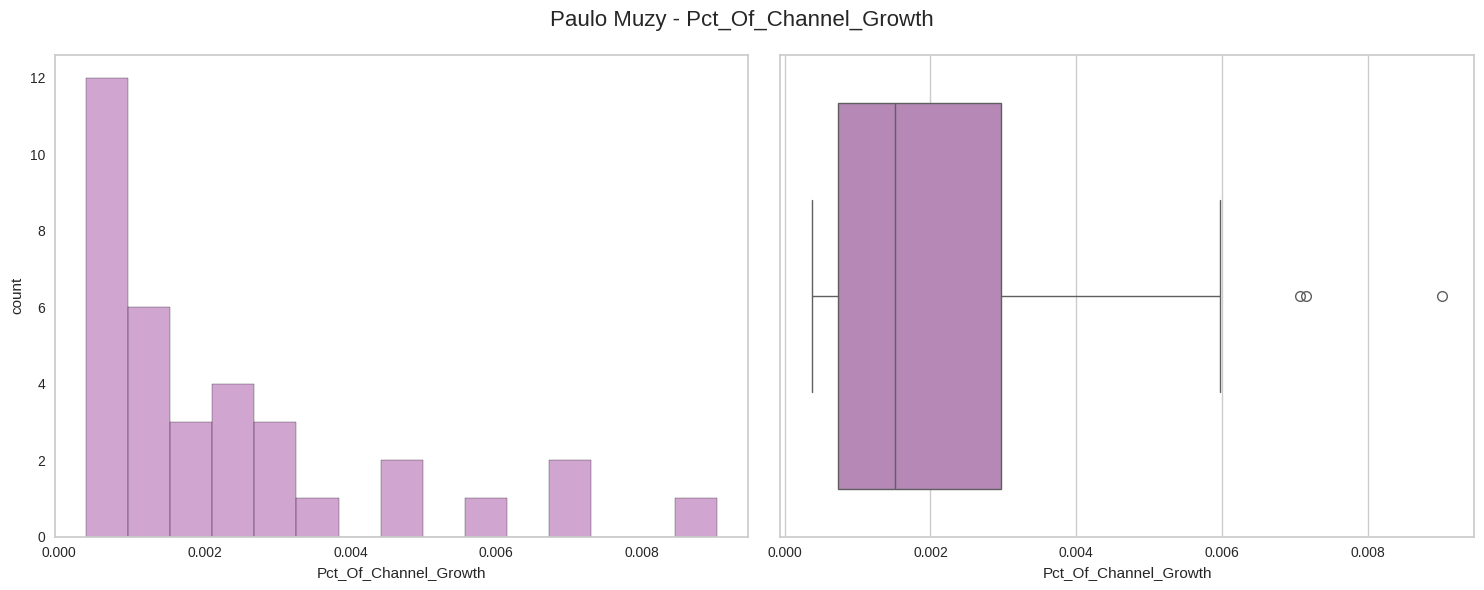

Column: individual_growth
Skew : 0.0


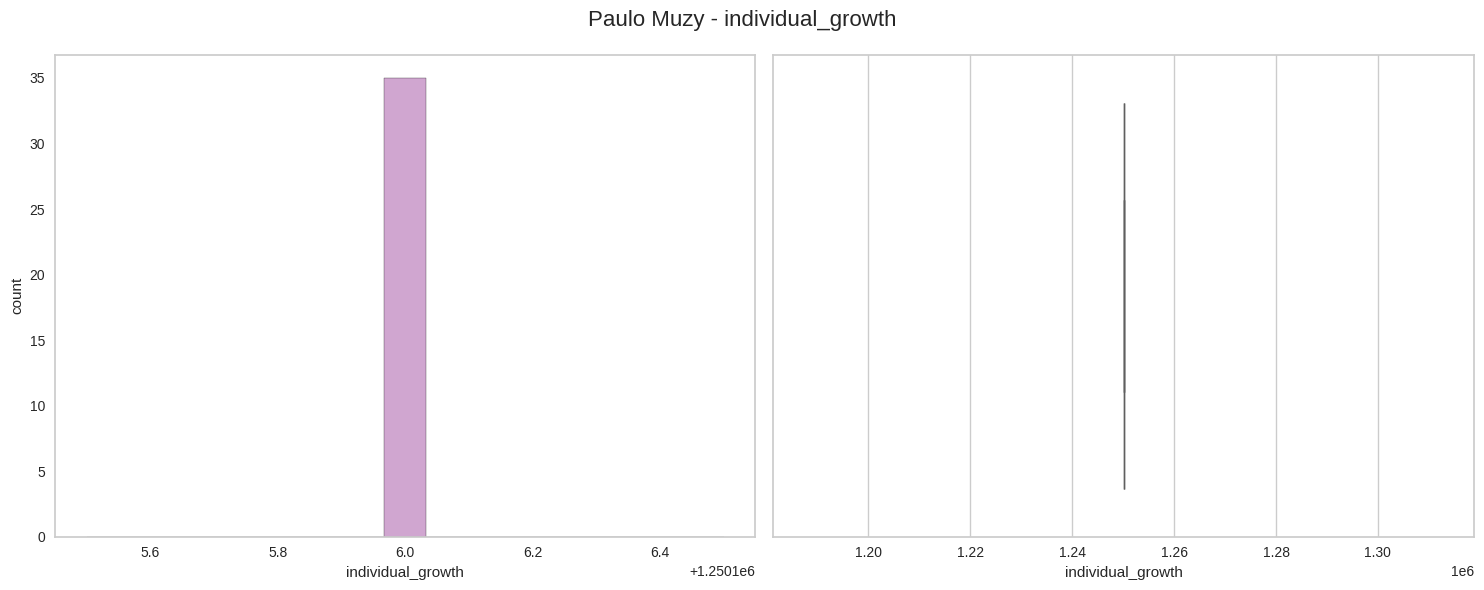

Column: Pct_Of_Individual_Growth
Skew : 1.61


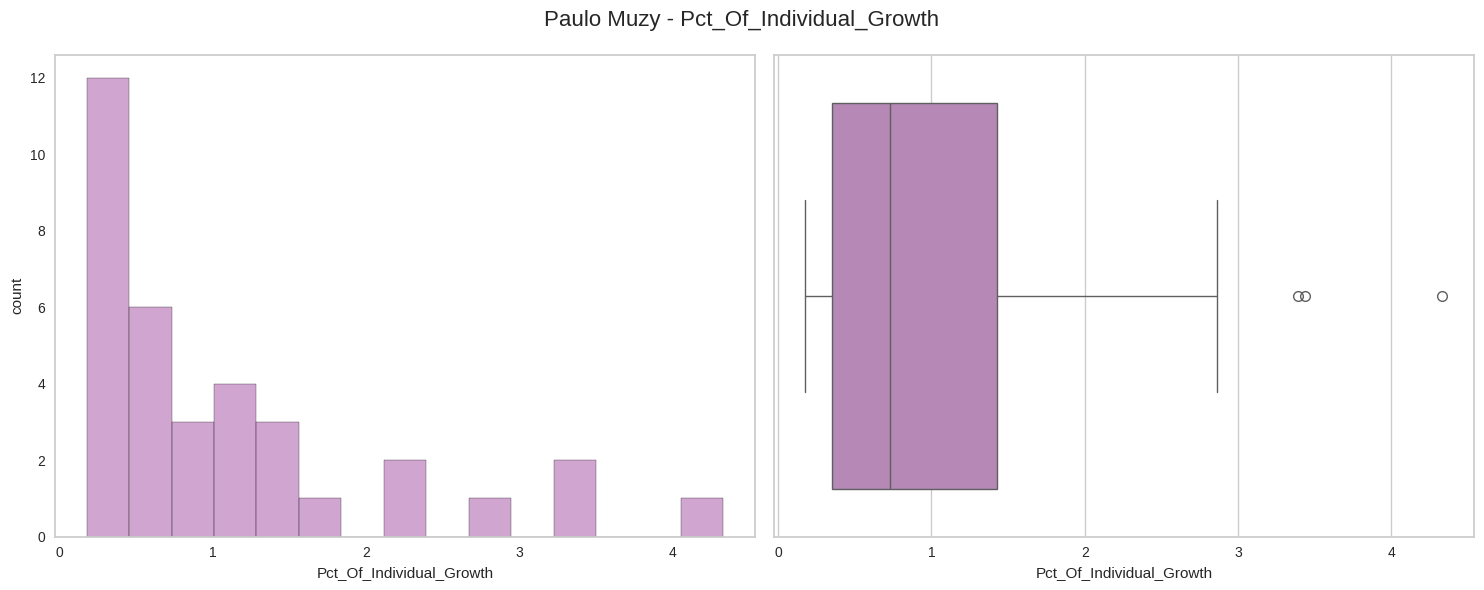

Column: Performance_Score
Skew : 2.52


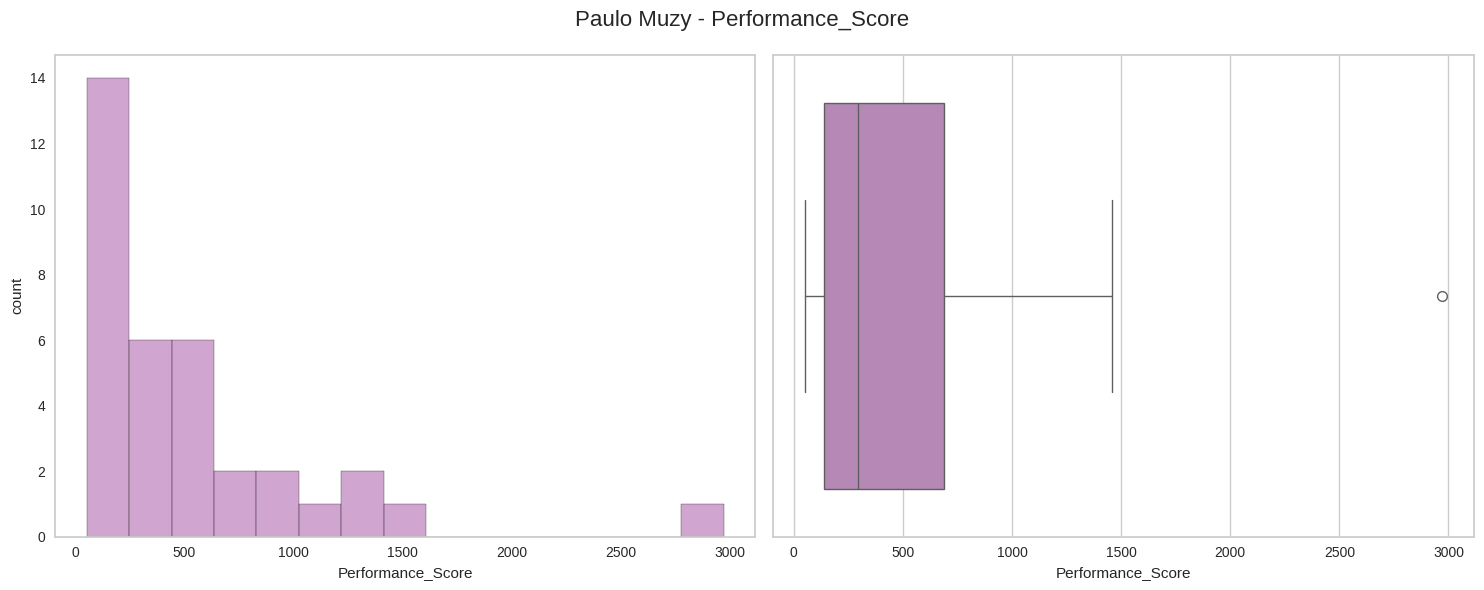


YOUTUBER: Angela Borges
Column: Views
Skew : 1.81


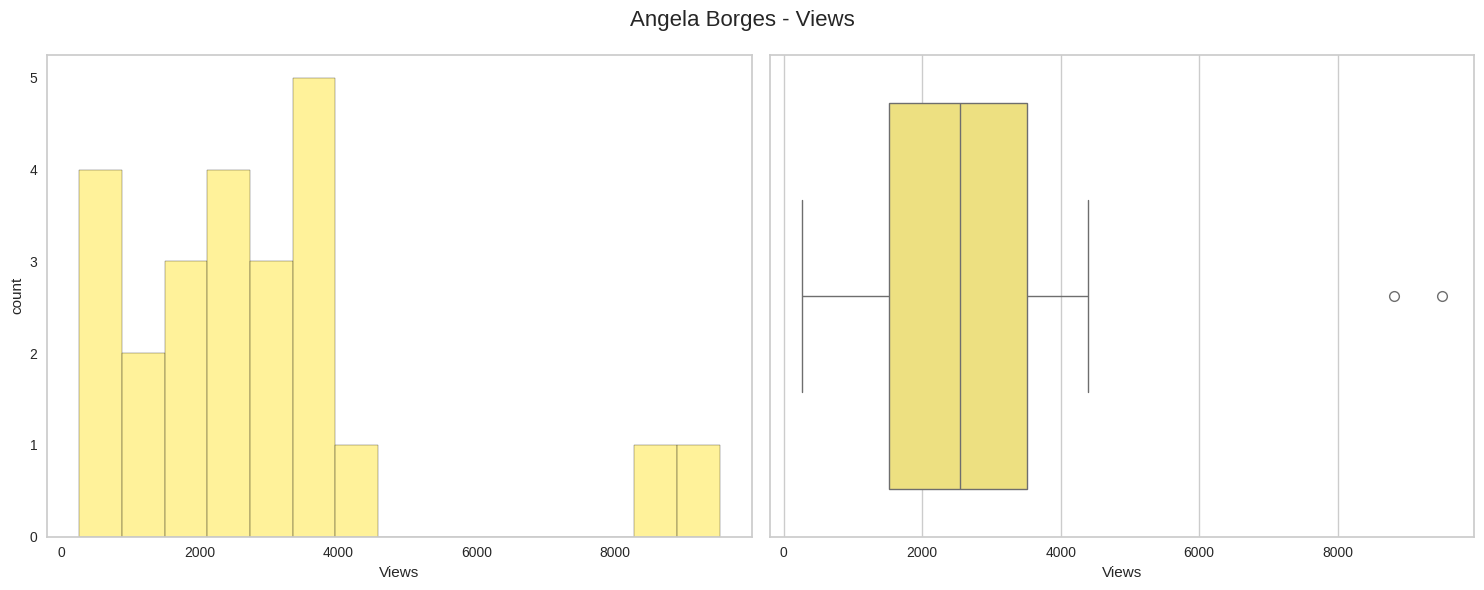

Column: Likes
Skew : 2.74


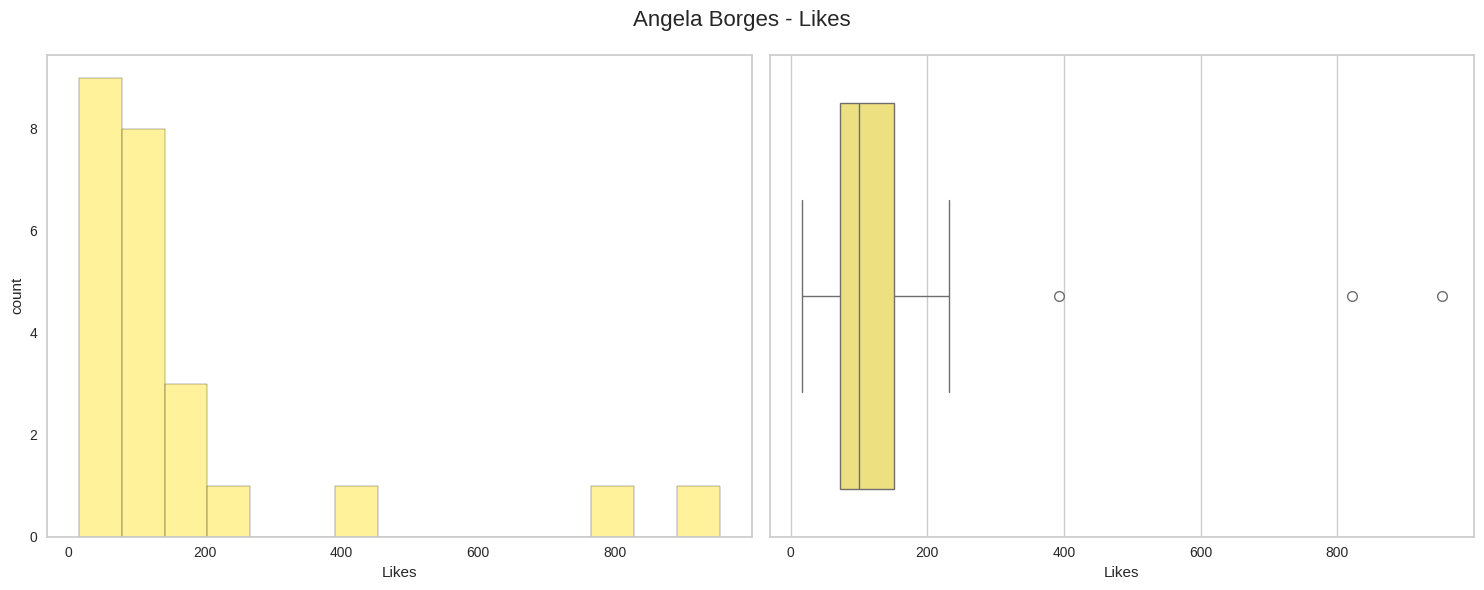

Column: Dislikes
Skew : 0.0


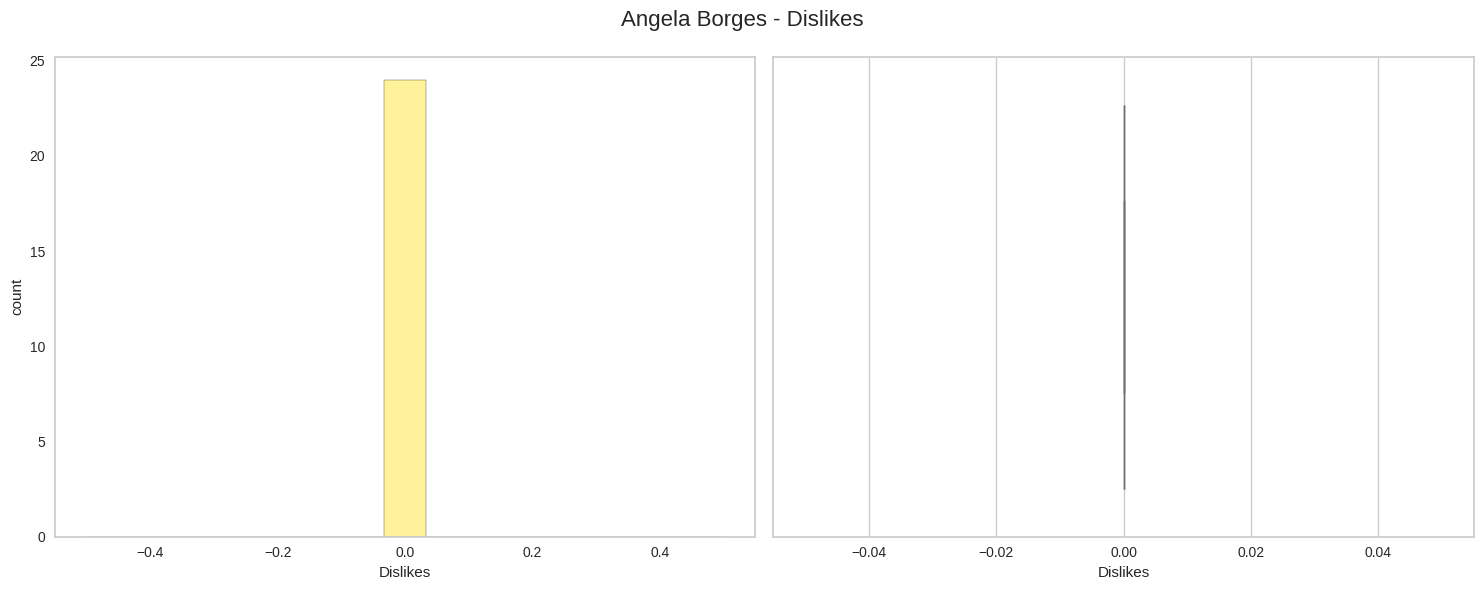

Column: Comments
Skew : 2.01


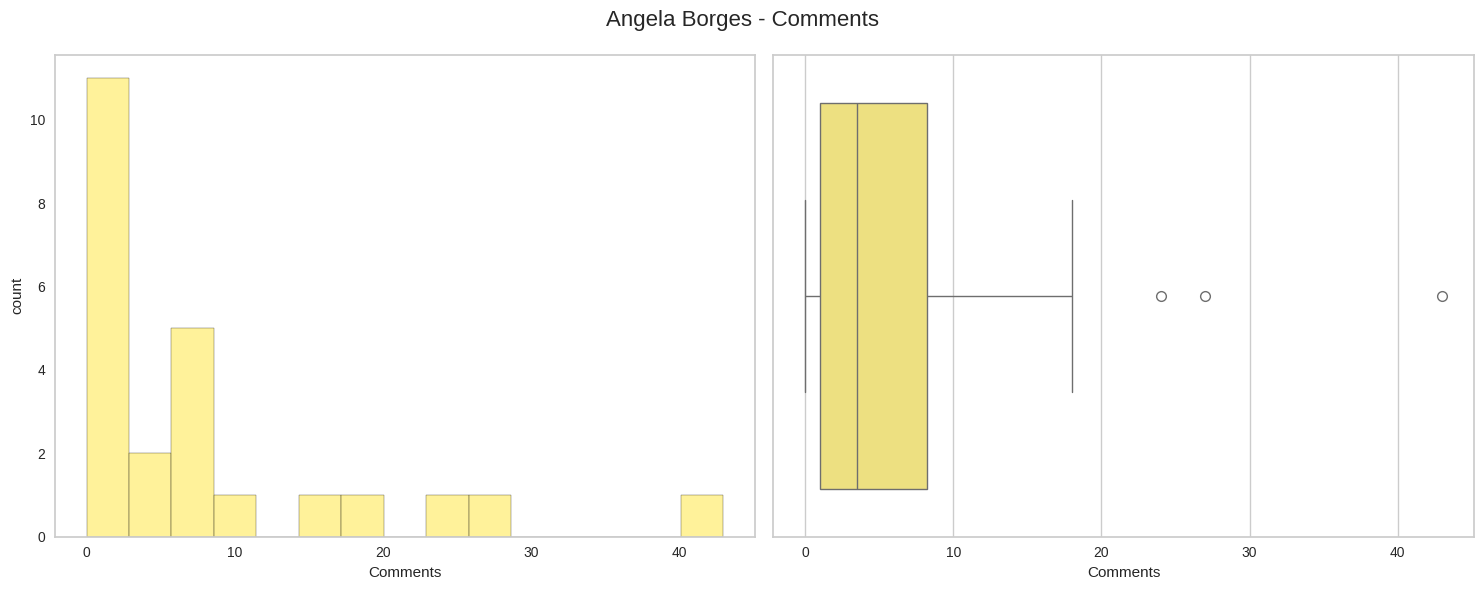

Column: Engagement_score
Skew : 1.45


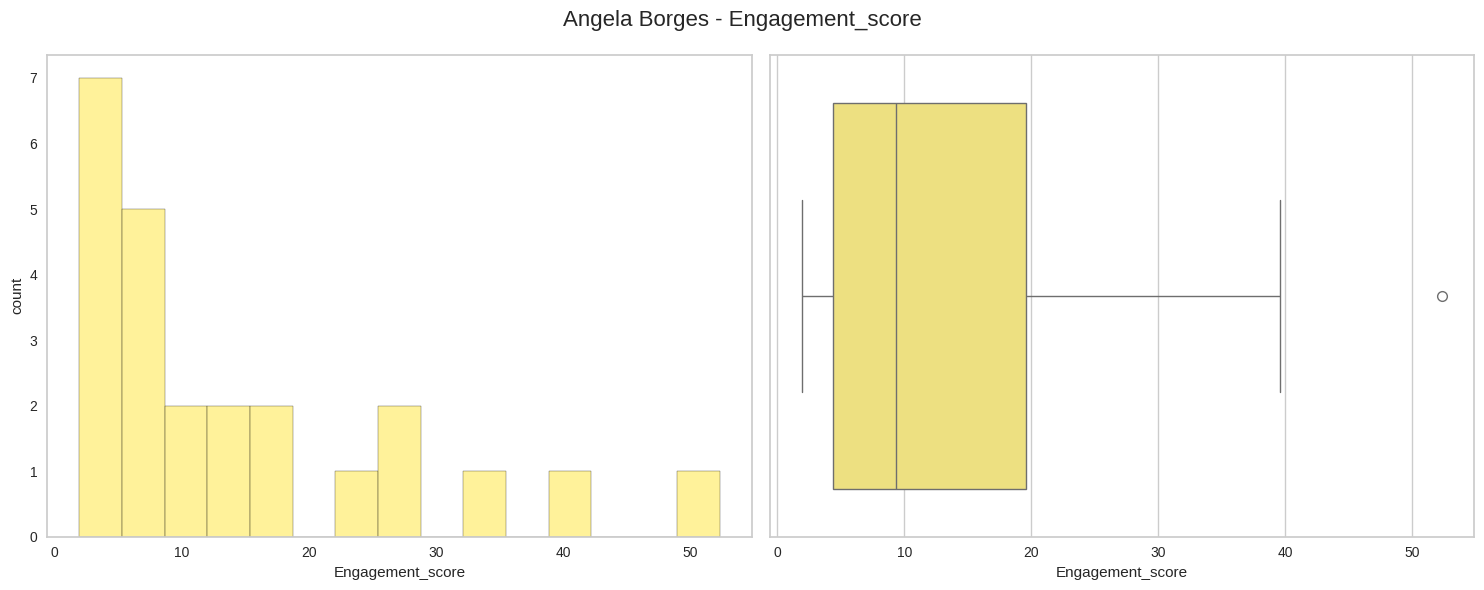

Column: Days_Available
Skew : 0.85


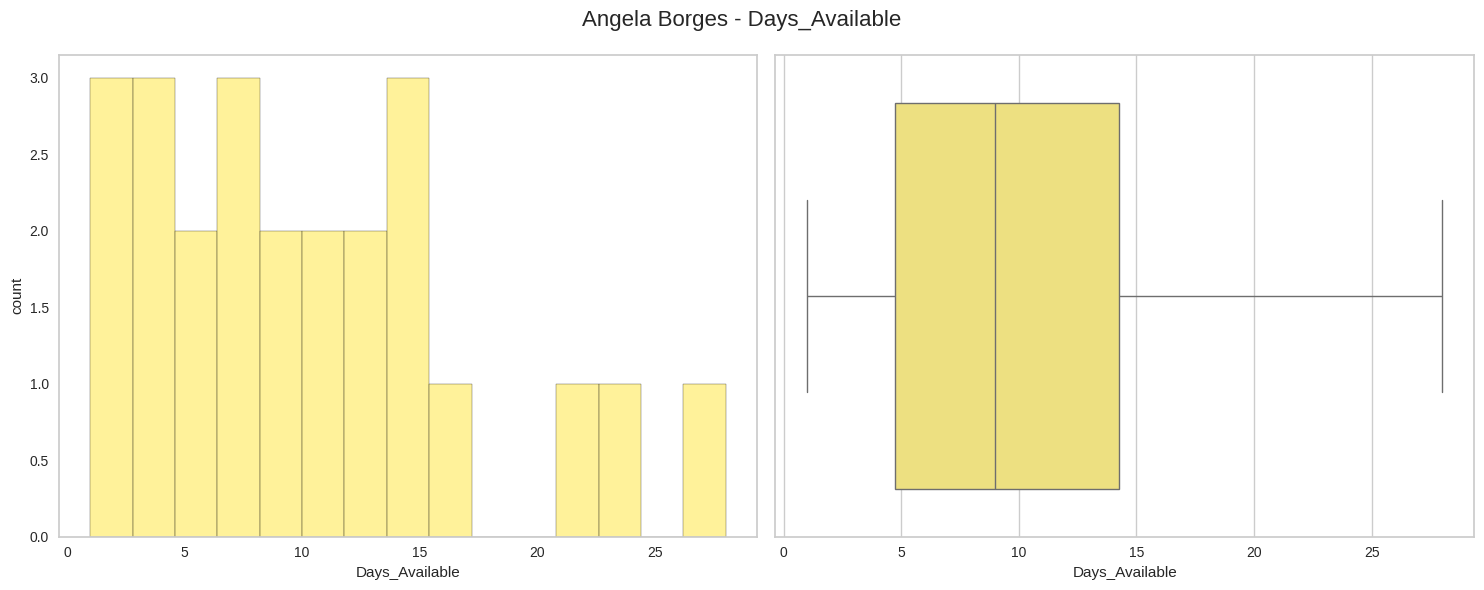

Column: Avg_Views_Per_Day
Skew : 1.03


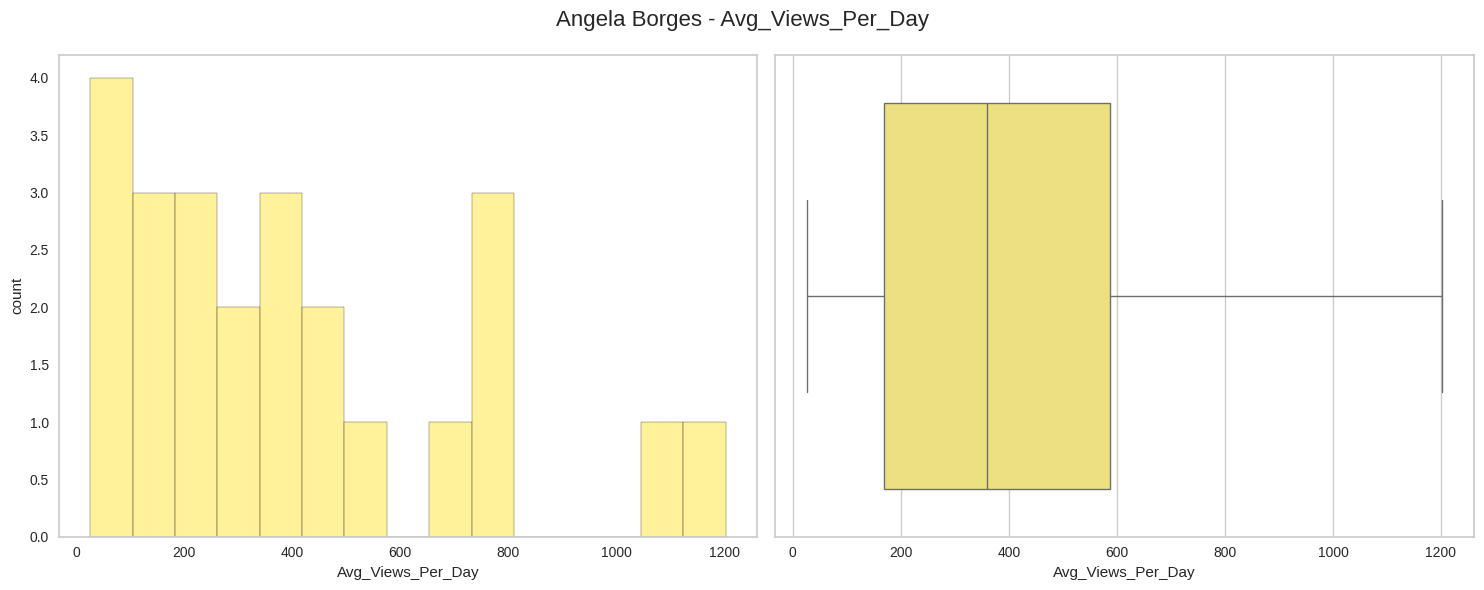

Column: Views_Ratio
Skew : 1.81


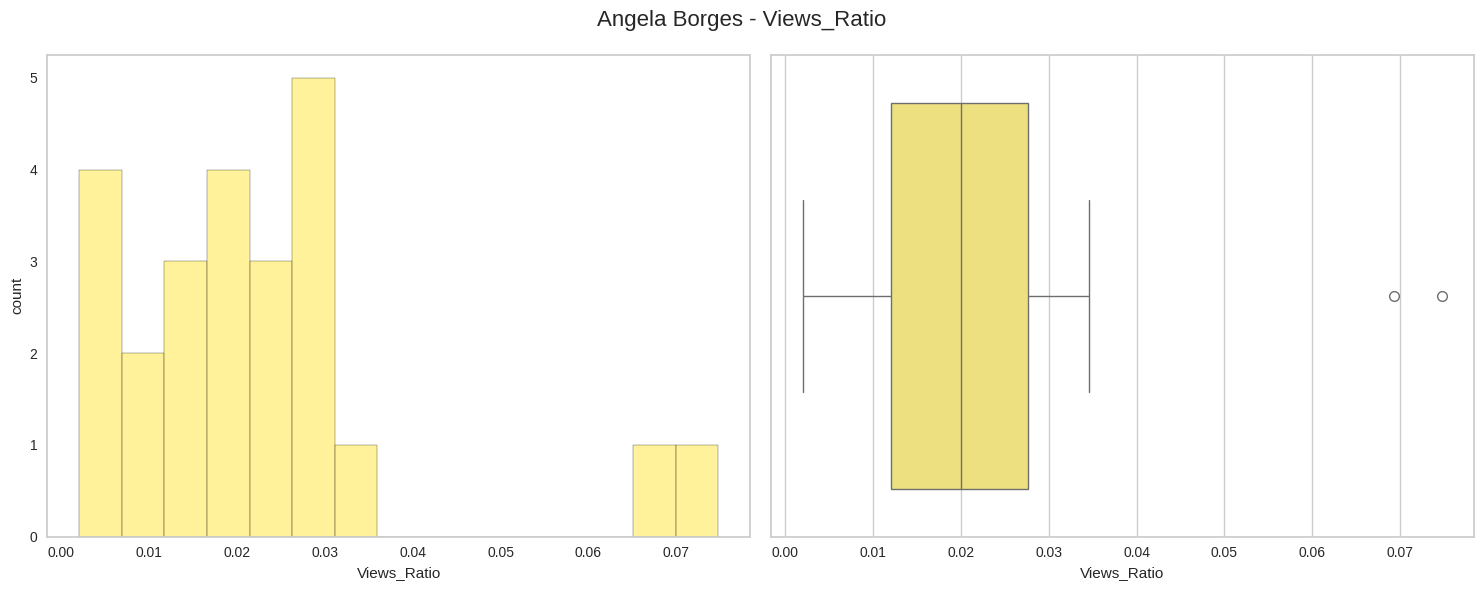

Column: Pct_Of_Channel_Growth
Skew : 1.81


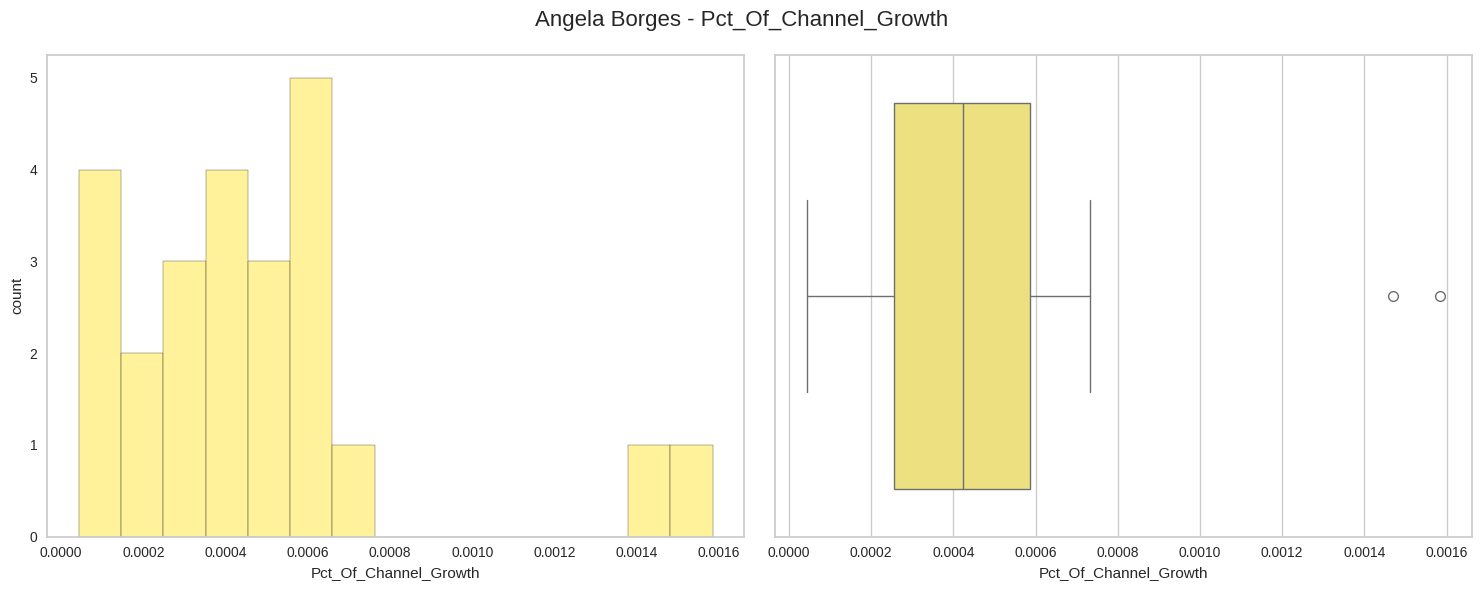

Column: individual_growth
Skew : 0.0


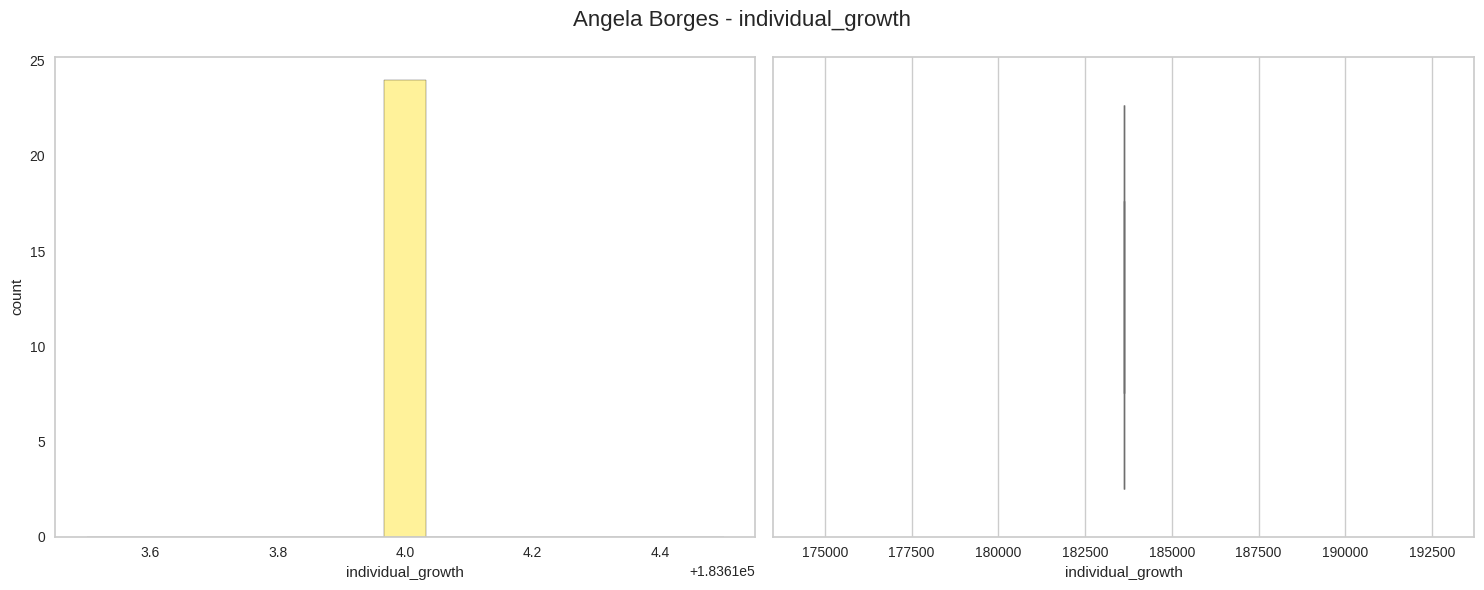

Column: Pct_Of_Individual_Growth
Skew : 1.81


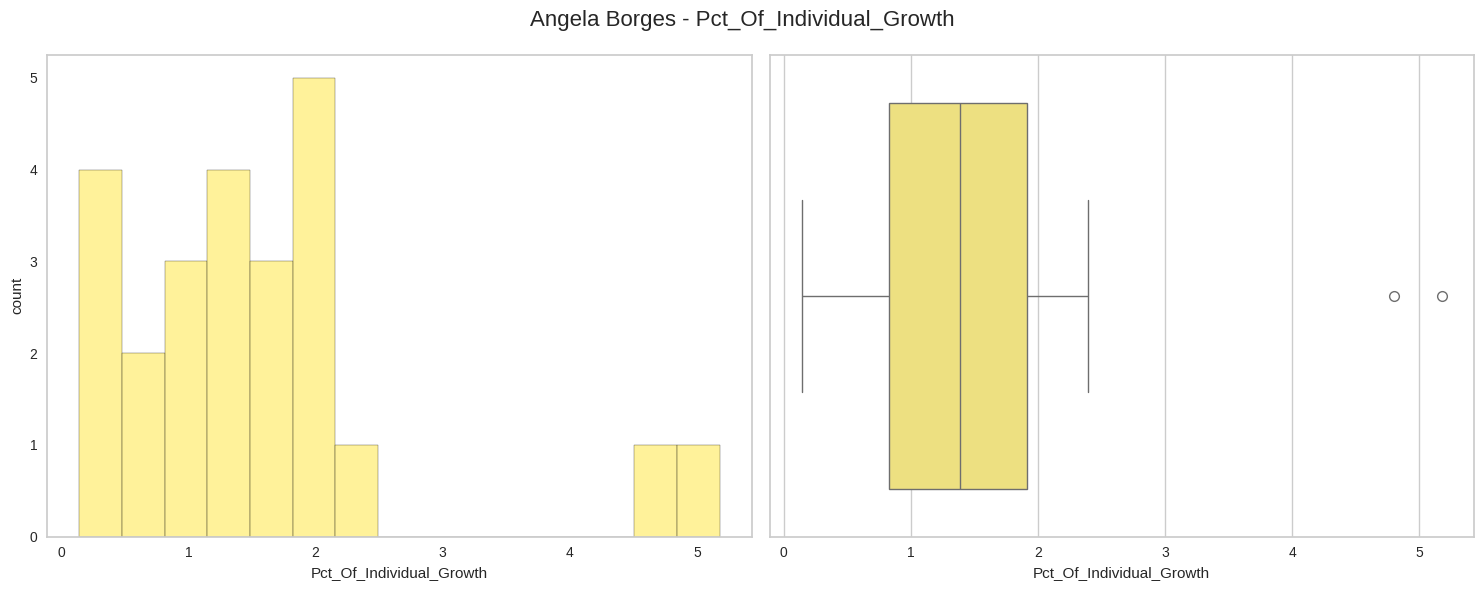

Column: Performance_Score
Skew : 1.02


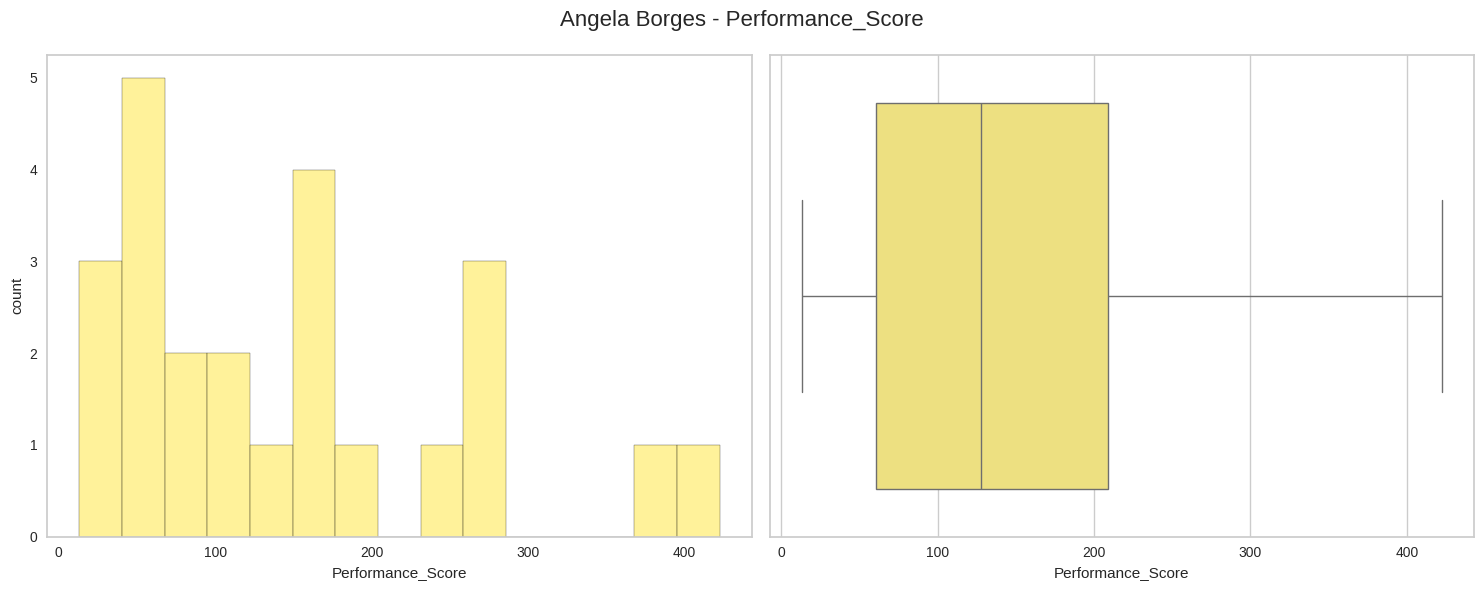

In [28]:
# Obtenção do nome de cada youtuber
# Obtention of youtuber's name
youtubers = data2['Youtuber'].unique()

# Criação de paleta de cor distinta para cada youtuber
# Creation of a color palette for each Youtuber
colors = plt.cm.Set3(np.linspace(0, 1, len(youtubers)))

# For loop plotar cada gráfico por youtuber separadamente
# For loop to plot each graphic separetely per youtuber
for youtuber, color in zip(youtubers, colors):
    print(f"\n{'='*50}")
    print(f"YOUTUBER: {youtuber}")
    print(f"{'='*50}")

    # Filtra as variáveis em data_num por youtuber
    # Filter features in data_num by youtuber
    youtuber_mask = data2['Youtuber'] == youtuber
    youtuber_data = data_num[youtuber_mask]

    for col in youtuber_data.columns:
        print(f'Column: {col}')
        print('Skew :', round(youtuber_data[col].skew(), 2))

        plt.figure(figsize=(15, 6))
        plt.suptitle(f'{youtuber} - {col}', fontsize=16)

        # Histograma | Histogram
        plt.subplot(1, 2, 1)
        youtuber_data[col].hist(bins=15, grid=False, color=color, alpha=0.7, edgecolor='black')
        plt.ylabel('count')
        plt.xlabel(col)

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=youtuber_data[col], color=color)
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

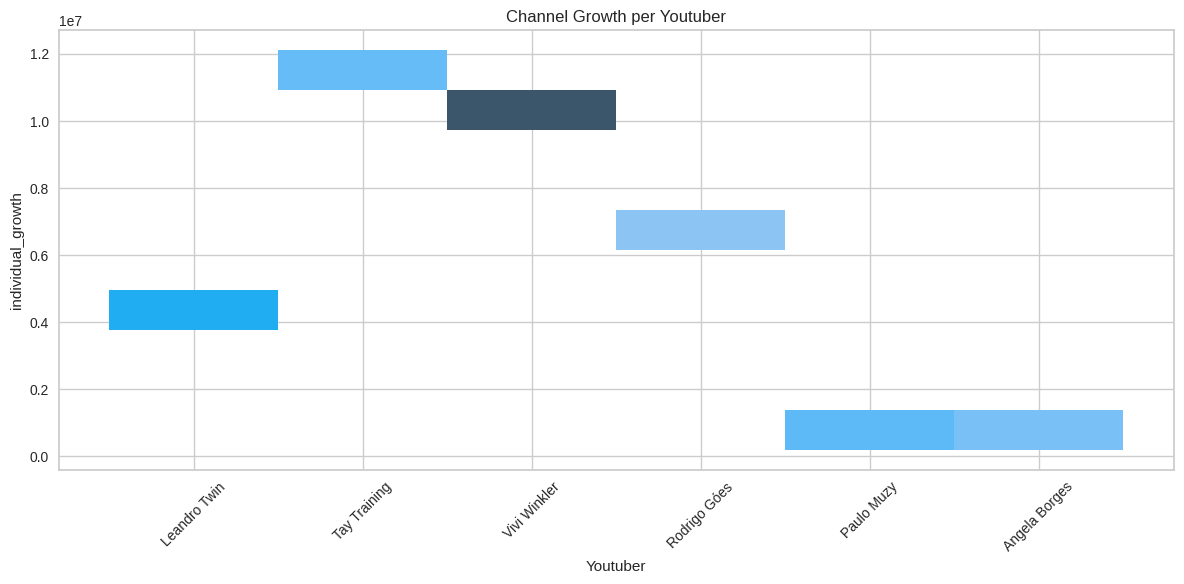

In [34]:
# Histograma do crescimento individual para cada youtuber
# Histogram of individual growth for each youtuber
plt.figure(figsize=(12, 6))
sns.histplot(data=data2, x='Youtuber', y='individual_growth')
plt.title('Channel Growth per Youtuber')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📝 **Observações:** No geral as nossa variáveis apresentam alto grau de assimetria e outliers. Podemos destacar que:

*   Rodrigo Góes teve um video que se destacou dos demais, alcançando um alor de mais de 40000 de performance score

* Em relação à métrica de engajamento, parece que a maioria dos valores estao concentrados em torno de 100, exceto para Rodrigo Góes cujo score mediano foi por volta de 400

*   No geral, Paulo Muzy e Angela Borges tiveram as menores pontuação de engajamento

*   Tay training foi a youtuber que mais cresceu no youtube durante o período, seguido de Vivi Winkler, Rodrigo Góes, Leandro Twin e por fim com pontuações similares Paulo Muzy e Angela Borges que quase não cresceram


📝 **Observations:** In general, our variables show a high degree of skewness and outliers. We can highlight that:

*   Rodrigo Góes had one video that stood out from the rest, reaching a performance score of more than 40000

* When it comes to engagement score, it seems most values concentrated around 100, except for Rodrigo Góes which the median score was near 400

*   In general Paulo Muzy and Angela Borges had the lowest engagement score

*   Tay training was the youtuber that grew the most on youtube during the period, followed by Vivi Winkler, Rodrigo Góes, Leandro Twin and at last with similar scores Paulo Muzy and Angela Borges which barely had any growth




### 🔍 Análise de dados bivariada | Bivariate data analysis

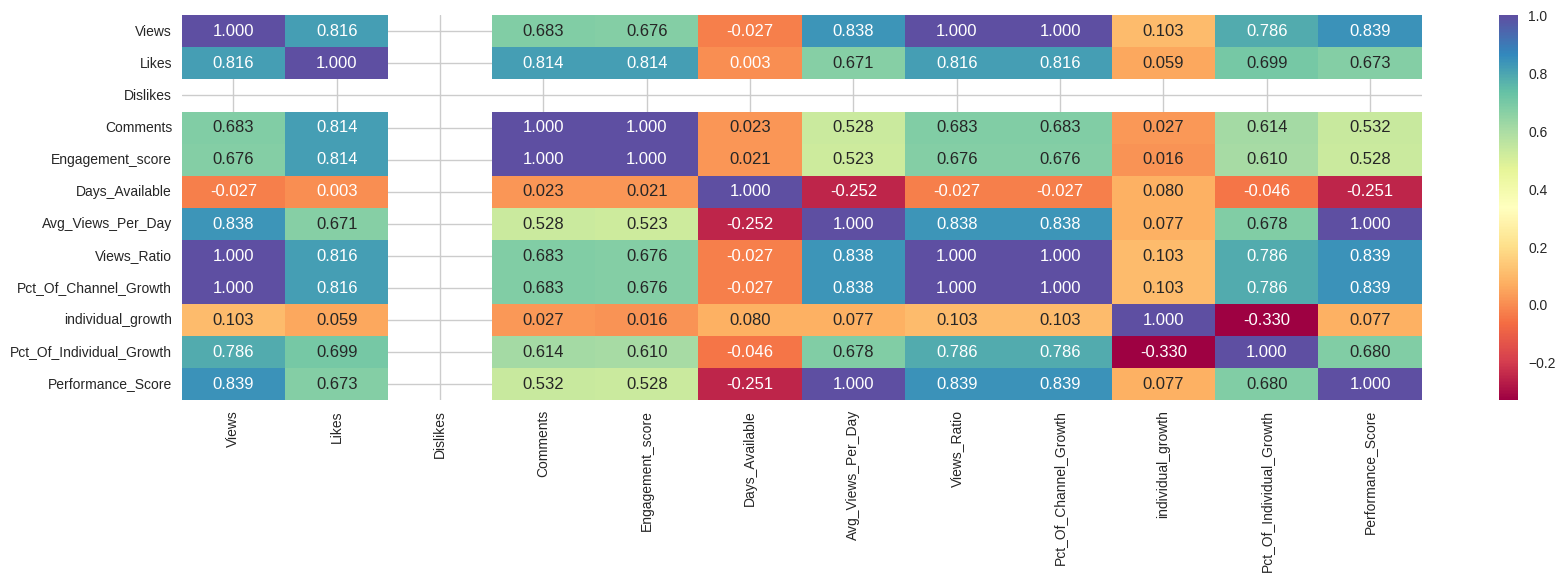

In [35]:
# Mapas de calor com correlação entre as variáveis
# Heatmap with correlation between features
plt.figure(figsize=(20,5))
sns.heatmap(data2.select_dtypes(include=np.number).corr(),  #.corr to create a correlation between variables, sns.heatmap for a heatmap based on the correlations
            cmap='Spectral', annot=True, fmt='0.3f')  # annot=True to display correlation values on heatmap, fmt='0.1f for float type with one decimal place
plt.show()

📝 **Observações:**  Aqui, vale destacar algumas relações:

*   A maior parte das relações entre as variáveis são positivas

*   No geral, dias disponíveis tem relação negativa com média de visualizações diárias, com valor de -0.25

*   A relação mais negativa foi entre Pct_of_individual growth e individual growth, o que significa que o alcançe de visualizações totais (independente do vídeo) se da devido a videos cujos quais cada um teve uma contribuição pequena para o crescimento do canal ao invés de um ou outro vídeo ter tido visualizações demais e o resto visualizações de menos

*  Apesar de não apresentarem relação negativa, há uma associação muito fraca entre dias disponíveis e comentários (0.023), com tendência ao negativao. Ou seja, no geral, videos com mais dias disponíveis recebem mais comentários


📝 **Observations:** Here, it is worth highlighting some relationships:

* Most of the relationships between features are positive   

*   In general, days available has a negativa relationship with average views per day, with a value of -0.25


*   The most negative relationship was between Pct_of_individual growth and individual growth, which means that reaching out total views (regardless of the video) is associated with videos which each one had a small contribution for the channel's growth, instead of one or another video having too many views and others too few


*  Although not having a negative relationship, there is a weak association between days available and comments (0.023), with a negative tendency. This means that, in general, videos available for more days receive more comments


<Axes: xlabel='Youtuber', ylabel='Performance_Score'>

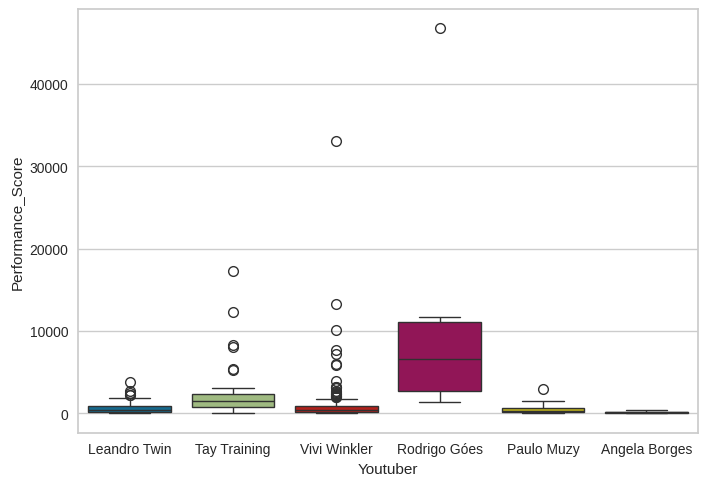

In [36]:
# Boxplot do Performance Score para cada youtuber
# Performance Score boxplot for each youtuber
sns.boxplot (data= data2, x= 'Youtuber',y='Performance_Score', hue='Youtuber')

<Axes: xlabel='Youtuber', ylabel='Days_Available'>

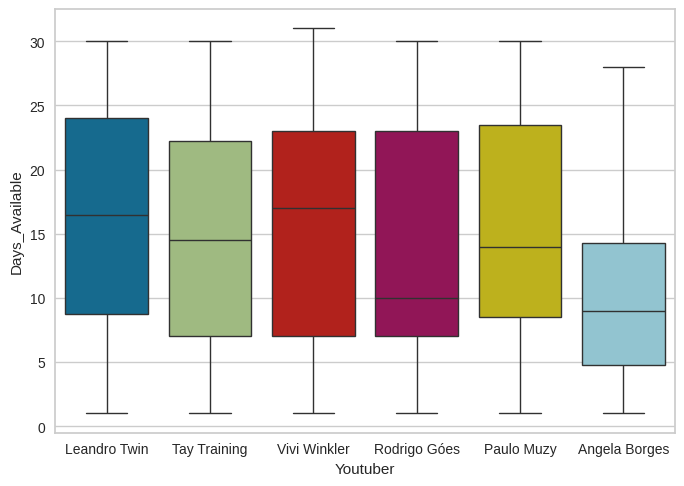

In [37]:
# Boxplot dos dias disponíveis por vídeo para cada youtuber
# Video's days available boxplot for each youtuber
sns.boxplot (data= data2, x= 'Youtuber',y='Days_Available', hue='Youtuber')

**Observações:** Aqui percebemos que mesmo os valores mais baixos de Performance Score de Rodrigo Góes são mais altos do que os valores medianos de todos os outros youtubers. Além disso, percebe-se que isso não se deu devido a seus videos terem tido mais dias disponíveis, pois tem a segunda taxa mais baixa.

Leandro Twin, Paulo Muzy e Angela Borges não tiveram videos que se destacaram muito em relação aos outros. Enquanto que Tay Training, Vivi Winkler tiveram vários videos que se destacaram dos demais, podemos dizer que eles 'viralizaram'. Já Rodrigo Góes teve apenas um video que se destacou dos demais de sua mesma autoria, contudo, esse foi o video que teve a maior pontuação.

**Observations:** Here we notice that even the lowest Performance Score values of Rodrigo Góes are higher than most median values of all other youtubers. Moreover, it is noticed that this was not due to his videos having had more days avaiable, since he has the second lowest rate.

Leandro Twin, Paulo Muzy and Angela Borges did not have any videos that stood out in relation to others. Meanwhile, Tay Training and Vivi Winkler had several videos that stood out, we could say that they 'went viral'. Rodrigo Góes, on the other hand, had only one video that stood out, however, it was the video that had the highest score.

**Videos antigos vs novos:** Agora vamos checar o quanto do crescimento de todos os canais de youtube analisados se da devido à videos recentes e videos antigos

**Old vs new videos:** Now we will check how much of the growth of all youtube channels analyzed is due to recent and old videos

In [38]:
# Porcentagem de crescimento dos canais devido à vídeos recentes vs vídeos antigos
# Growth percentage of channels due to recent vs old videos
total_period_views = data['Total_Views'].iloc[-1] - data['Total_Views'].iloc[0]
recent_videos_total = data2['Views'].sum()
legacy_views = total_period_views - recent_videos_total

print(f"Channel total growth: {total_period_views:,} views")
print(f"From new videos (data2): {recent_videos_total:,} views ({recent_videos_total/total_period_views*100:.1f}%)")
print(f"From legacy content: {legacy_views:,} views ({legacy_views/total_period_views*100:.1f}%)")

Channel total growth: 599,716,582 views
From new videos (data2): 12,714,952 views (2.1%)
From legacy content: 587,001,630 views (97.9%)


**Observações:** Como podemos ver, apenas 2% do crescimento dos canais se deu devido a videos recentes (abrangendo o período analisado). Isso se da pois são canais já bem estabelecidos com muitos anos de história e conteúdo.


**Observations:** As we can see only 2% of all channel's growth was due to recent videos (covering the period analysed). This is so because they are well-established channels with many years of history and content.

**Vídeos longos vs curtos:** Agora vamos ver o desempenho de vídeos longos comparado a vídeos curtos.


**Long vs short videos:** Now we will see the performance of long videos compared to short videos.

In [39]:
# Criação da coluna 'Is_Short' com informação de verdadeiro ou falso em relação ao título conter #shorts
# 'Is_Short' column creation with true or false information in relation to title having #shorts
data2['Is_Short'] = data2['Title'].str.contains('#shorts', case=False, na=False)

# Comparação das metricas entre videos shorts e longos
# Metrics comparison between Shorts and long videos
shorts_vs_regular = data2.groupby('Is_Short').agg({
    'Views': 'mean',
    'Avg_Views_Per_Day': 'mean',
    'Engagement_score': 'mean',
    'Pct_Of_Individual_Growth': 'mean',
    'Views_Ratio': 'mean',
    'Likes': 'mean',
    'Comments': 'mean',
    'Performance_Score': 'mean'
}).round(2)

print("Shorts vs Regular Videos Comparison:")
print(shorts_vs_regular)

Shorts vs Regular Videos Comparison:
             Views  Avg_Views_Per_Day  Engagement_score  \
Is_Short                                                  
False     34921.91            3792.87             63.03   
True      25404.69            2649.90             60.91   

          Pct_Of_Individual_Growth  Views_Ratio    Likes  Comments  \
Is_Short                                                             
False                         0.60         0.27  1865.57     56.82   
True                          0.56         0.20  1917.24     52.93   

          Performance_Score  
Is_Short                     
False               1340.31  
True                 939.82  


📝 **Observações:**  Aqui podemos ver que:

*   A única métrica na qual videos curtos foi superior a videos longos foi em 'Likes'

*   Aqui temos uma percepção de que receber likes não necessariamente indica mais visualizações, crescimento de canal e engajamento


📝 **Observations:** Here we can see that:

*   The only metric in which short videos was superior to long videos was 'Likes'

*   Here we have a perception that receiving likes does not necessarily indicate more view, channel's growth and engagement


**Selecionando os top 3 videos de cada youtuber:** Agora iremos selecionar os três melhores videos de cada youtuber baseado na métrica Performance Score. Iremos excluir o video de id '2XZ_vFvzBdg', pois ele foi removido pelo youtuber.


**Selecting the top 3 videos of each youtuber:** Now we will select the best three videos of each youtuber according to the Performance Score metric. We will delete the video that has the id '2XZ_vFvzBdg' because it was removed by the youtuber.

In [42]:
# Obtendo os top 3 videos de cada youtuber de acordo com Performance_Score
# Retrieving the top 3 videos per youtuber according to Performance_Score
top_3_per_youtuber = data2.sort_values(['Youtuber', 'Performance_Score'], ascending=[True, False]) \
                         .groupby('Youtuber').head(3)

In [43]:
# Ordenando os videos por ordem decrescente de Performance_Score
# Sorting videos by Performance_Score decreasing order
top_3_per_youtuber = top_3_per_youtuber.sort_values('Performance_Score', ascending=False)

In [44]:
# Remoção do vídeo contendo id '2XZ_vFvzBdg'
# Removal of video that has id '2XZ_vFvzBdg'
top_3_per_youtuber = top_3_per_youtuber[top_3_per_youtuber['Id'] != '2XZ_vFvzBdg']

⚠️**Importando transcrições dos videos:** Agora vamos importar arquivos txt contendo a transcrição dos videos selecionados e associar cada um ao seu dado correspondente na tabela de videos selecionados.

⚠️**Uploading video's transcriptions:** Now we will import txt files containing the selected videos transcriptions and associate each one with their correspondent data in the selected video's table.

In [45]:
# Upload dos dados de transcrição dos videos
# Video's transcriptions upload
folder_path = '/content/drive/MyDrive/python_notebooks/youtube_transcriptions/'

# Ordenando os arquivos de acordo com número após simbolo de underline
# Ordering archives according to number after the underline symbol
transcription_files = sorted([f for f in os.listdir(folder_path) if f.startswith('t_') and f.endswith('.txt')],
                            key=lambda x: int(x.split('_')[1].split('.')[0]))

# Criando listas para armazenas nome e conteúdo dos arquivos
# Creating lists to store both file names and content
file_names = []
transcriptions = []

for file in transcription_files:
    with open(os.path.join(folder_path, file), 'r', encoding='utf-8') as f:
        file_names.append(file)
        transcriptions.append(f.read())

# Adicionando a dataframe dos vídeos selecionados
# Adding to selected video's dataframe
top_3_per_youtuber['transcription_file'] = file_names
top_3_per_youtuber['transcription'] = transcriptions

**Criando coluna de número de palavras:**

**Creating a word count column:**

In [46]:
# Contando número de palavras na transcrição de cada vídeo
# Counting number of words in the transcription of each video
top_3_per_youtuber['word_count'] = top_3_per_youtuber['transcription'].apply(
    lambda x: len(str(x).split())
)

**Display dos melhores videos em ordem:**

**Display of the rank of best videos:**

In [47]:
top_3_per_youtuber

,Id,Title,Views,Likes,Dislikes,Comments,Youtuber,Date,Hour,Engagement_score,...,Avg_Views_Per_Day,Views_Ratio,Pct_Of_Channel_Growth,individual_growth,Pct_Of_Individual_Growth,Performance_Score,Is_Short,transcription_file,transcription,word_count
310,Li0Gr32FpE8,Tiktokers do suco 🥤,665656,29967,0,695,Rodrigo Góes,2025-11-16,13:33:00,699.501875,...,133131.200000,5.235222,0.110995,6414090,10.378027,46739.202416,False,t_1.txt,"Um ml de texto não dá nada, o cara ama, o suco...",105
253,mvM3aC0TSA4,MINHA VIRILHA TÁ PISCANDO MUITO 😱,659790,7851,0,211,Vivi Winkler,2025-11-14,16:00:00,212.189924,...,94255.714286,5.189088,0.110017,10648357,6.196167,33034.265985,False,t_2.txt,"Bota a mão aqui. Bota a mão aqui. Não, aqui. B...",25
88,xCNgFoFtBys,❤️Já salva pra aprender a fazer o sumô correta...,197494,16323,0,137,Tay Training,2025-11-17,19:09:00,145.265061,...,49373.500000,1.553242,0.032931,12108385,1.631052,17310.422894,False,t_3.txt,Pare agora de fazer o sumô dessa forma aqui. S...,492
223,YxT_qkuC6-4,QUAL CARRO A SILVIA SERIA? 🤣,488735,9513,0,432,Vivi Winkler,2025-11-08,15:00:00,433.946454,...,37595.000000,3.843782,0.081494,10648357,4.589769,13246.764273,False,t_4.txt,"Se eu fosse um carro, ela seria um Fusca, um P...",45
90,lYzwz_CpuuU,🙆🏻‍♀️ A diferença de… ALONGAMENTO X MOBILIDADE,70459,6902,0,92,Tay Training,2025-11-19,19:13:00,101.795768,...,35229.500000,0.554143,0.011749,12108385,0.581903,12350.917649,False,t_5.txt,Isso é alongamento.\n\nIsso.\n\nÉ mobilidade.\...,78
305,PWLiVeKNfQU,Dieta!,333374,28156,0,477,Rodrigo Góes,2025-11-11,17:35:00,485.445770,...,33337.400000,2.621905,0.055589,6414090,5.197526,11766.876044,False,t_6.txt,Coisas que eu nunca daria pras minhas filhas c...,67
297,bm8jX5Tv3tg,JÁ FOI ou AINDA VAI? 🤔,28985,1007,0,31,Vivi Winkler,2025-11-20,16:00:00,34.474211,...,28985.000000,0.227960,0.004833,10648357,0.272202,10151.748824,False,t_7.txt,\n\n,0
87,8VsUcufaH4M,Qual cardio vocês costumam fazer?,118119,3653,0,134,Tay Training,2025-11-16,18:29:00,137.092644,...,23623.800000,0.928977,0.019696,12108385,0.975514,8296.133300,False,t_8.txt,E aí.\n\n,2
57,egbNUR9gdEo,O treino de braço mais rápido #shorts,21974,1908,0,34,Leandro Twin,2025-11-19,12:01:00,42.682989,...,10987.000000,0.172820,0.003664,4573925,0.480419,3854.136967,True,t_9.txt,"O treino de braço mais rápido do mundo, bíceps...",229
347,uT5gEkQyZYI,QUASE M☠RR1 FAZENDO ISSO!,8486,384,0,0,Paulo Muzy,2025-11-20,12:02:00,4.525100,...,8486.000000,0.066740,0.001415,1250106,0.678822,2971.186999,False,t_10.txt,"Eu tenho judô, aí eu fiz atletismo, eu fiz lan...",130


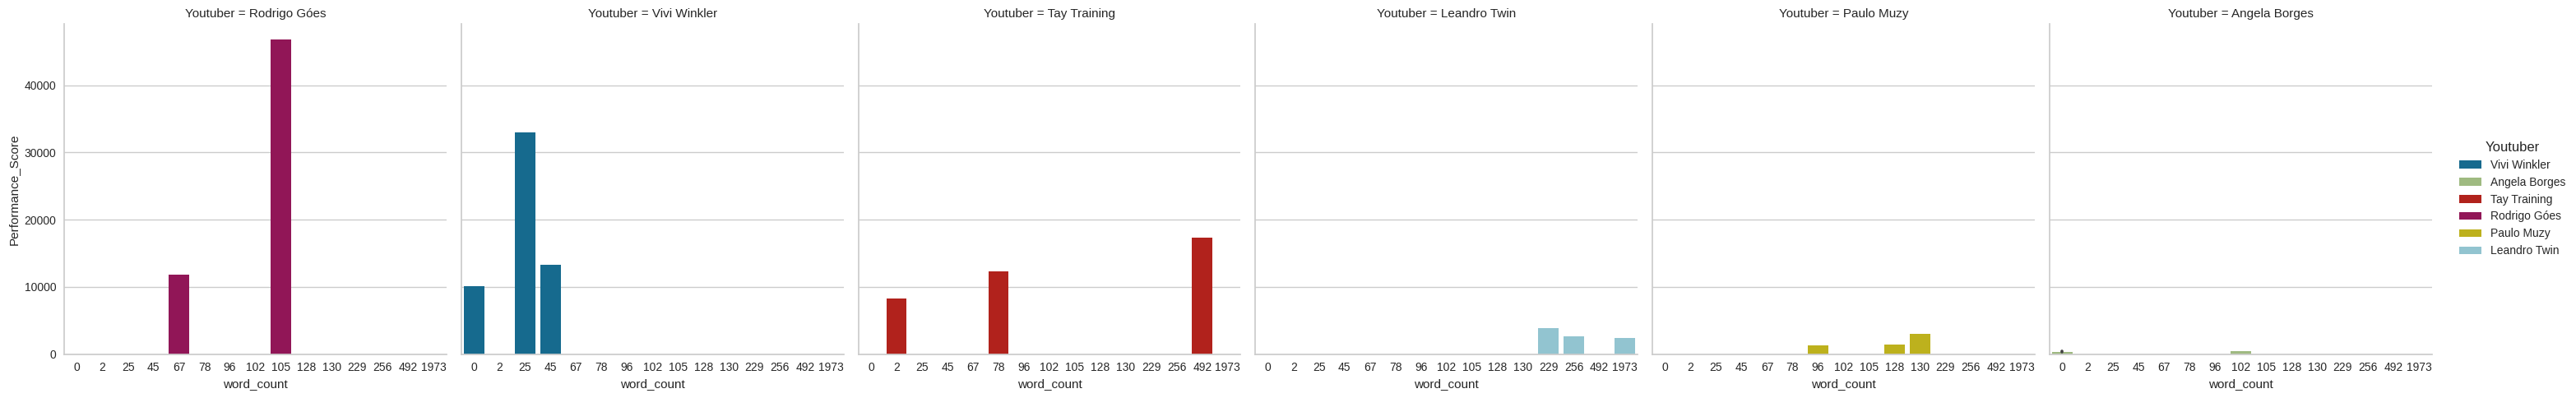

In [48]:
# Gráfico de barras do Performance Score de acordo com o número de palavras por youtuber
# Performance Score barplot related to number of words by youtuber
sns.catplot (data= top_3_per_youtuber, x= 'word_count',y='Performance_Score', hue='Youtuber', col='Youtuber', kind='bar')

**Observações:** No geral os videos selecionados possuem fala contendo mais de 50 palavras. Aqueles que tiveram poucas palavras apresentaram Performance Score mais baixo. Contudo, a única exceção foi para Vivi Winkler. Para ela, o video com maior score teve apenas 25 palavras, e mesmo o video sem nenhuma fala teve score muito acima dos melhores vídeos dos youtubers Paulo Muzy, Leandro Twin e Angela Borges.

**Observations:** In general, the selected videos had more than 50 words spoken. Those that had less words presented lower Performance Score. However, the only exception was Vivi Winkler. For her, the video with highest score only had 25 words, and even the video that had no spoken words had a score way higher than the best videos from the youtubers Paulo Muzy, Leandro Twin and Angela Borges.

**Checando como o horário de publicação afeta o Performance Score:**

**Checking how hour of publication affects Performance Score:**

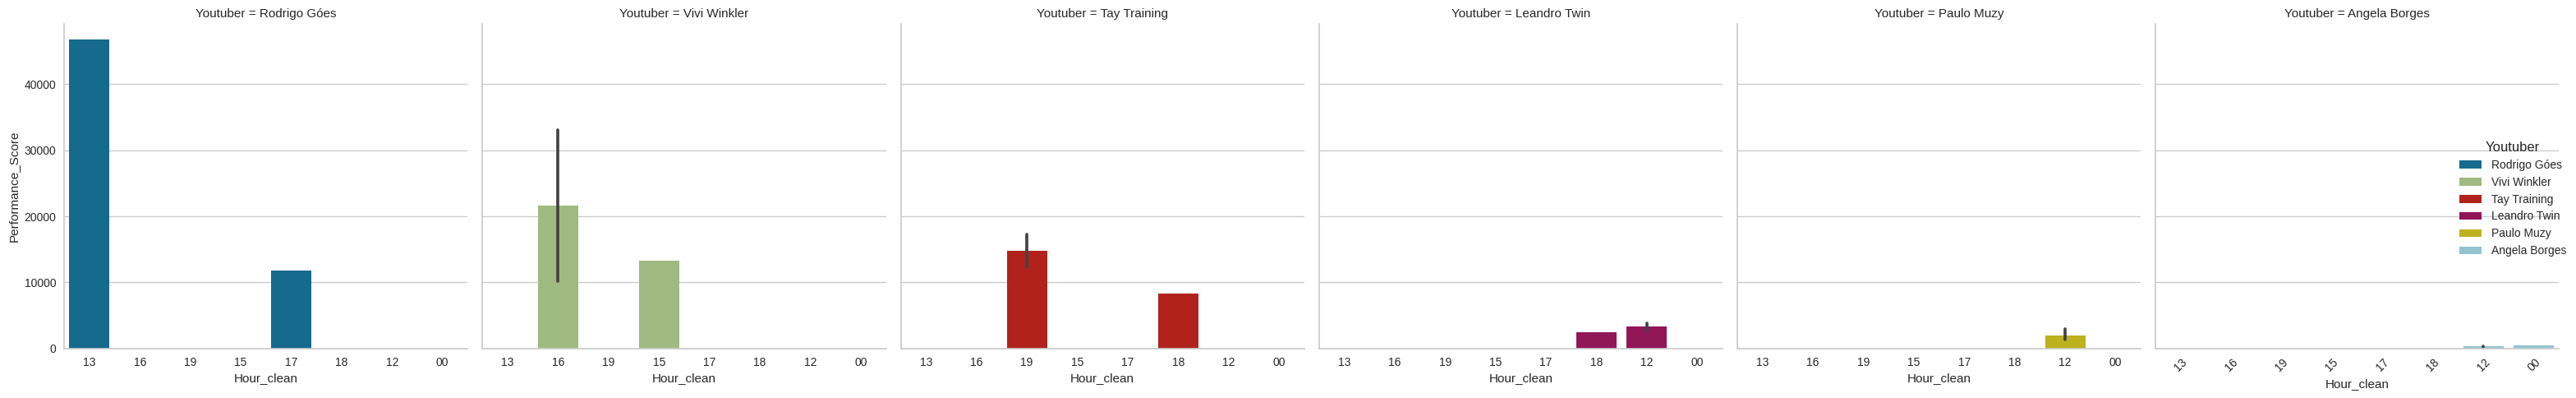

In [49]:
# Convertendo hora para string
# Converting hour to string
top_3_per_youtuber['Hour'] = top_3_per_youtuber['Hour'].astype(str)

# Extraindo apenas o primeiro componente de hora (sem minutos ou segundos)
# Extracting only the first component of hour (no minutes or seconds)
top_3_per_youtuber['Hour_clean'] = top_3_per_youtuber['Hour'].str.split(':').str[0]

# Gráfico de barra de Performance Score por hora para cada youtuber
# Barplot of Performance Score by hour for each youtuber
sns.catplot(data=top_3_per_youtuber, x='Hour_clean', y='Performance_Score',
            hue='Youtuber', col='Youtuber', kind='bar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

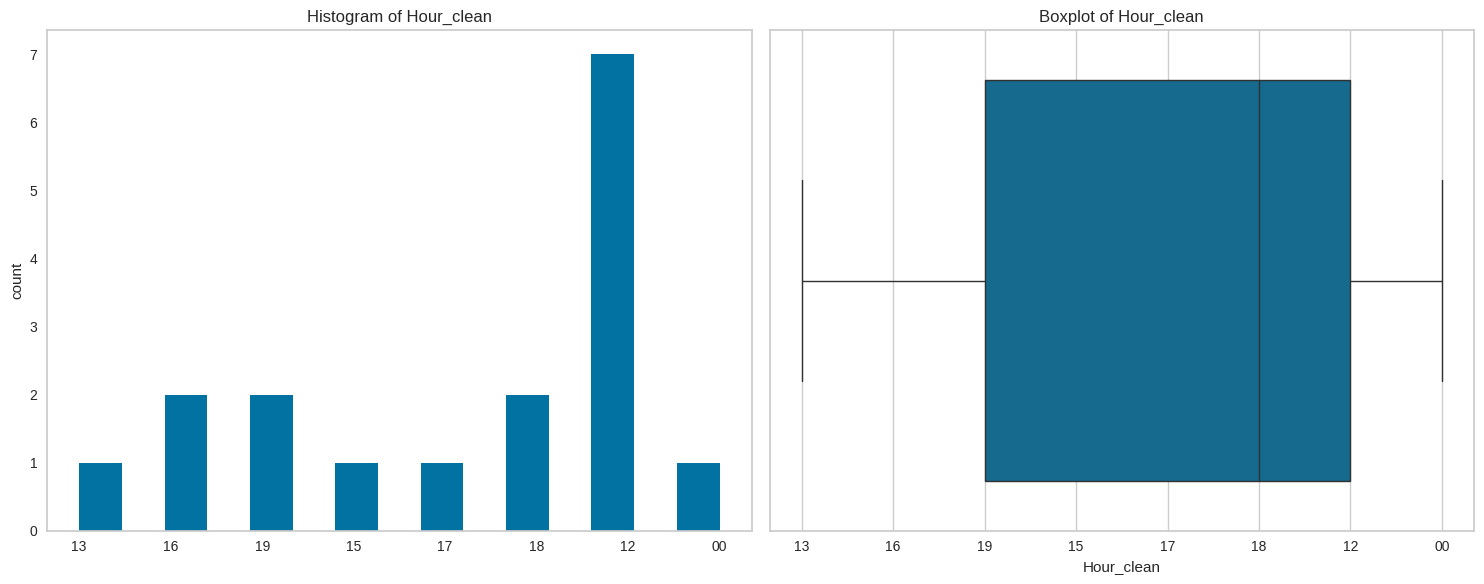

In [50]:
# Histograma e boxplot geral do horário de postagem dos vídeos
# Main histogram and boxplot of video's posting time
plt.figure(figsize=(15, 6))

# Histograma | Histogram
plt.subplot(1, 2, 1)
top_3_per_youtuber['Hour_clean'].hist(bins=15, grid=False)
plt.ylabel('count')
plt.title('Histogram of Hour_clean')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=top_3_per_youtuber['Hour_clean'])
plt.title('Boxplot of Hour_clean')

plt.tight_layout()
plt.show()

**Observações:**

*   O horário que mais teve videos publicados foi o horário de meio dia

*   Grande parte dos videos foram publicados ou a 12:00 ou entre 16:00 e 19:00

*   Vídeos publicados no horário de almoço e próximo das 17:00 apresentaram maior Performance Score

*   Para Leandro Twin, Paulo Muzy e Angela Borges, mesmo publicando no horário de almoço, ainda sim tiveram valores muito baixo de Performance Score quando comparados à Rodrigo Góes, Vivi Winkler e Tay Training


**Observations:**

*   The time that has most videos published was lunch break  

*   Most of the videos were published either at 12:00 or between 16:00 and 19:00

*   Videos published at lunch break or around 17:00 had the best Performance Score

*   For Leandro Twin, Paulo Muzy and Angela Borges, even though publishing at lunch break, they still had low values of Performance Score when compared to Rodrigo Góes, Vivi Winkler and Tay Training


### ✅ Considerações e recomendações finais

### ✅ Final considerations and recommendations


**Considerações Finais:**

*   Não é razoável esperar que apenas poucos videos sejam capazes de trazer crescimento expressivo ao canal

*   Postar mais videos também não garante crescimento, caso contrário Vivi Winkler teria crescido muito mais do que os demais. No entanto Tay Training com apenas 32 videos comparado com 208 de Vivi Winkler teve mais crescimento no canal em termos de visualizações

*  Ter videos disponiveis por mais dias não necessariamente garante mais visualizações do que videos mais recentes

*   Videos mais longos performam melhor do que shorts

*   O horário de almoço e próximo ao horário convencional de fim de expediente de trabalho parecem ser bons horários para publicar vídeos no youtube

*   Mesmo com pouquíssimas palavras ou nenhuma palavra falada em vídeo, Vivi Winkler conseguiu obter valores de Performance Score acima dos concorretes. Isso demonstra que fazendo pouco ela alcança muito, possivelmente devido à forma e conteúdo específico do vídeo


**Recomendações**

*  Publique em horários onde sabe-se que a maioria das pessoas estão em tempo livre ou de descanso: como por volta de 12:00 e próximo ou após às 17:00 até 19:00

*   Não focar na quantidade de vídeos mas sim na qualidade do conteúdo de cada vídeo

*   Não veja quantidade de likes como sinônimo de crescimento do canal

*   Publicar mais vídeos longos do que shorts

*   Caso queira postar shorts, busque se inspirar na forma e conteúdo de Vivi Winkler

*   Busque publicar videos com os mesmos tópicos dos top 3 vídeos selecionados de cada youtuber. Dando preferência para Rodrigo Góes, Tay Training e Vivi Winkler


**Final Considerations:**

*   It is not reasonable to expect that just a few videos will be able to generate significant channel growth

*   Posting more videos also does not guarantee growth; otherwise, Vivi Winkler would have grown much more than the others. However, Tay Training, with only 32 videos compared to Vivi Winkler’s 208, achieved more channel growth in terms of views

*  Having videos available for more days does not necessarily guarantee more views than more recent videos

*   Longer videos perform better than Shorts

*   Lunchtime and times close to the typical end of the workday seem to be good times to publish videos on YouTube

*   Even with very few or no spoken words in her videos, Vivi Winkler managed to achieve Performance Score values above her competitors. This shows that by doing relatively little, she achieves a lot. This is possibly due to the style and specific content of her videos

**Recommendations**

*  Publish at times when most people are off work or on break, such as around 12:00 and between 17:00 and 19:00

*   Focus not on the quantity of videos but on the quality of each video’s content

*   Do not view the number of likes as a synonym for channel growth

*   Publish more long-form videos than Shorts

*   If you want to post Shorts, try to draw inspiration from Vivi Winkler’s style and content

*   Aim to publish videos with the same topics as the top 3 selected videos from each YouTuber, giving preference to Rodrigo Góes, Tay Training, and Vivi Winkler
